In [7]:
import time
tiempo_inicio = time.time()

In [8]:
import pandas as pd
import os
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime, timedelta
import calendar

In [9]:
relative_path  = "../data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"

In [10]:
archivos_csv = [archivo for archivo in os.listdir(relative_path) if archivo.endswith('.csv')]
dataframes = []

In [11]:
# Leer cada archivo CSV y almacenarlo en la lista de dataframes
for archivo_csv in archivos_csv:
    ruta_archivo = os.path.join(relative_path, archivo_csv)
    dataframe = pd.read_csv(ruta_archivo)
    dataframes.append(dataframe)

In [12]:
df = pd.concat(dataframes)

In [13]:
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [14]:
def calculate_aqi(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()
    
    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'
    
df['AQI'] = df.apply(calculate_aqi, axis=1)

In [15]:
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station               AQI  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  Heavily Polluted  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  Heavily Polluted  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  Heavily Polluted  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  Heavily Polluted  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  Heavily Polluted

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  AQI      420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 64.2+ MB


In [17]:
df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

In [18]:
print(f'No Entradas: {df.shape[0]}, No Columnas: {df.shape[1]}')

No Entradas: 420768, No Columnas: 19


In [19]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
AQI            0
dtype: int64

In [20]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      2.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [21]:
df['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [22]:
df['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [23]:
df['AQI'].unique()

array(['Heavily Polluted', 'Severely Polluted', 'Good',
       'Moderately Polluted', 'Slightly Polluted', 'Excelent',
       'Lightly Polluted'], dtype=object)

In [24]:
columnas_a_excluir = ['wd', 'station','AQI']
df1 = df
df = df.drop(columnas_a_excluir, axis=1)


In [25]:
sesgo = df.mean() - df.median()
print("Segos Positivos y Negavitos\n",sesgo)

Segos Positivos y Negavitos
 No         0.000000
year      -0.337440
month     -0.477070
day       -0.270363
hour       0.000000
PM2.5     24.793428
PM10      22.602618
SO2        8.830835
NO2        7.638586
CO       330.766454
O3        12.372271
TEMP      -0.961024
PRES       0.346982
DEWP      -0.609178
RAIN       0.064476
WSPM       0.329711
dtype: float64


In [26]:
moda = df.mode().iloc[0]
media = df.mean()
mediana = df.median()

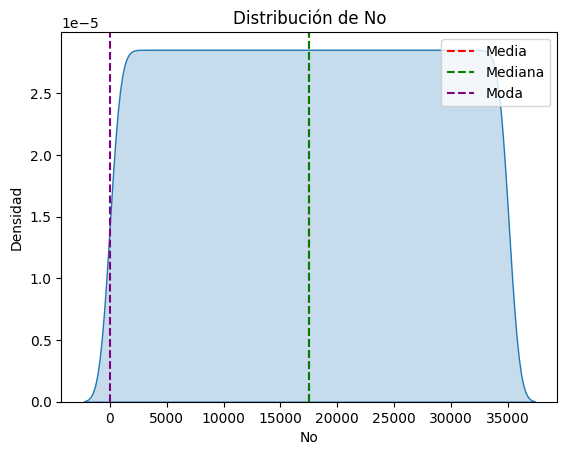

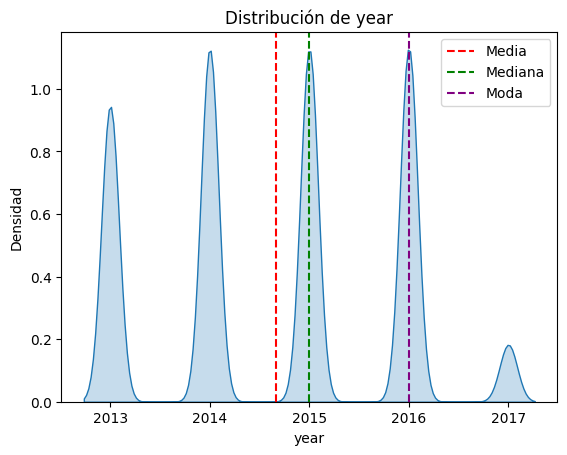

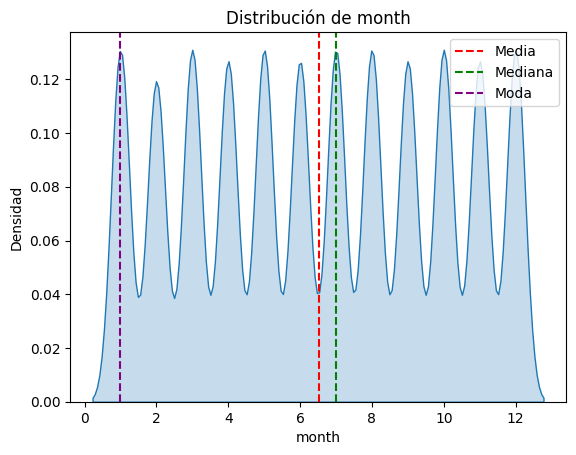

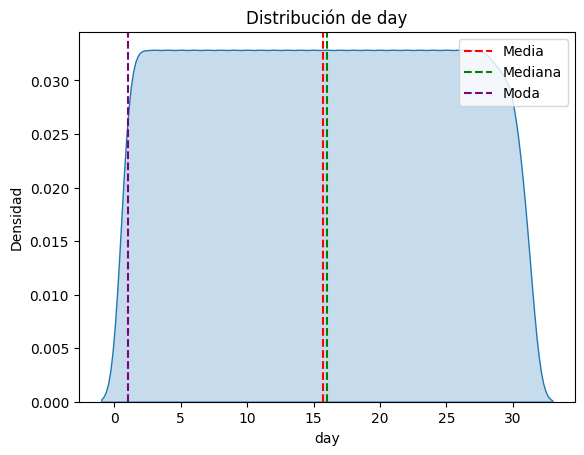

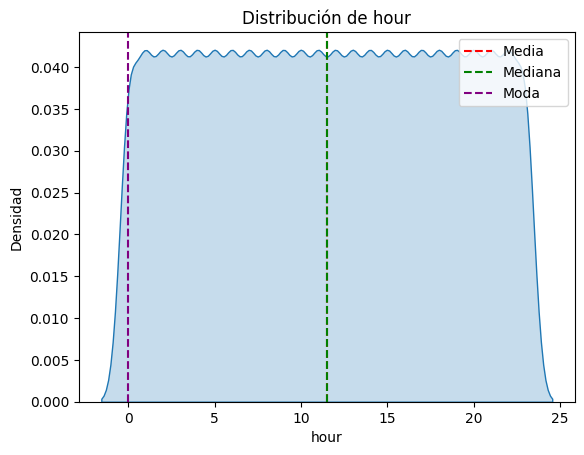

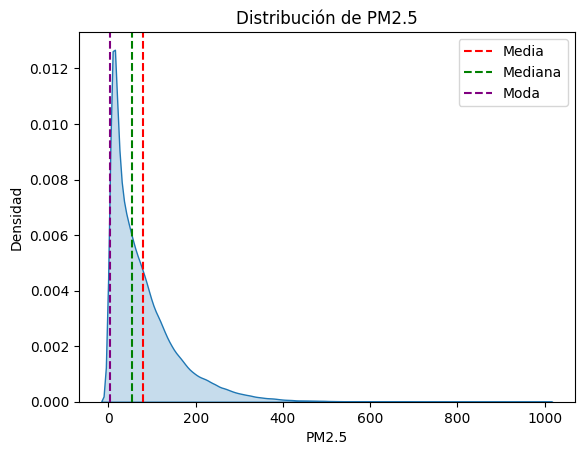

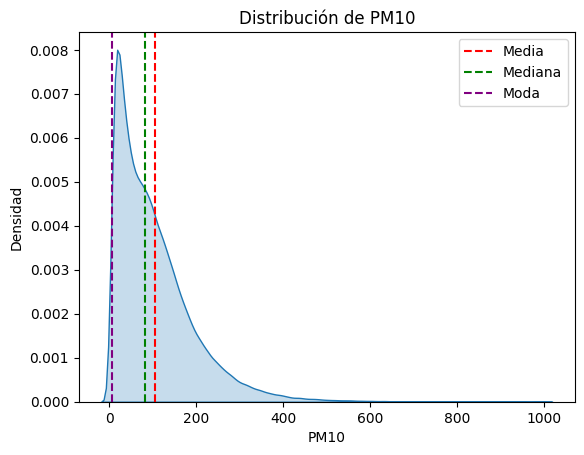

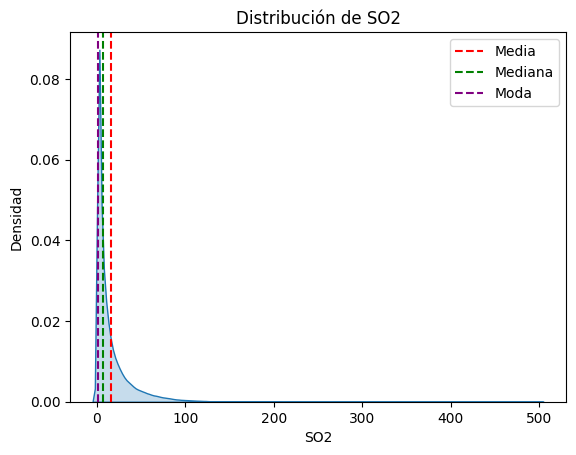

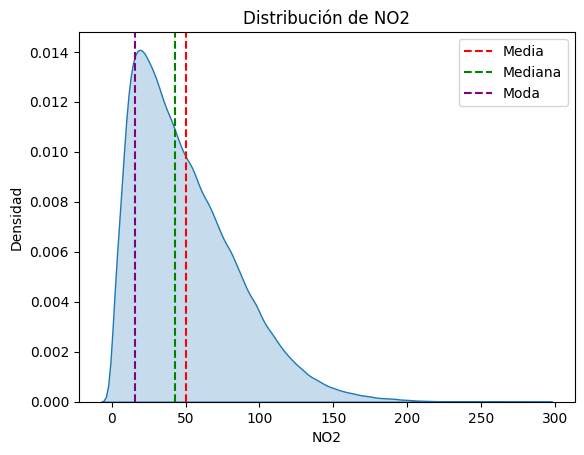

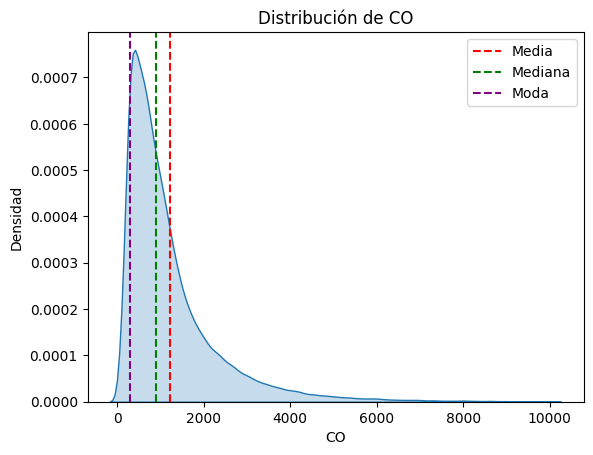

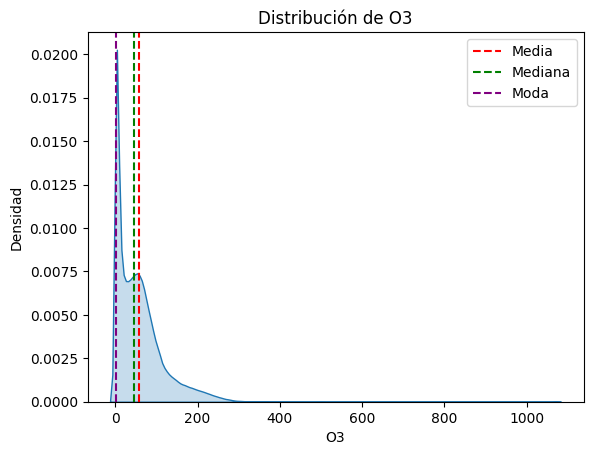

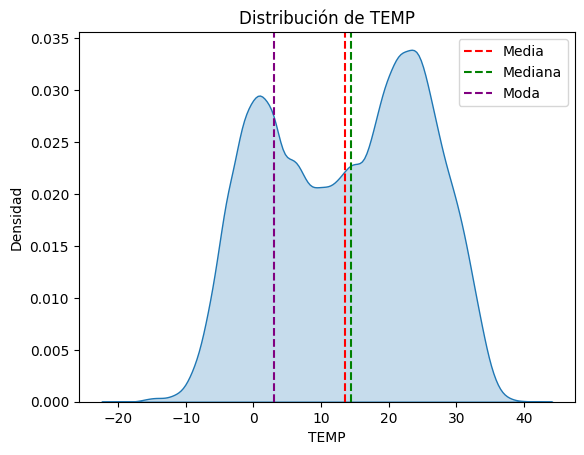

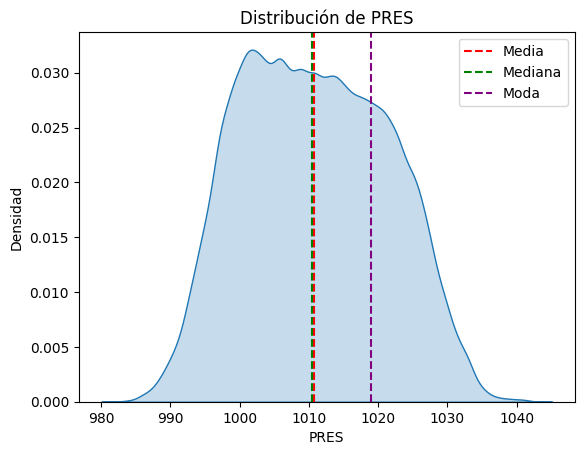

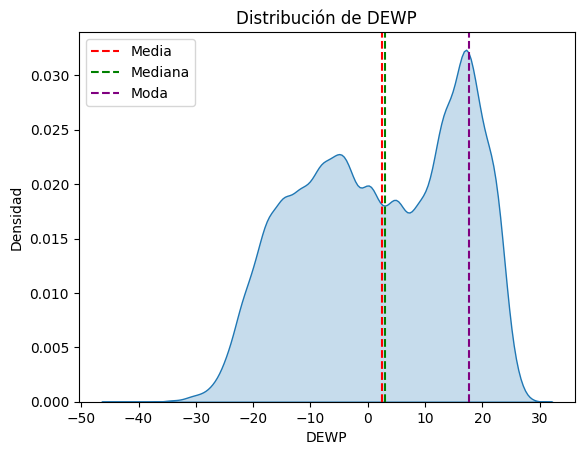

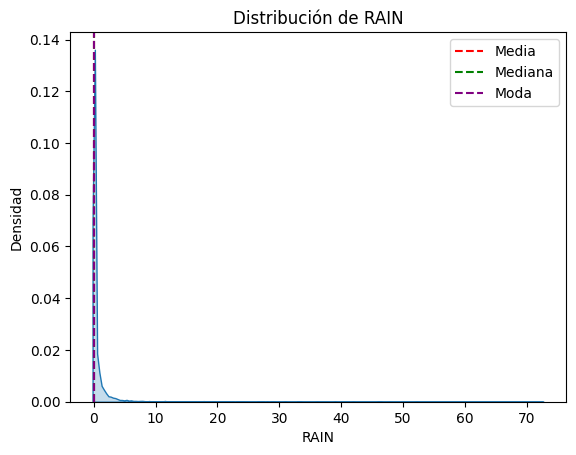

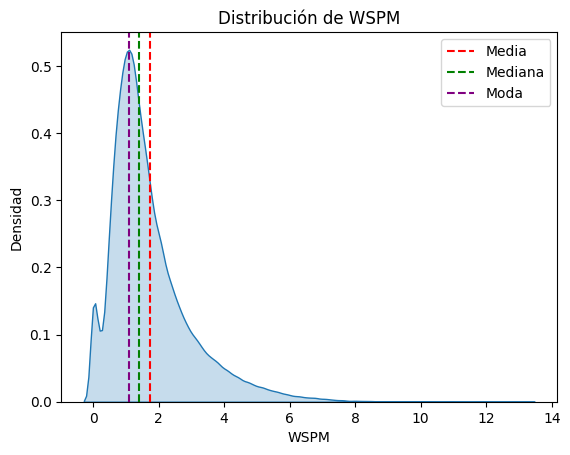

In [27]:
for columna in df.columns:
    plt.figure()
    sns.kdeplot(df[columna], fill=True)
    plt.axvline(x=media[columna], color='red', linestyle='--', label='Media')
    plt.axvline(x=mediana[columna], color='green', linestyle='--', label='Mediana')
    plt.axvline(x=moda[columna], color='purple', linestyle='--', label='Moda')
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {columna}')
    plt.legend()
    plt.show()

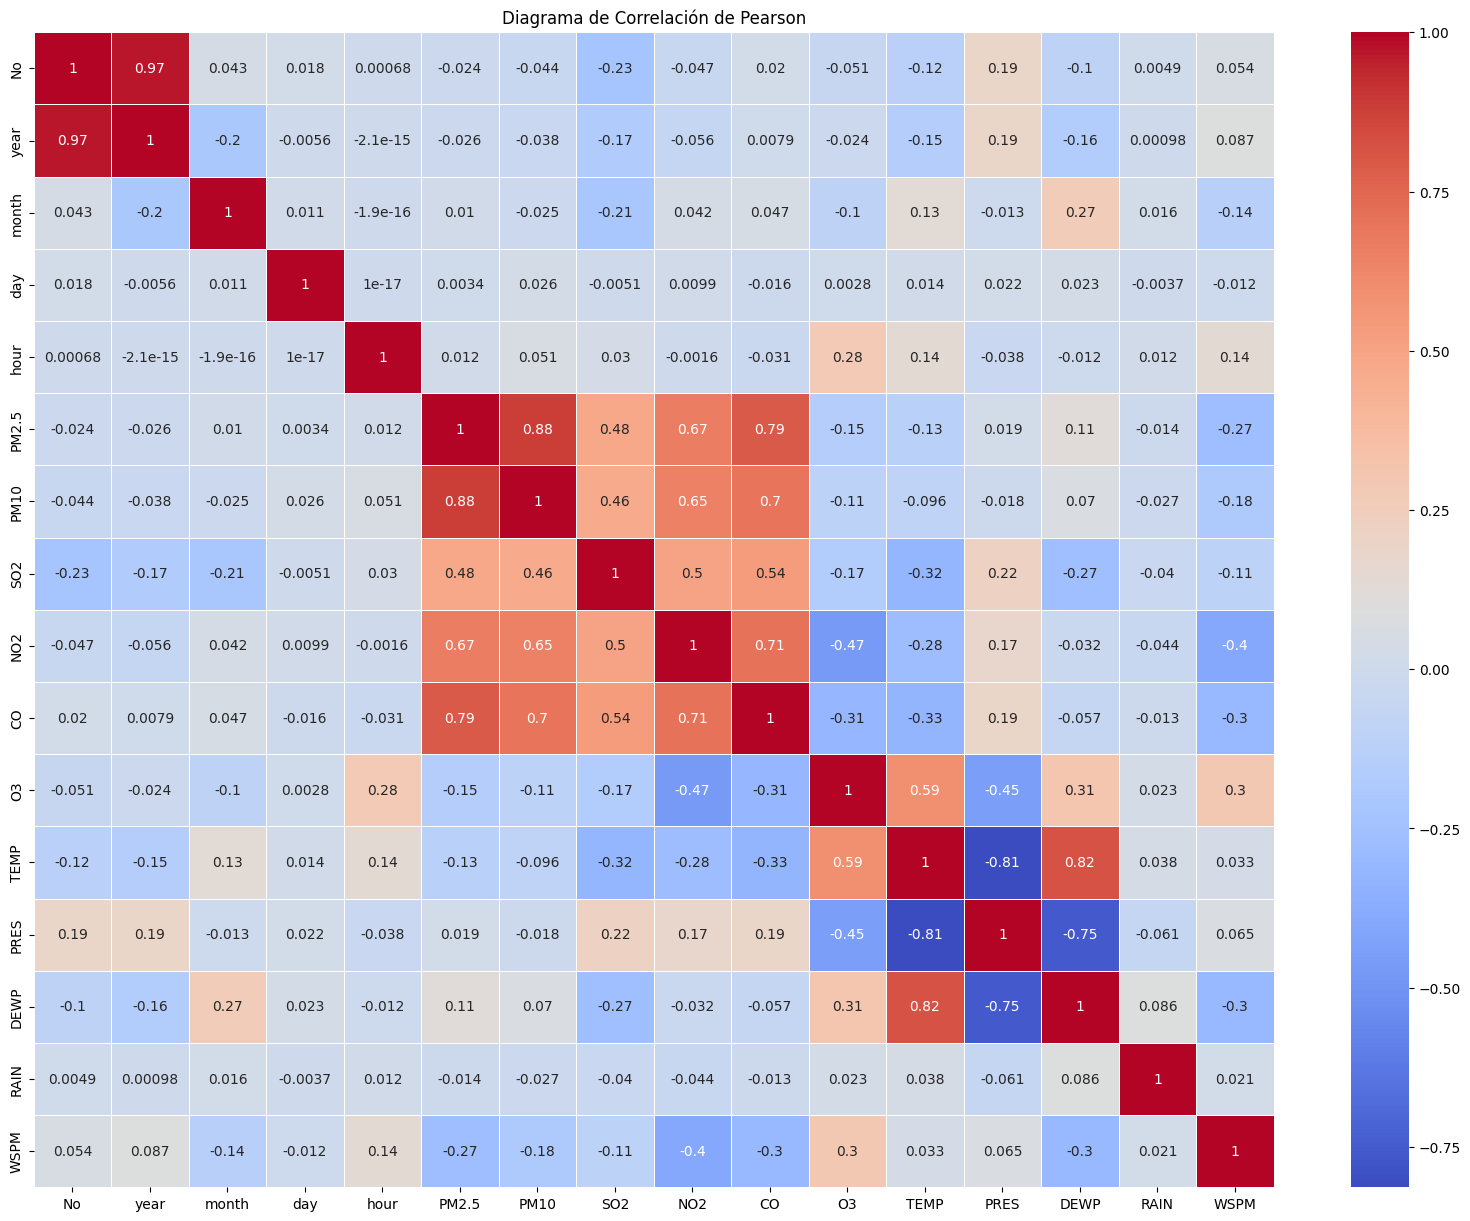

In [28]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Crear un mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Diagrama de Correlación de Pearson')
plt.show()

In [29]:
df = df1

In [30]:
df['PM2.5'].describe()

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64

In [31]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

In [32]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [33]:
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)

In [34]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  AQI      420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 64.2+ MB


In [36]:
columns_all = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

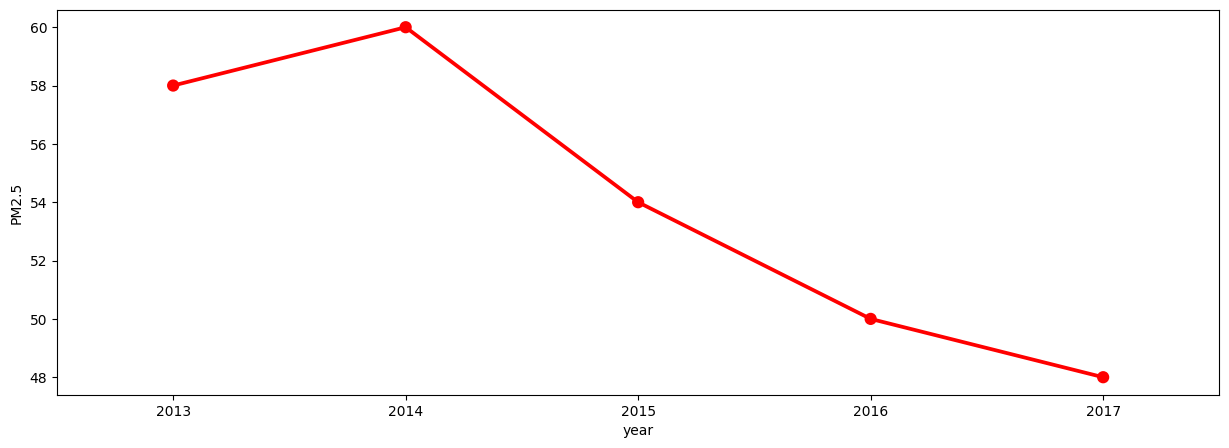

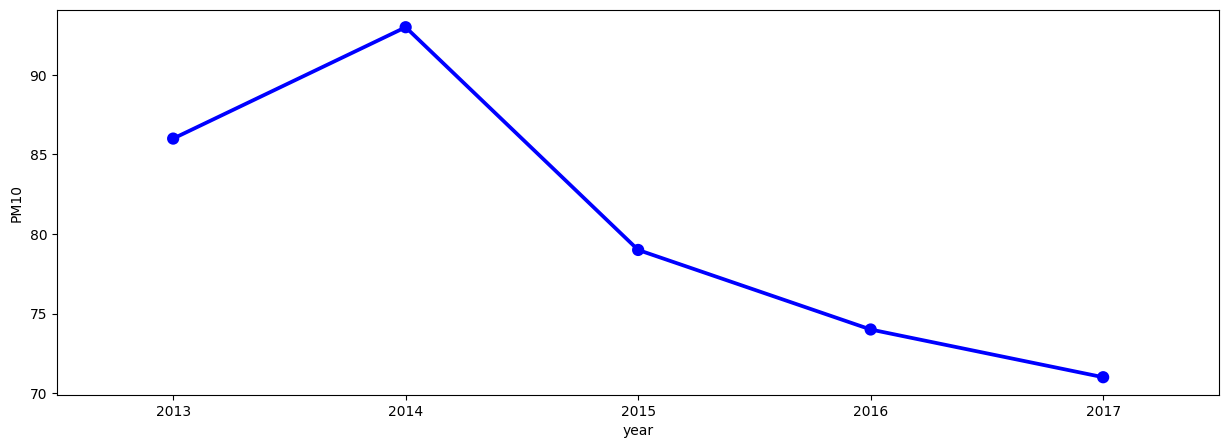

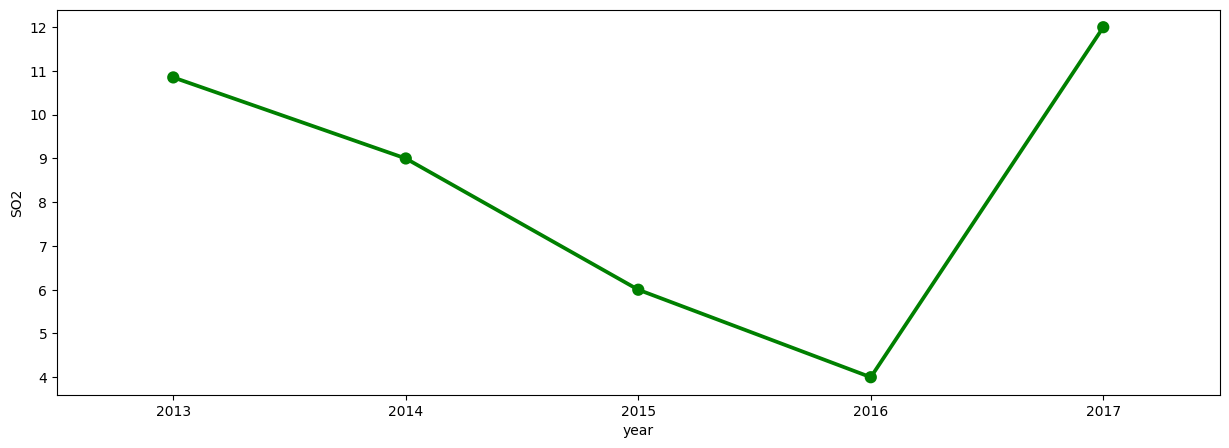

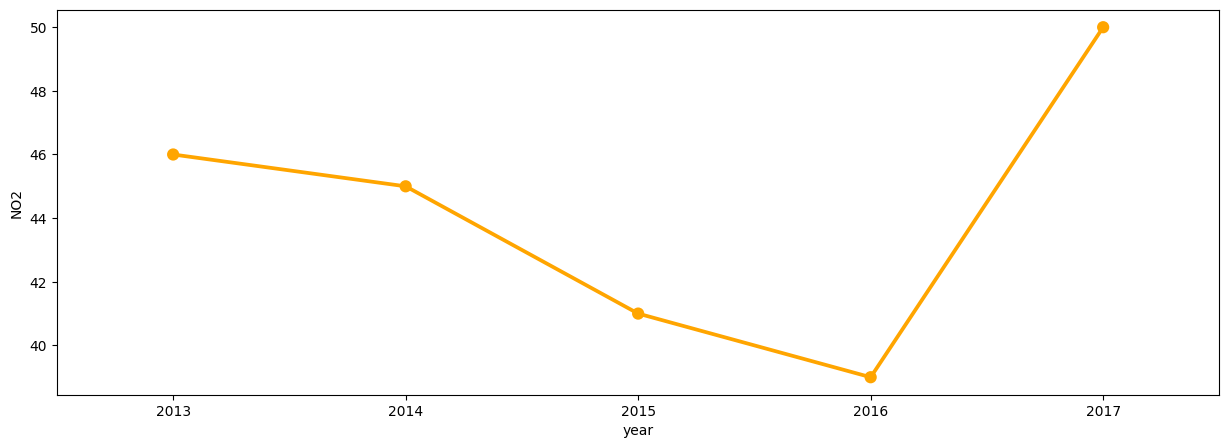

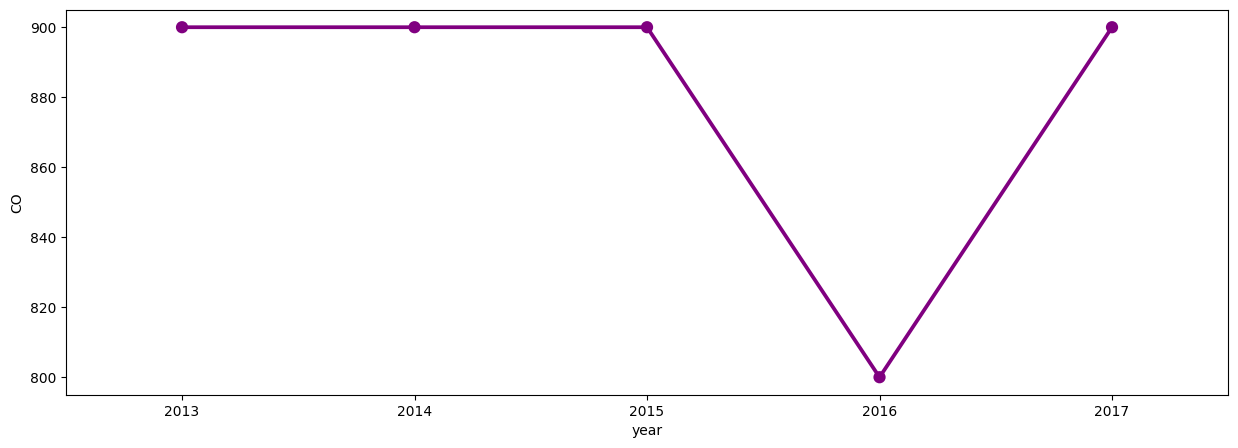

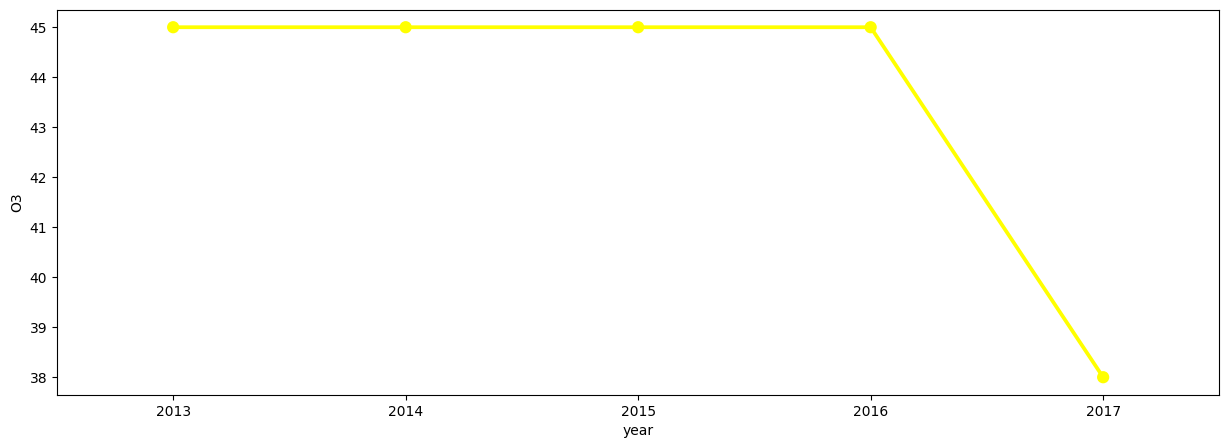

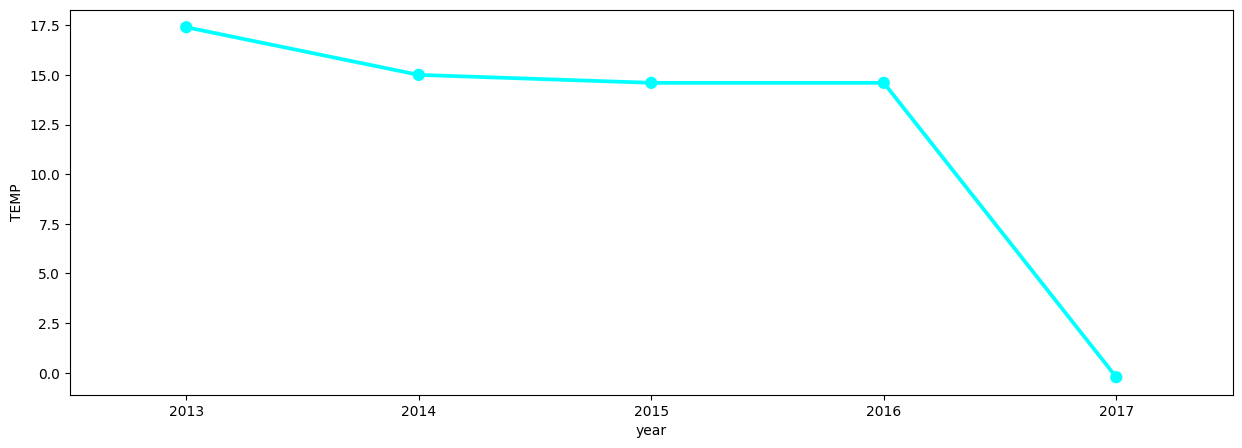

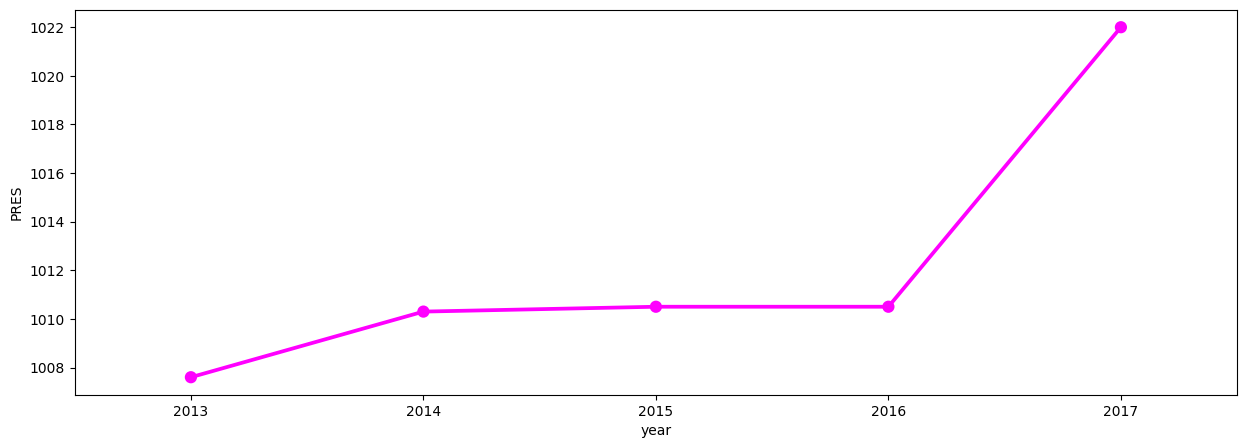

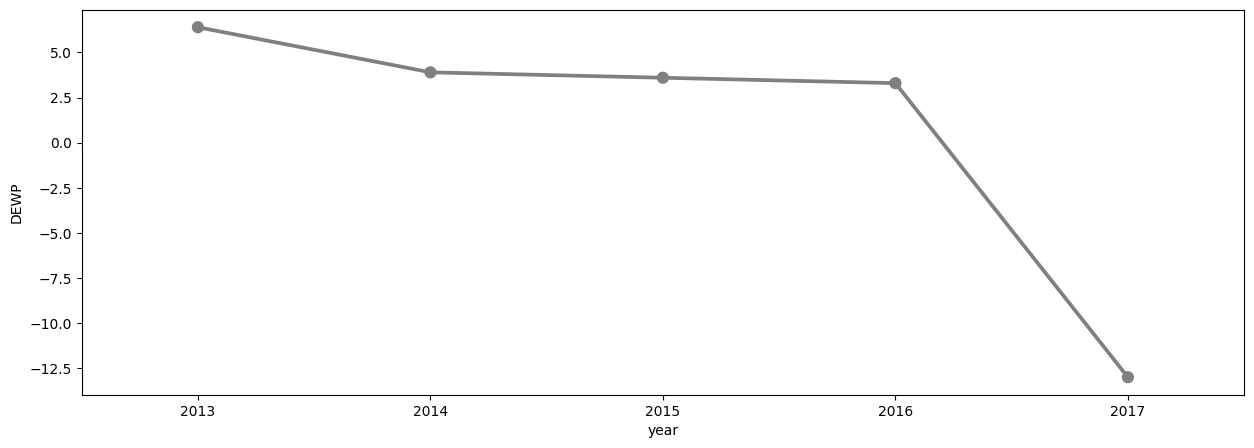

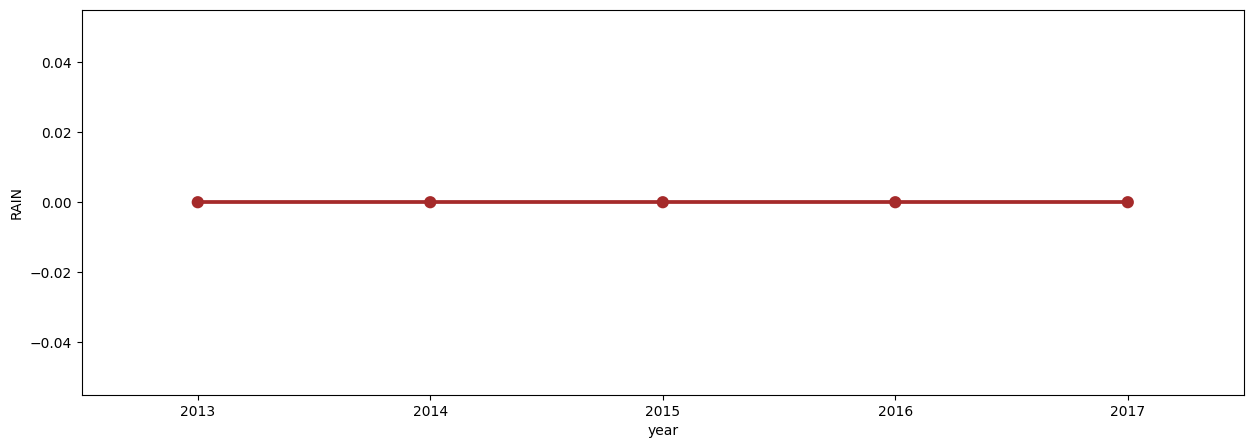

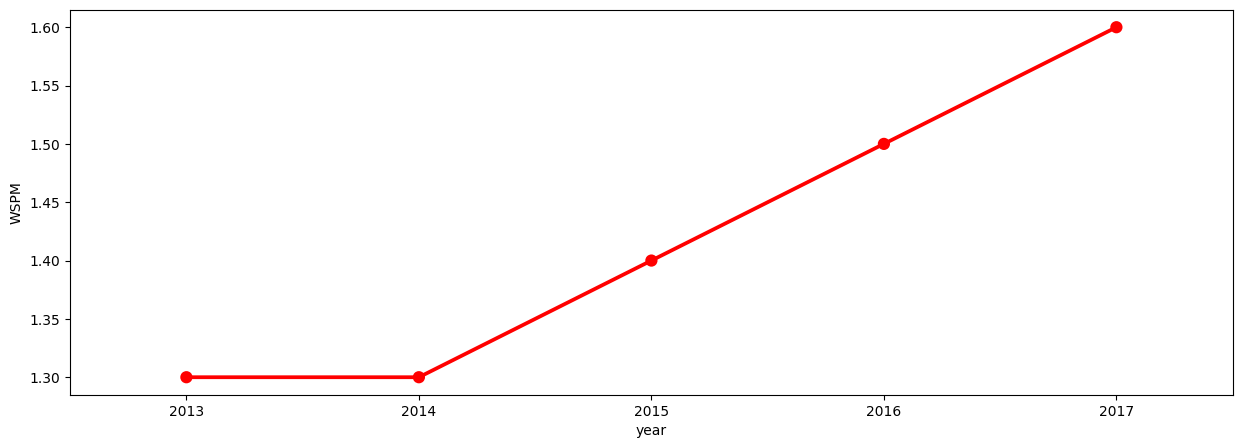

In [37]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='year', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  AQI      420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 64.2+ MB


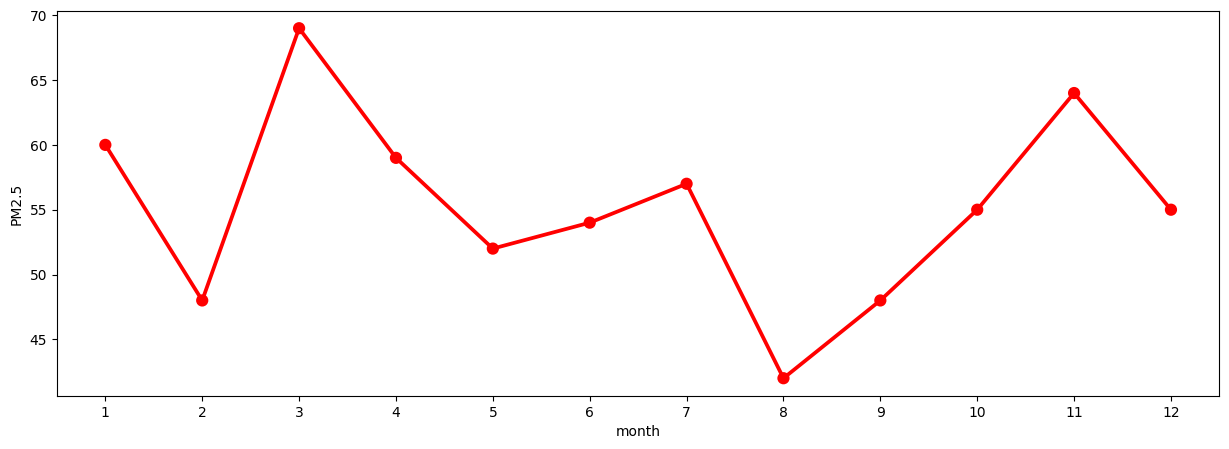

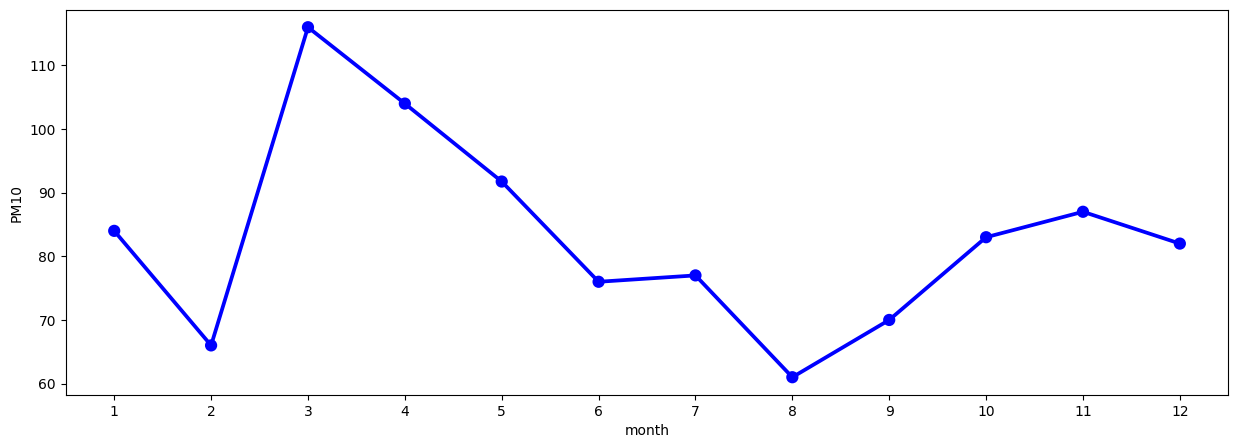

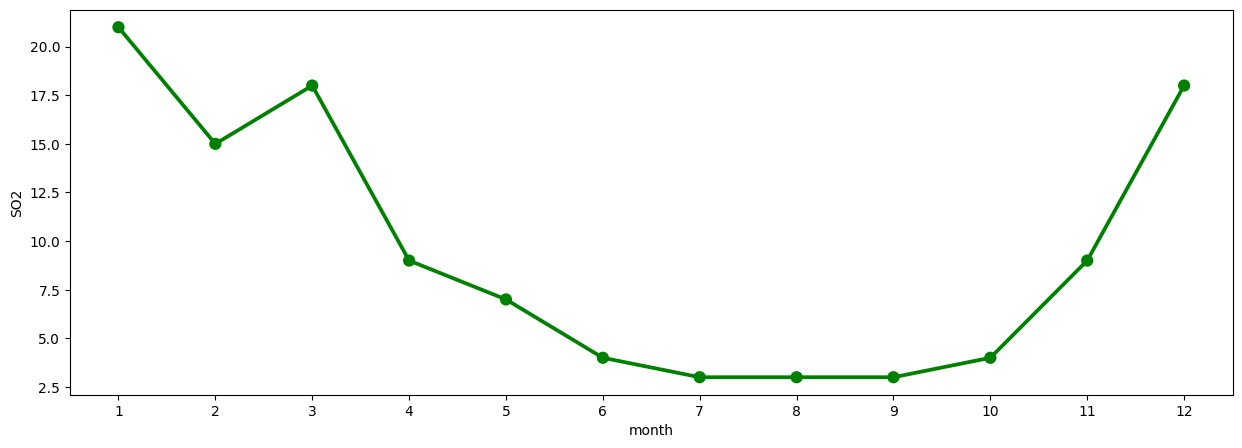

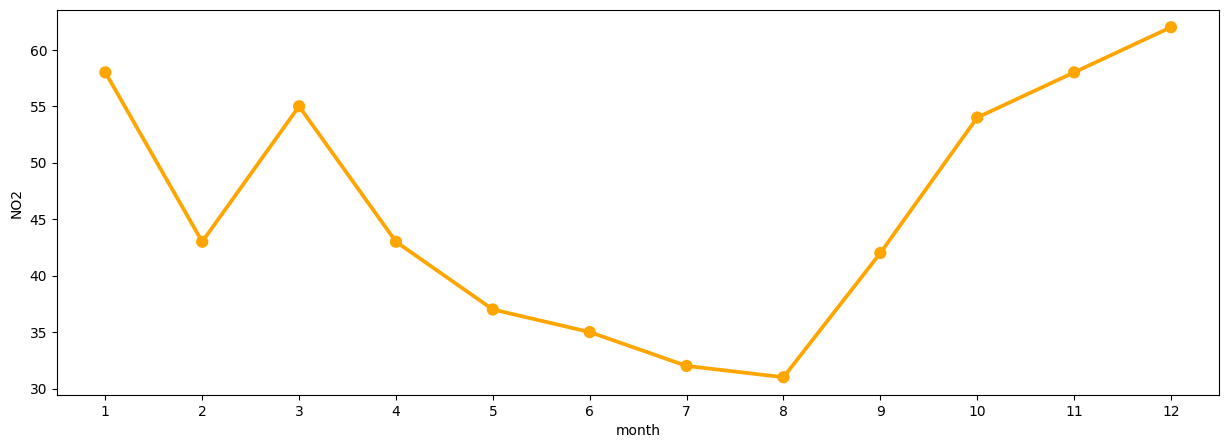

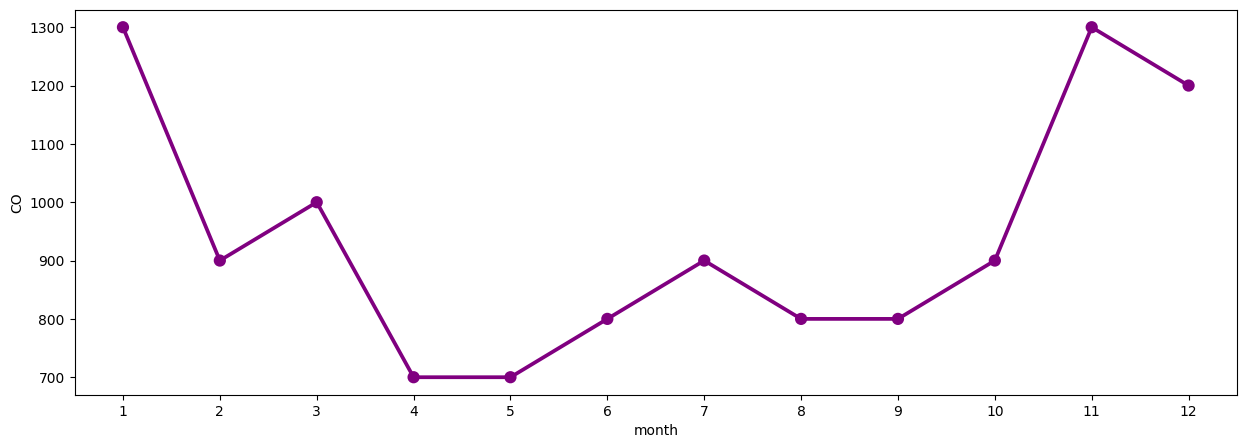

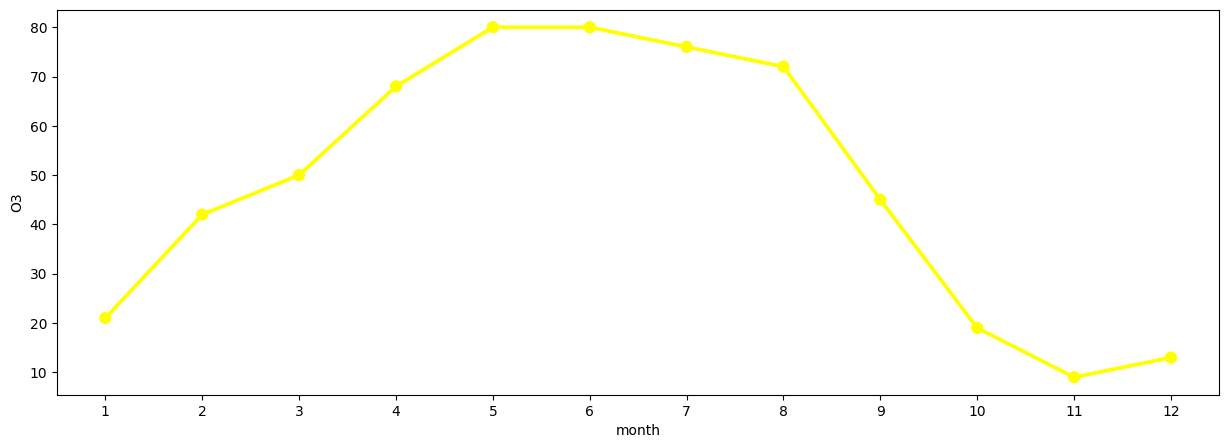

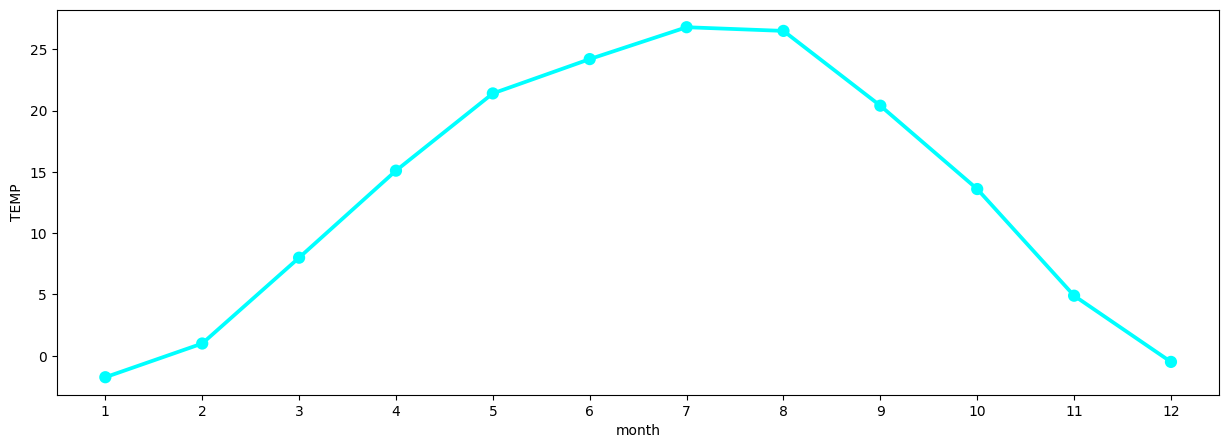

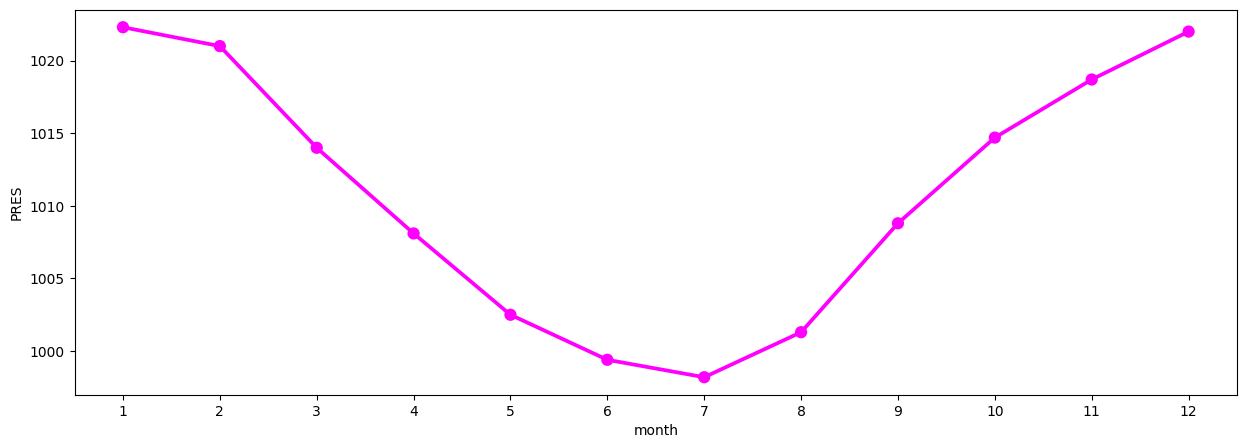

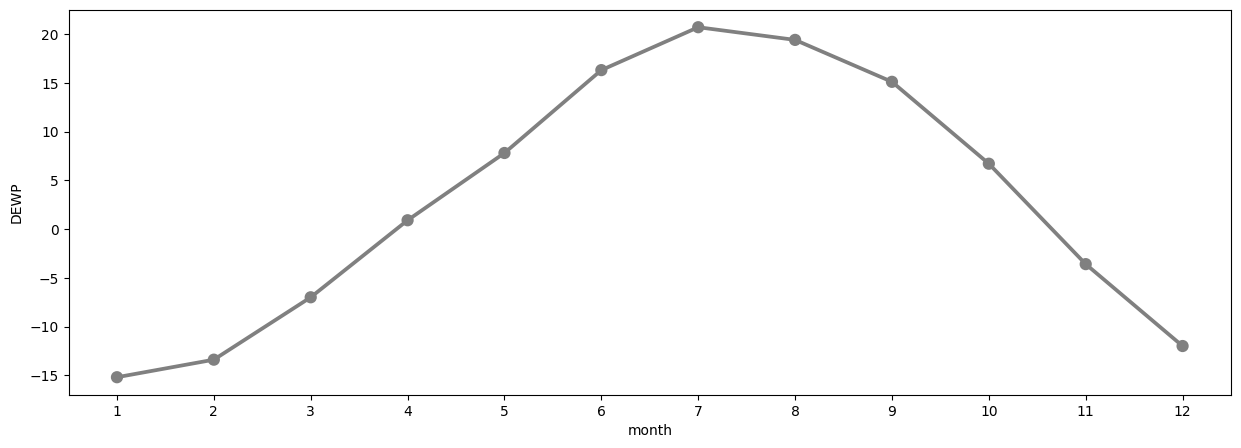

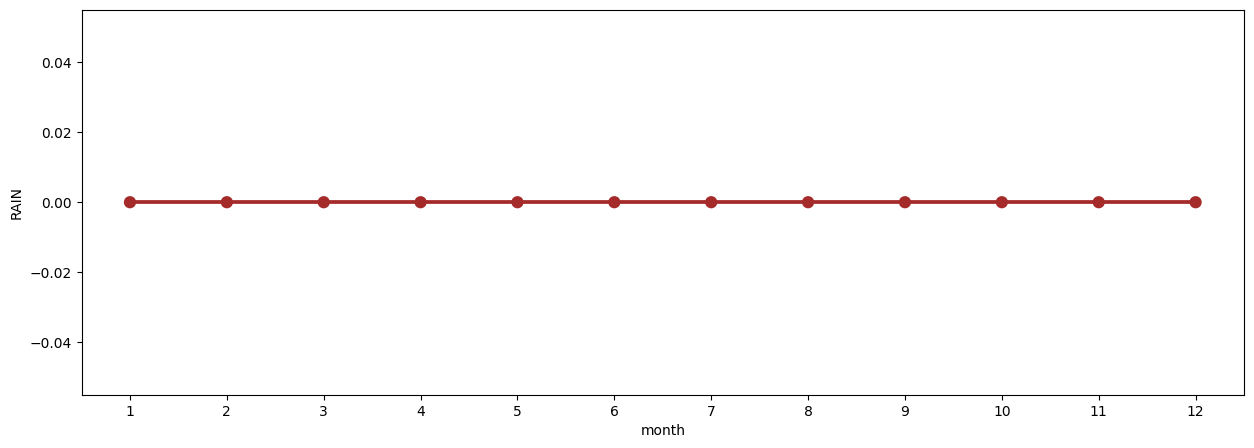

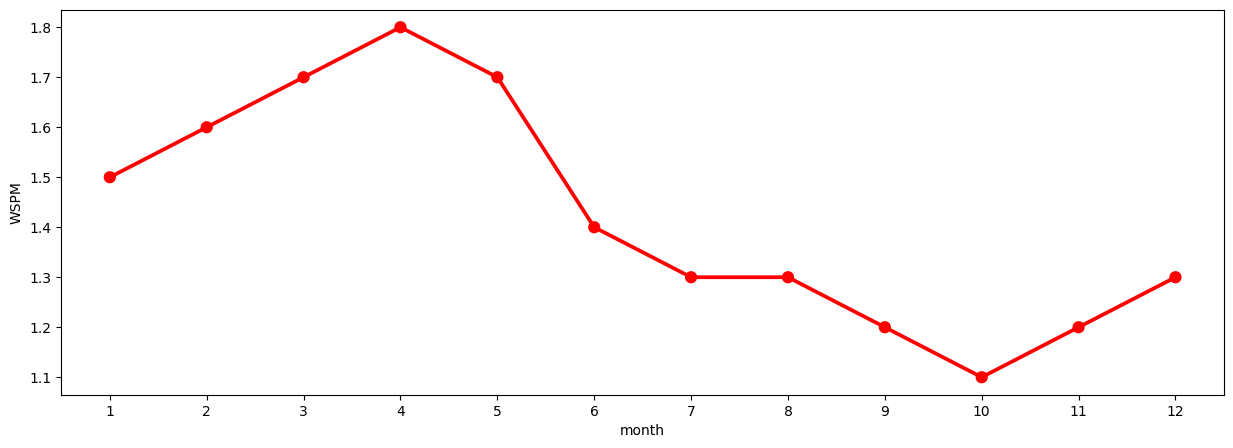

In [39]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

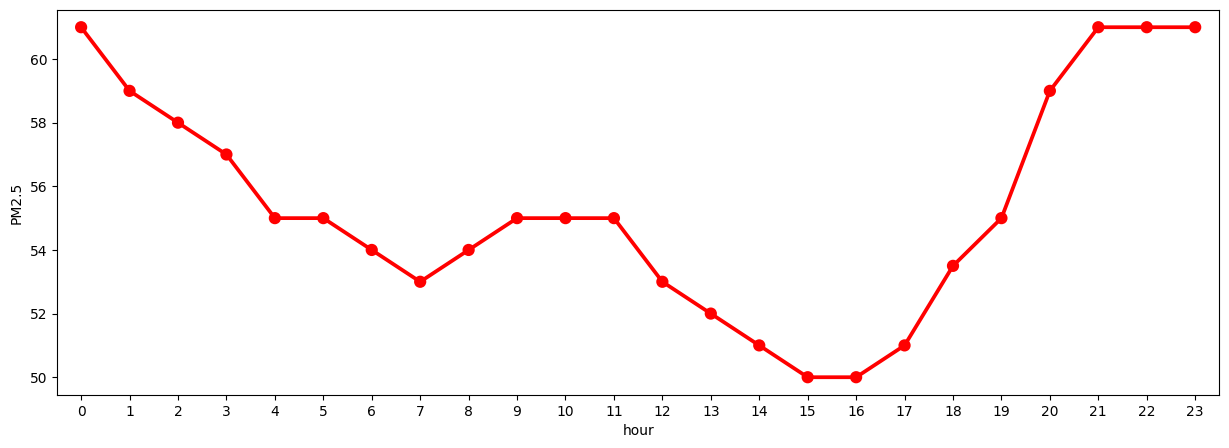

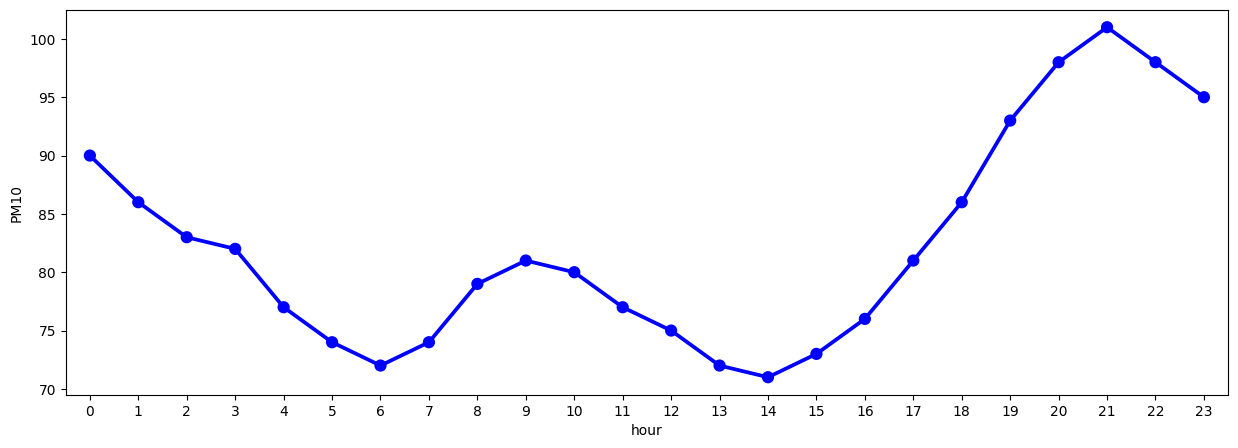

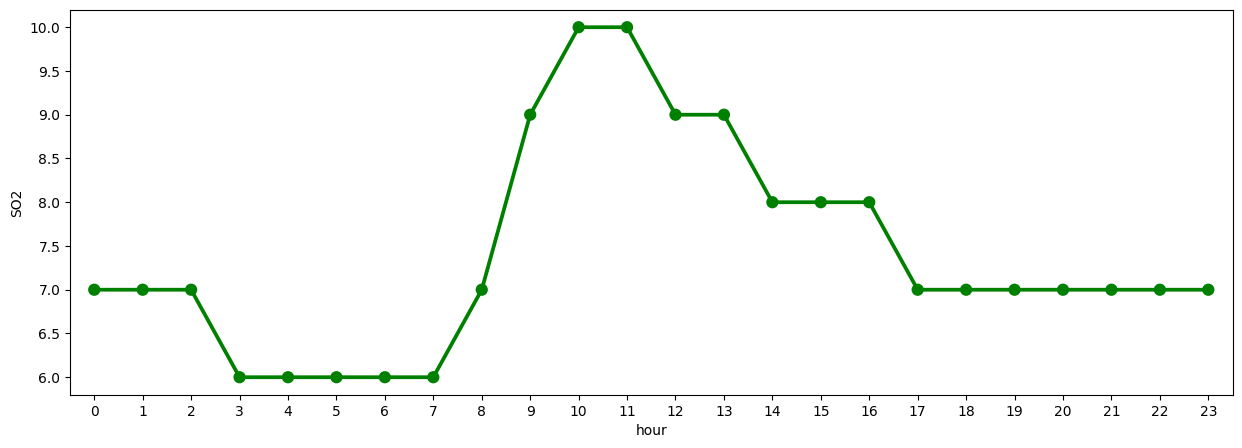

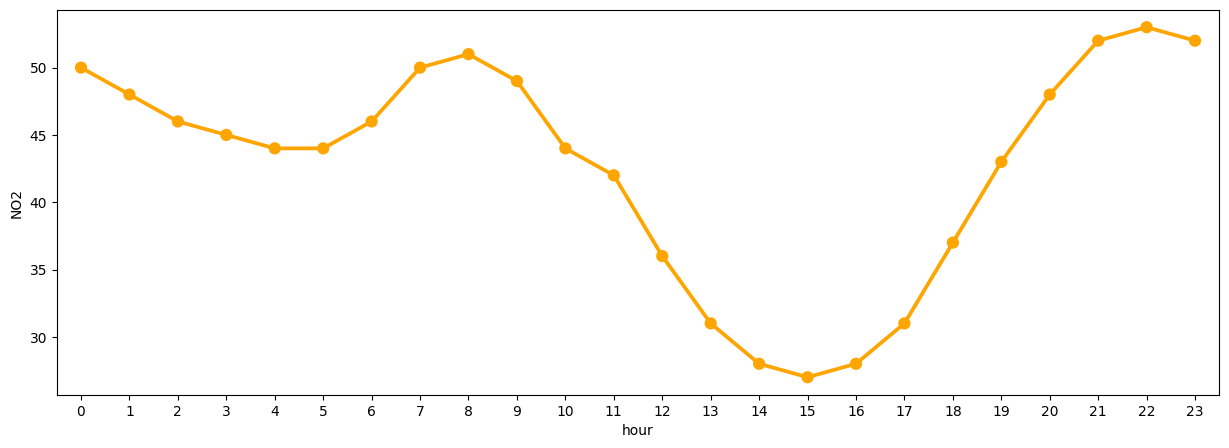

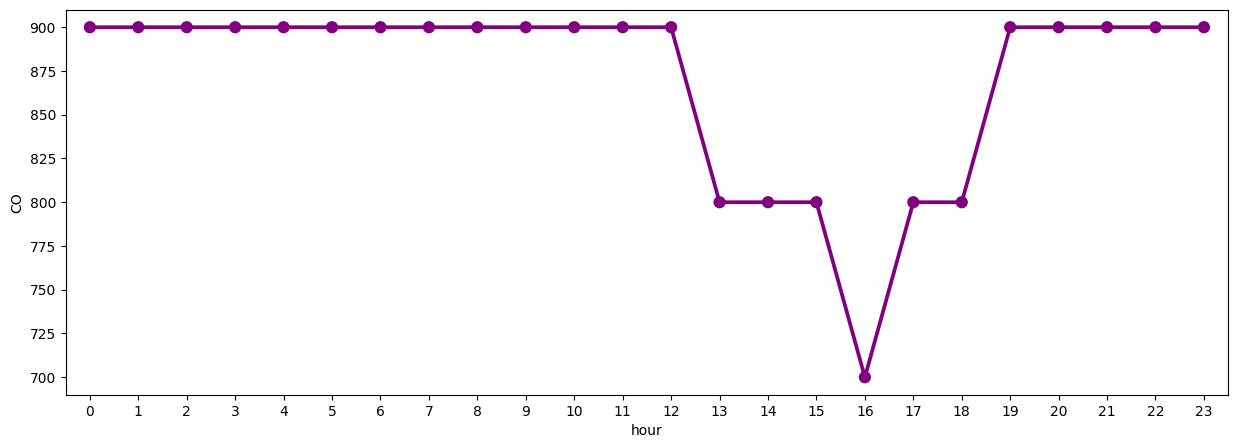

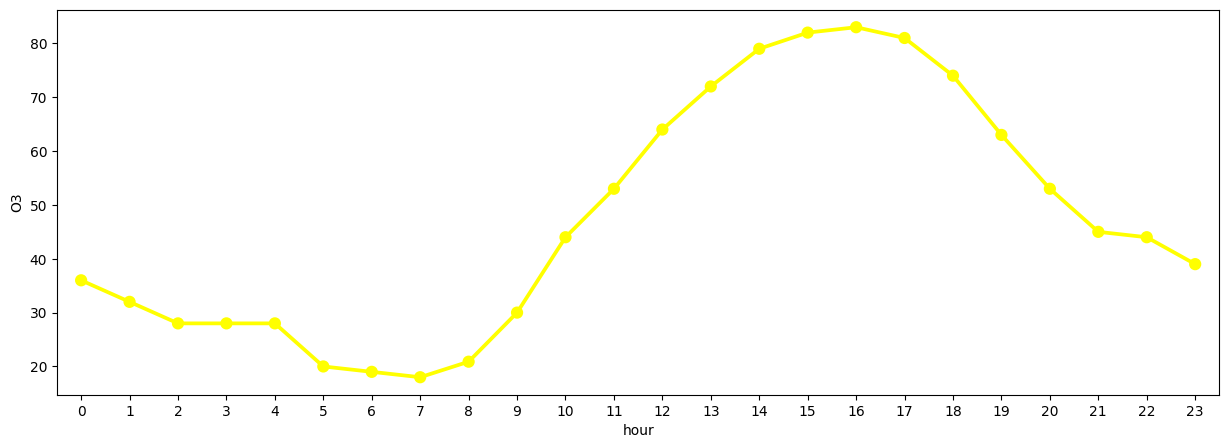

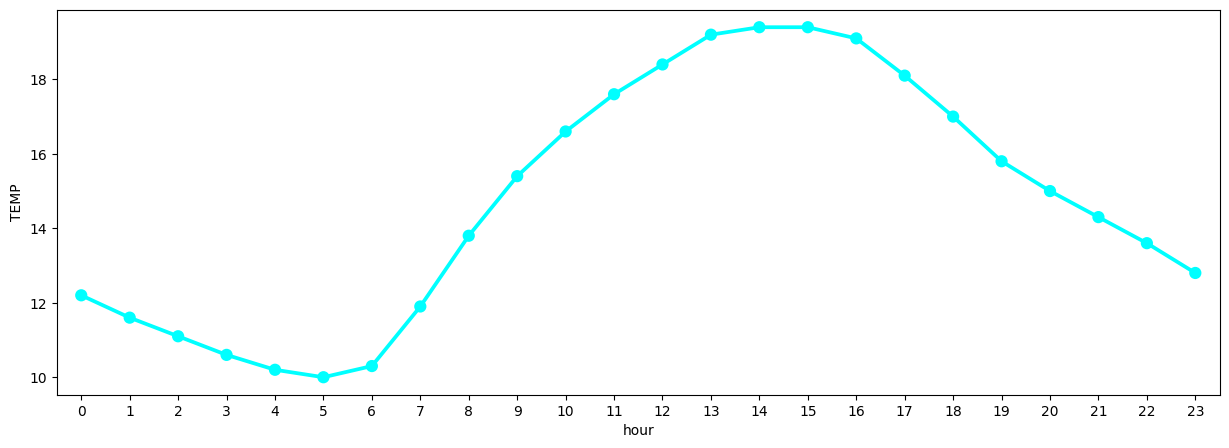

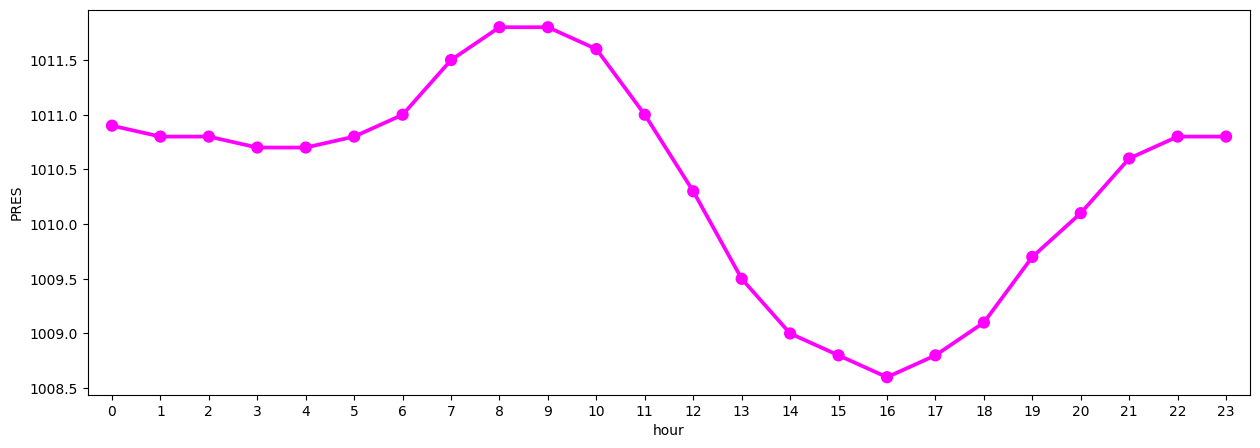

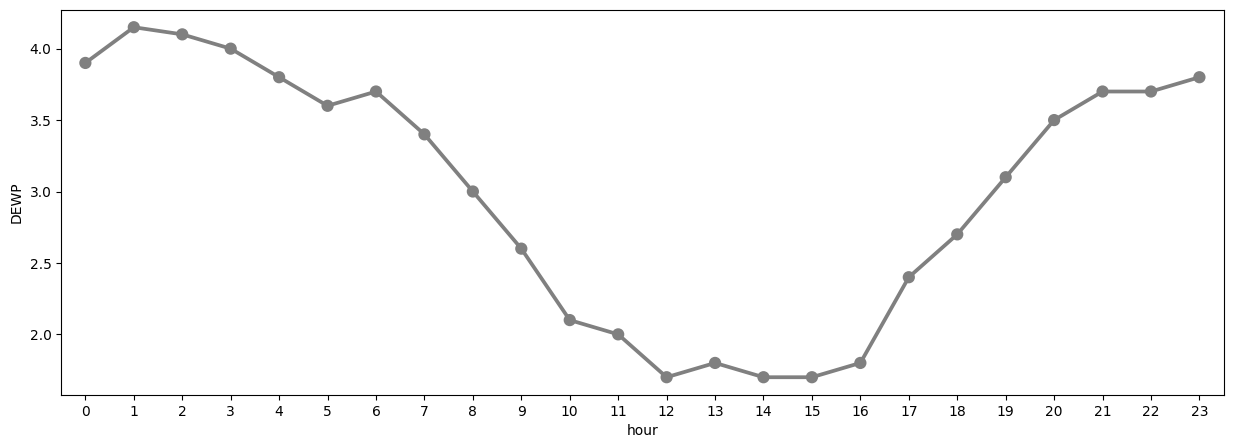

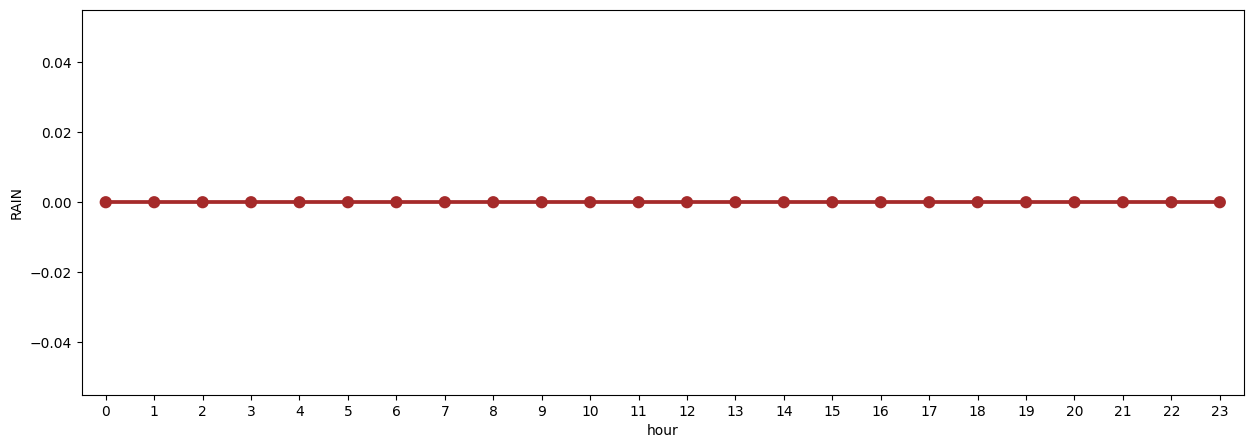

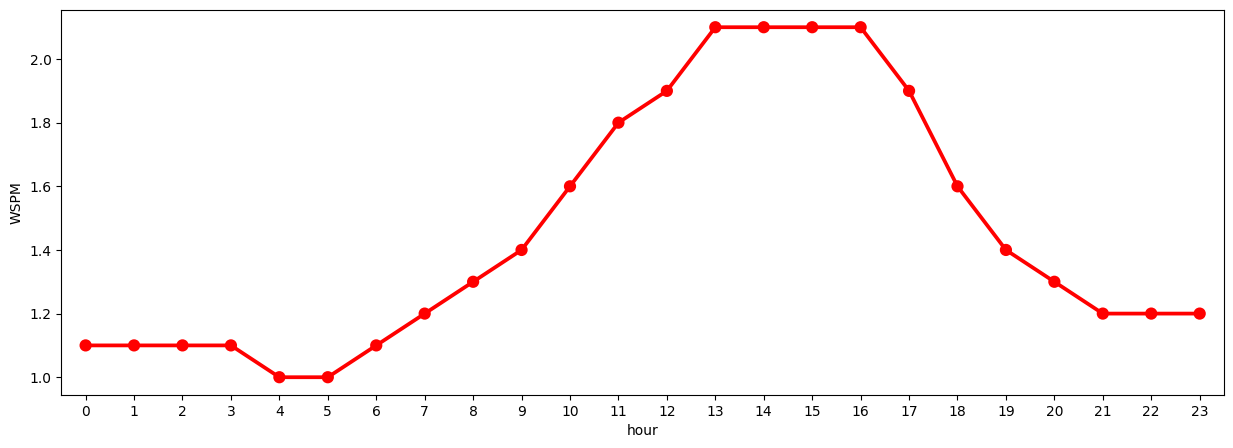

In [40]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

# Analisis por Año

In [41]:
df2 = df

In [42]:
years = df['year'].unique()
print("Years: ", years)

Years:  [2013 2014 2015 2016 2017]


C:\Users\aleja\AppData\Local\Temp\ipykernel_2104\1134257978.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f,ax=plt.subplots(figsize=(15,5))


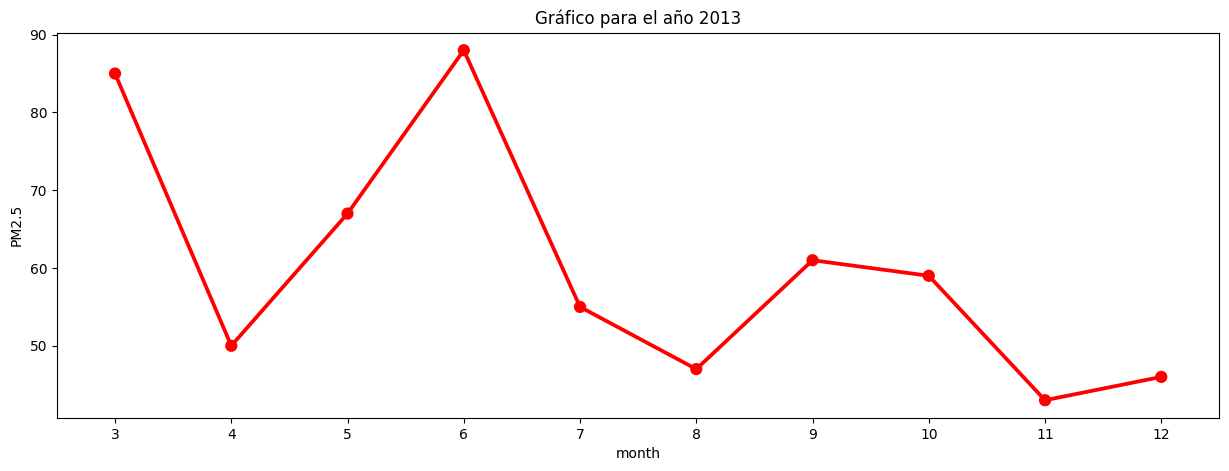

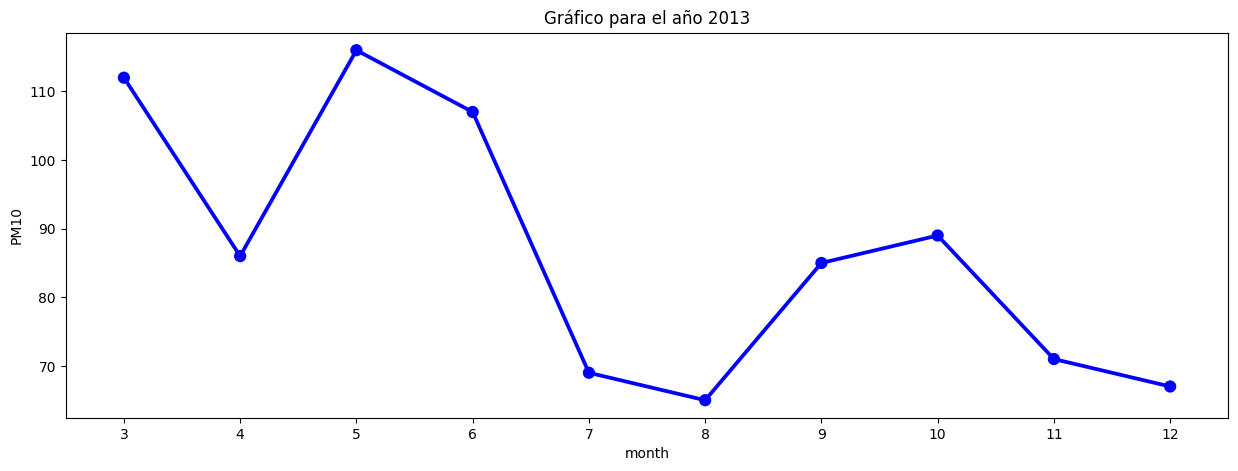

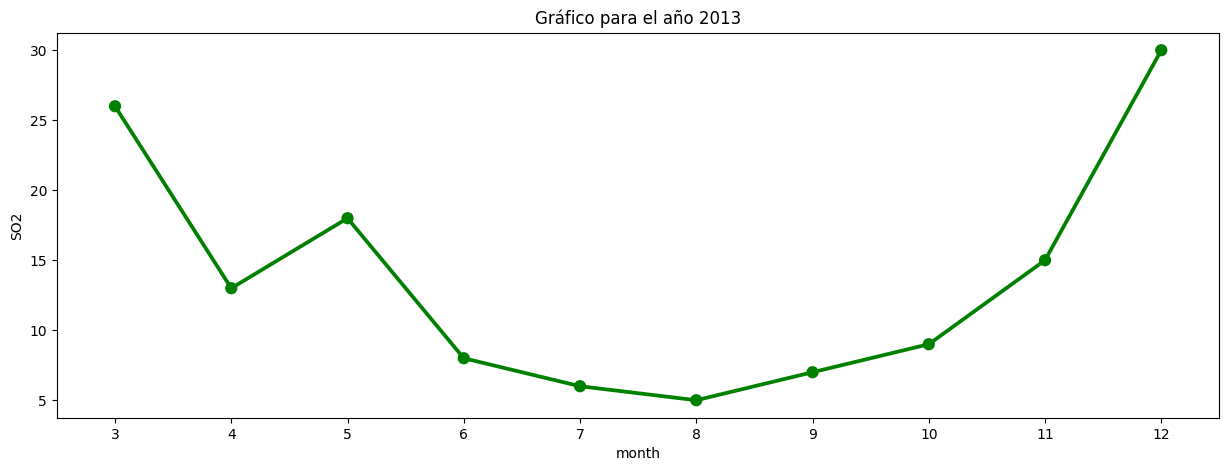

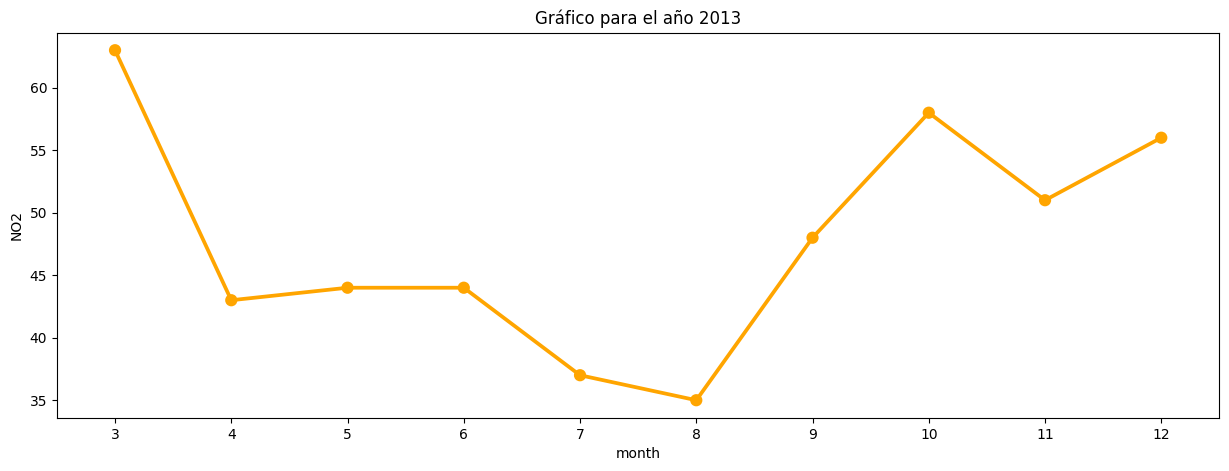

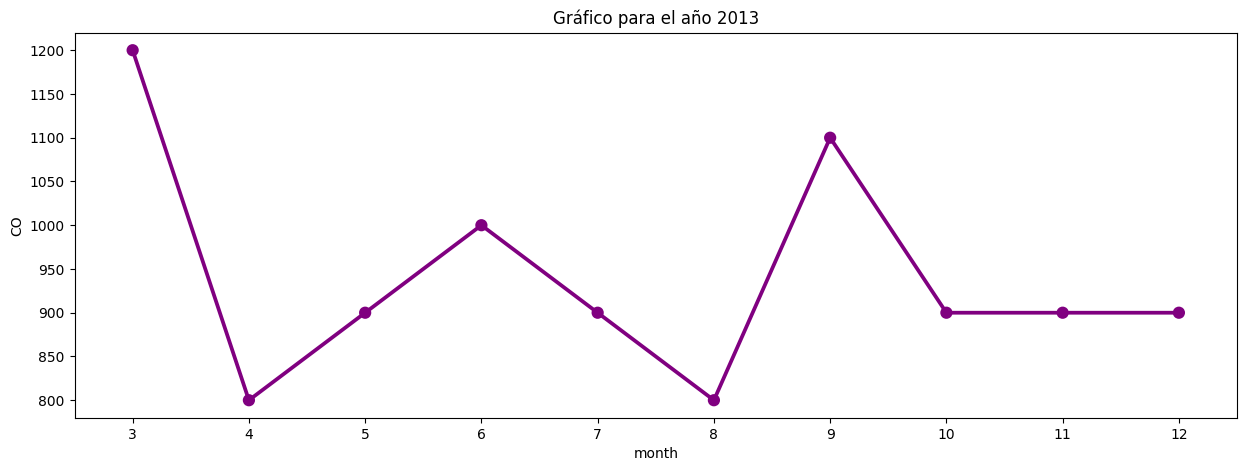

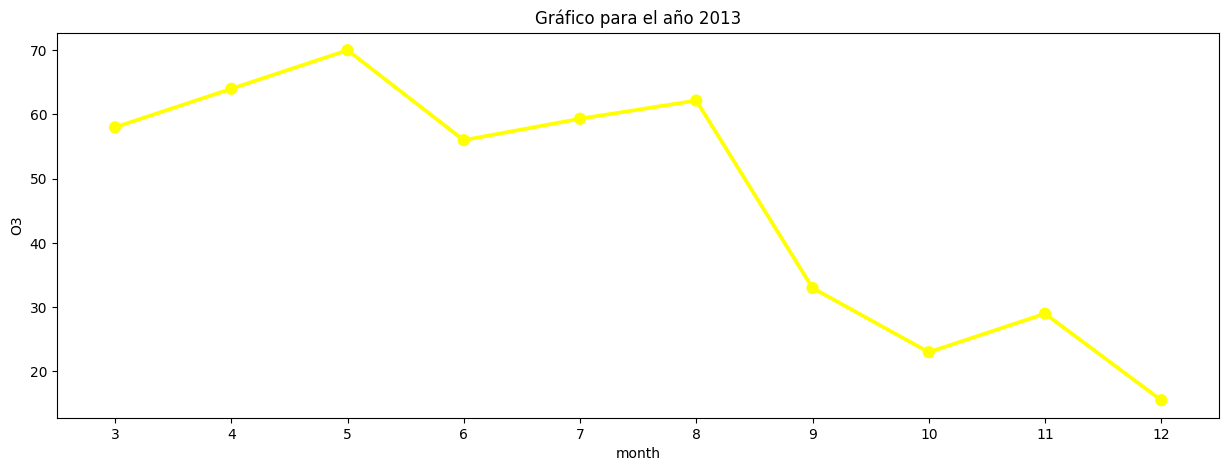

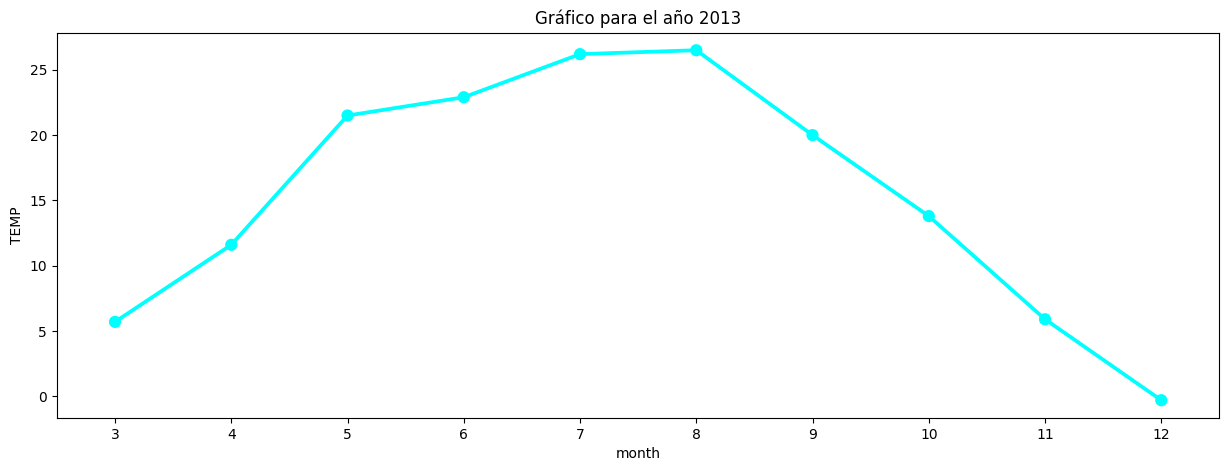

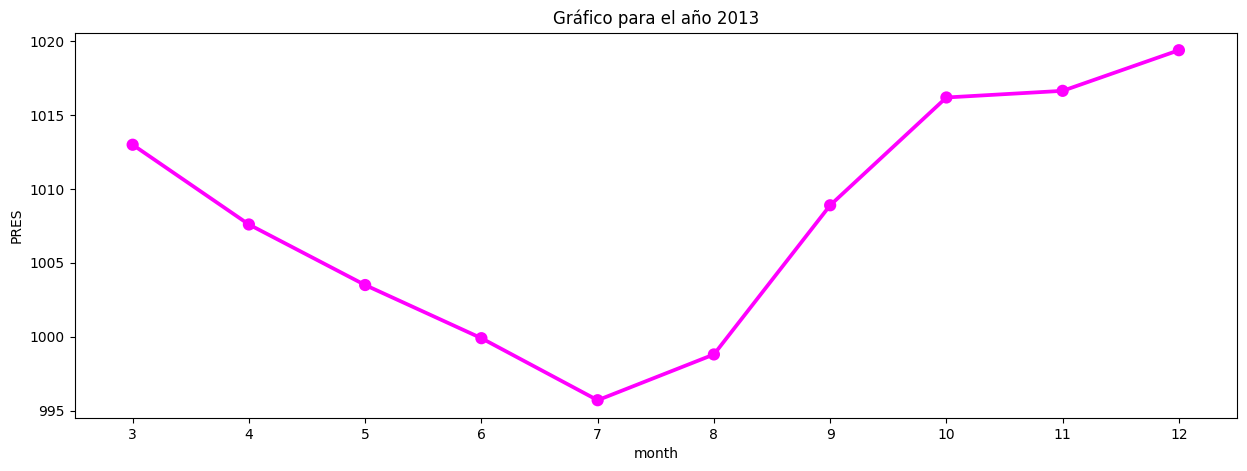

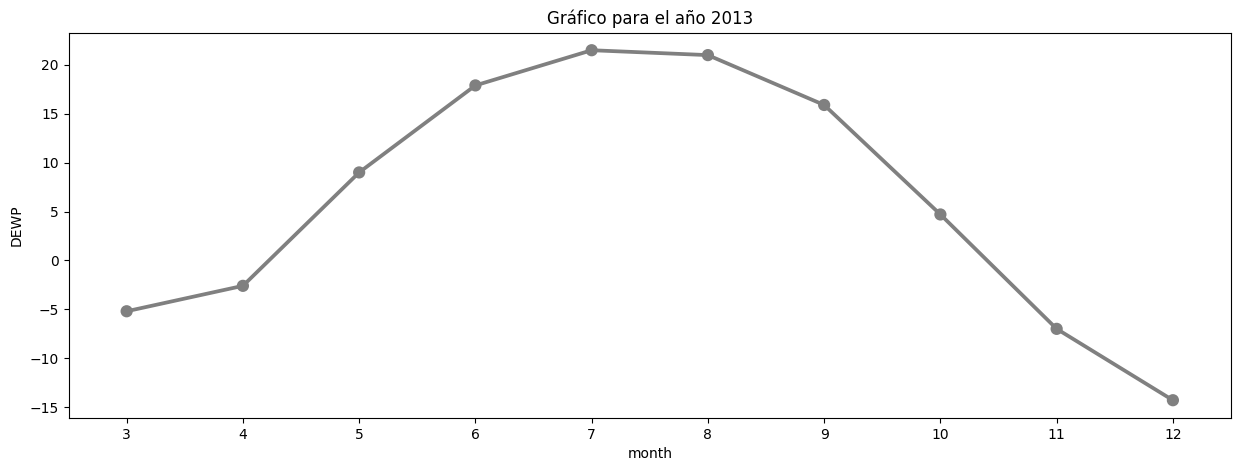

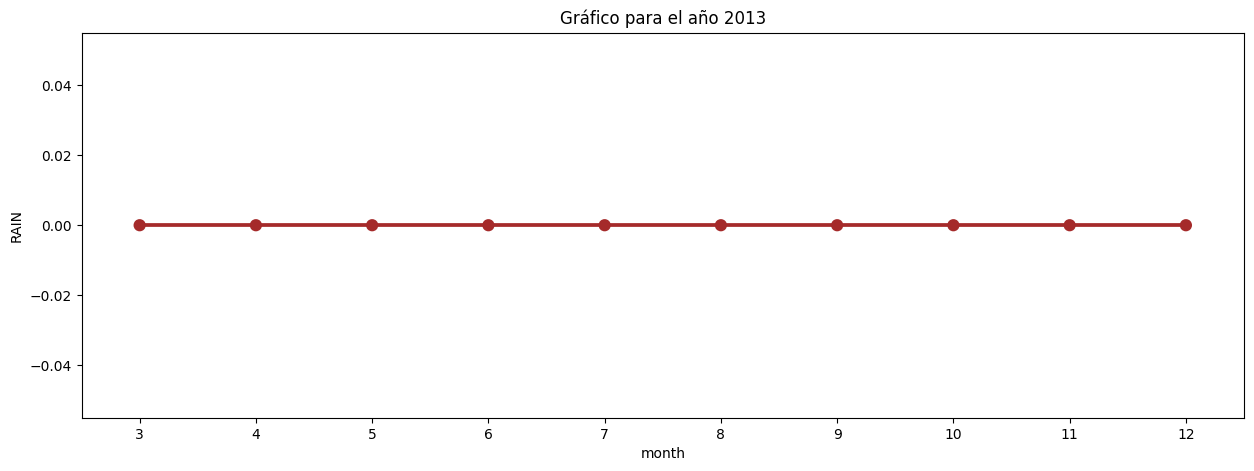

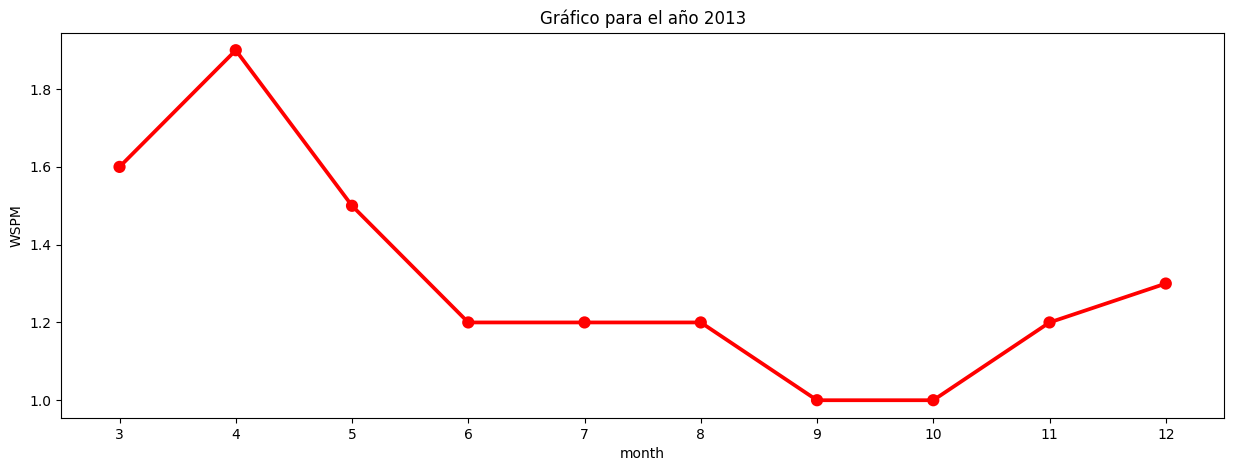

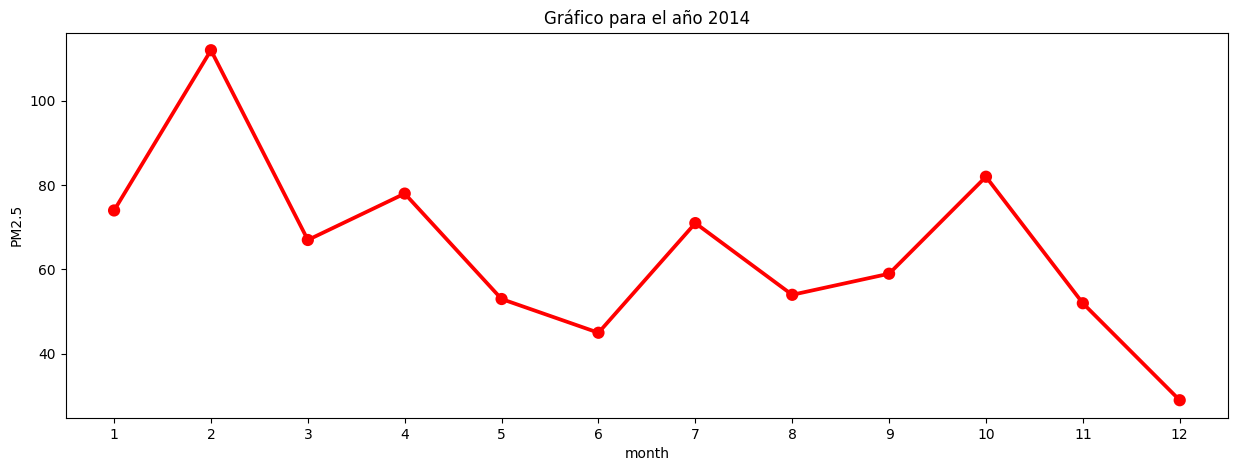

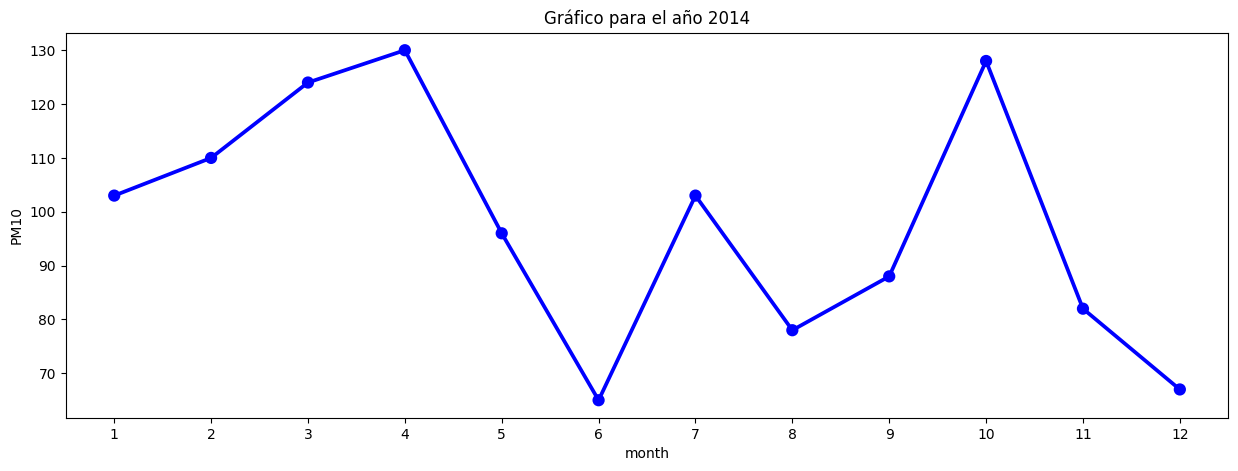

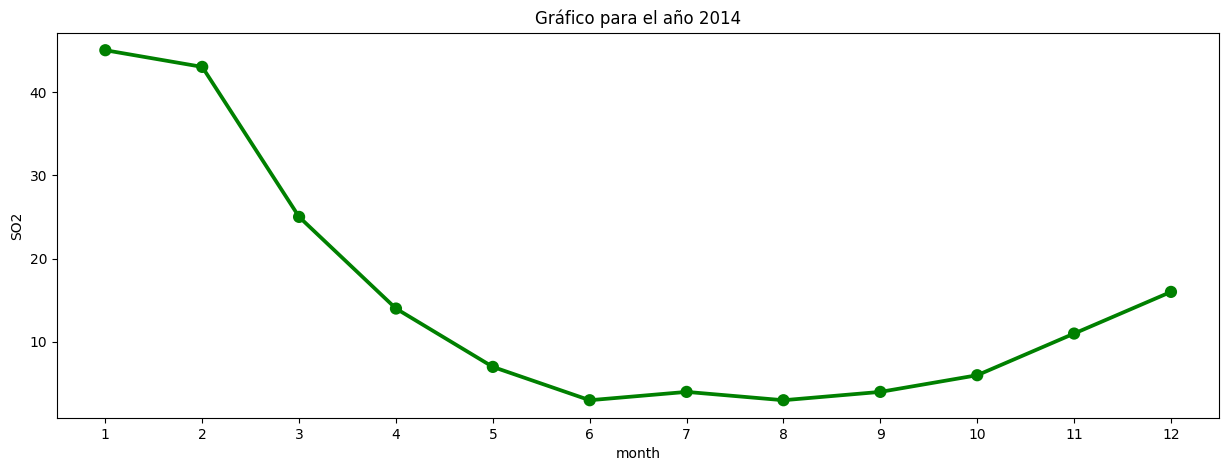

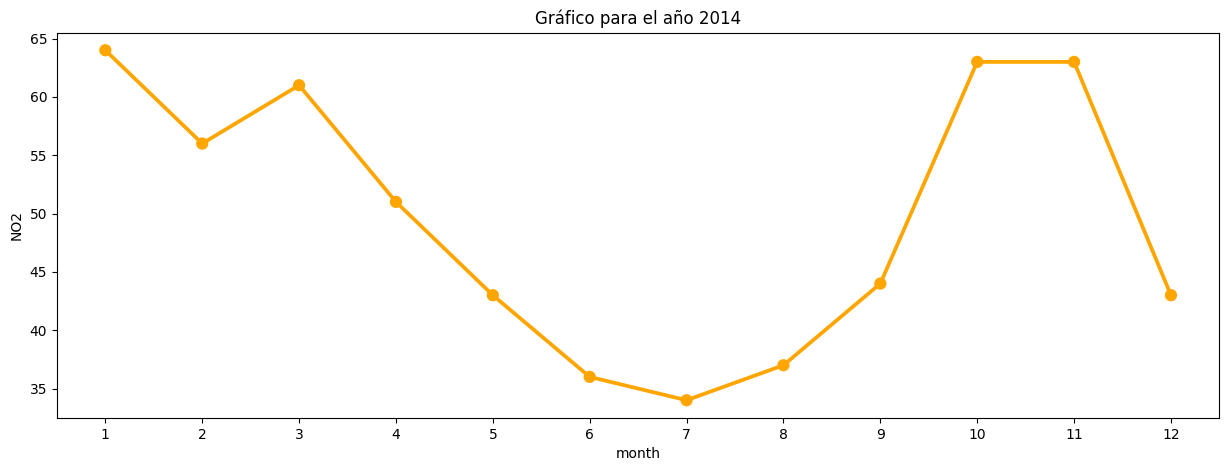

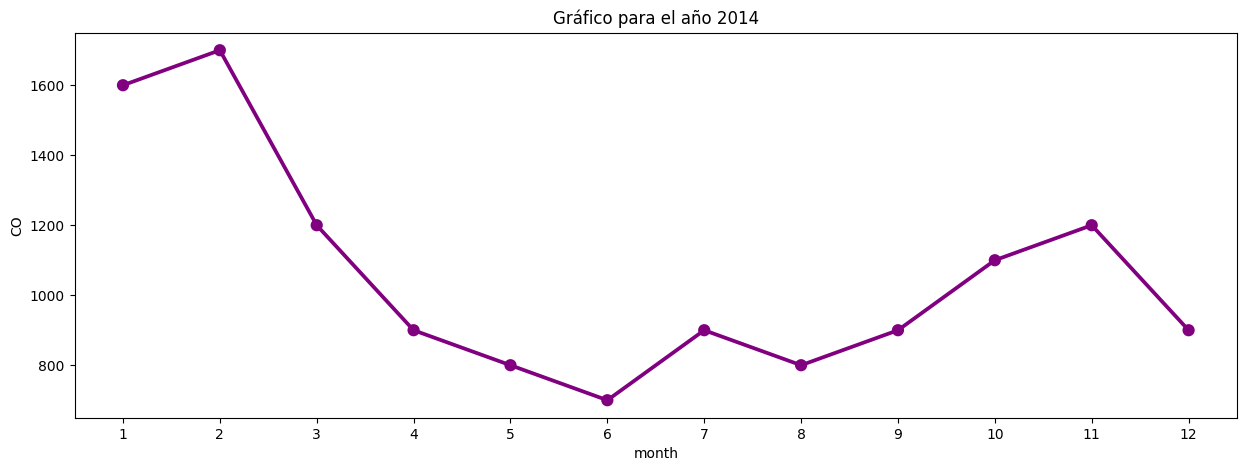

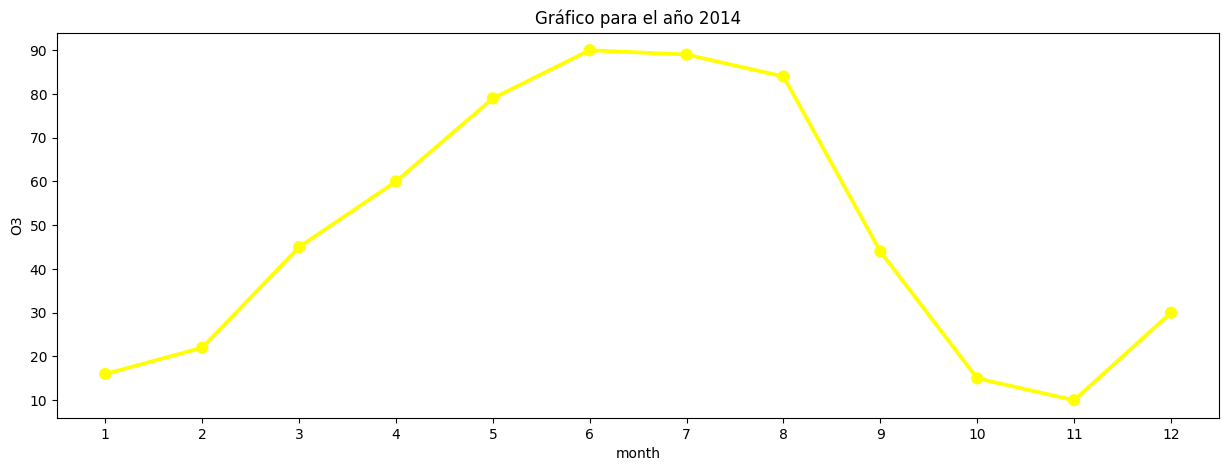

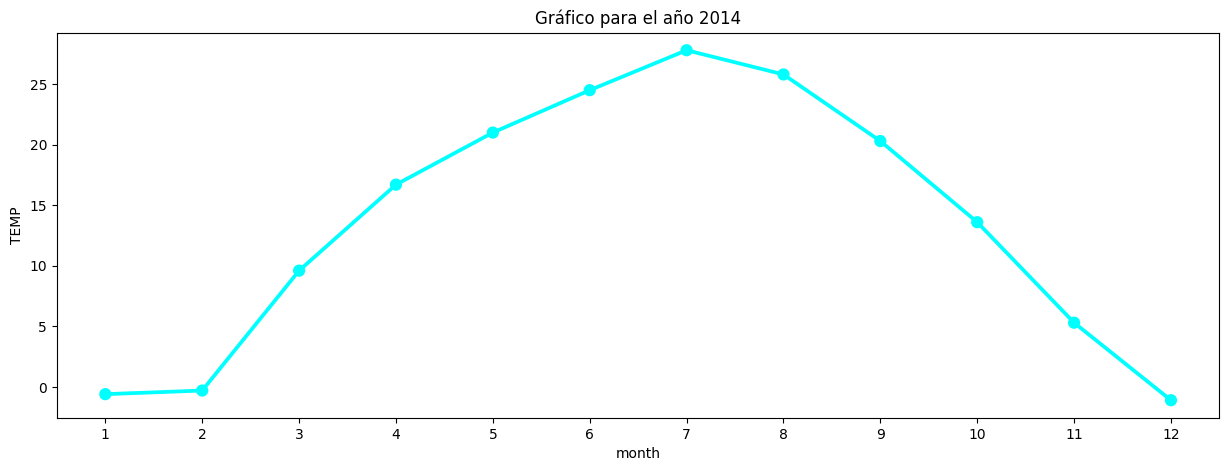

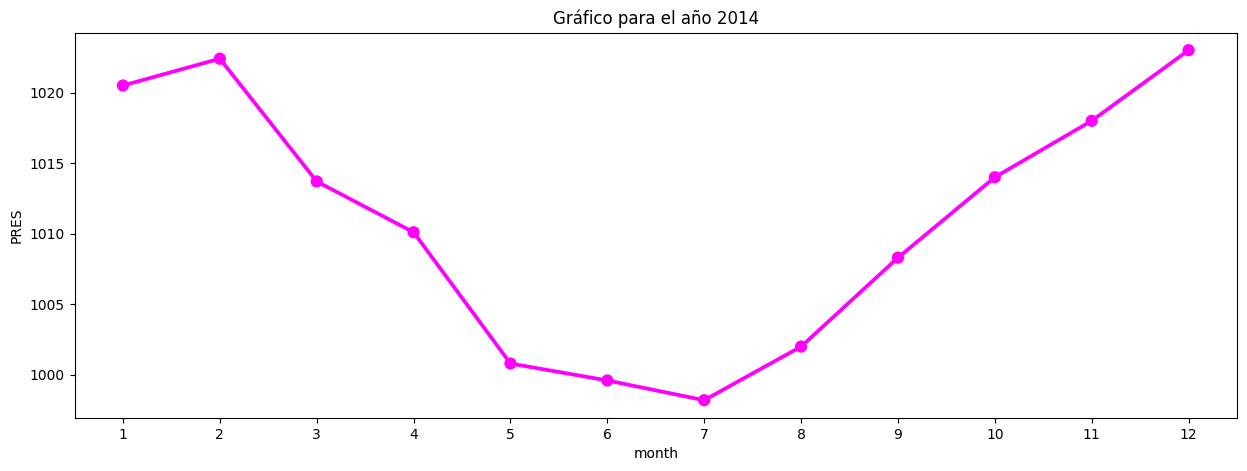

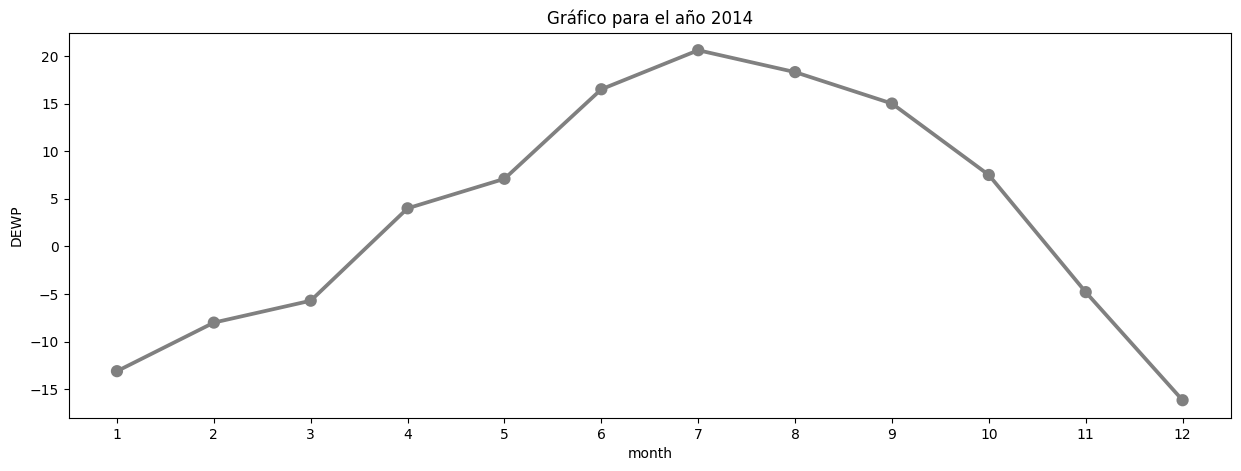

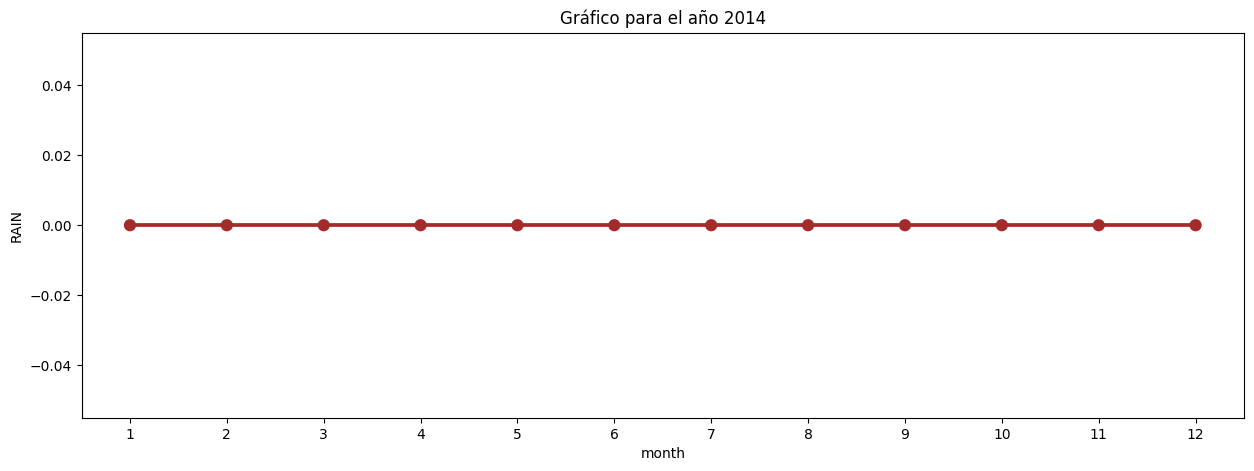

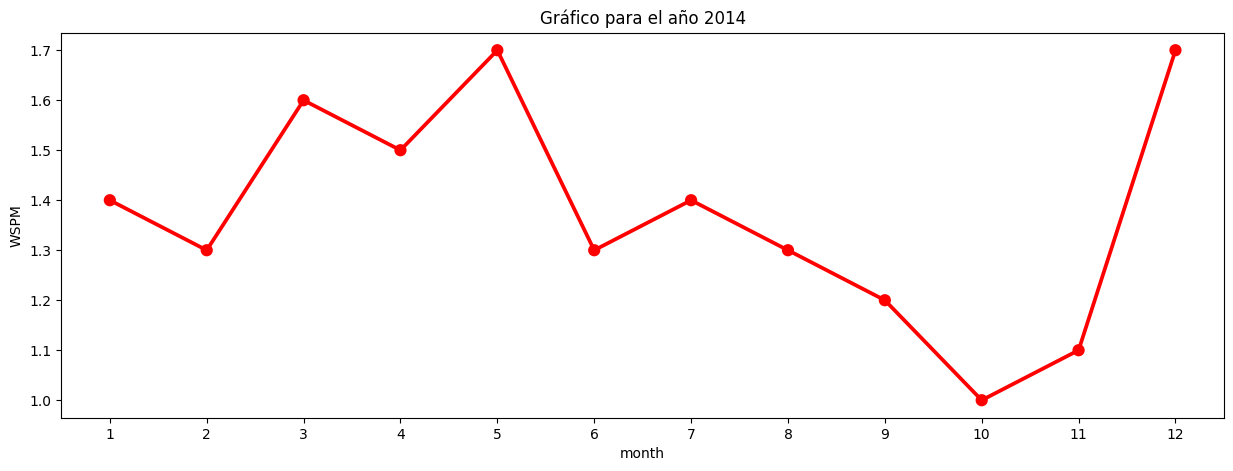

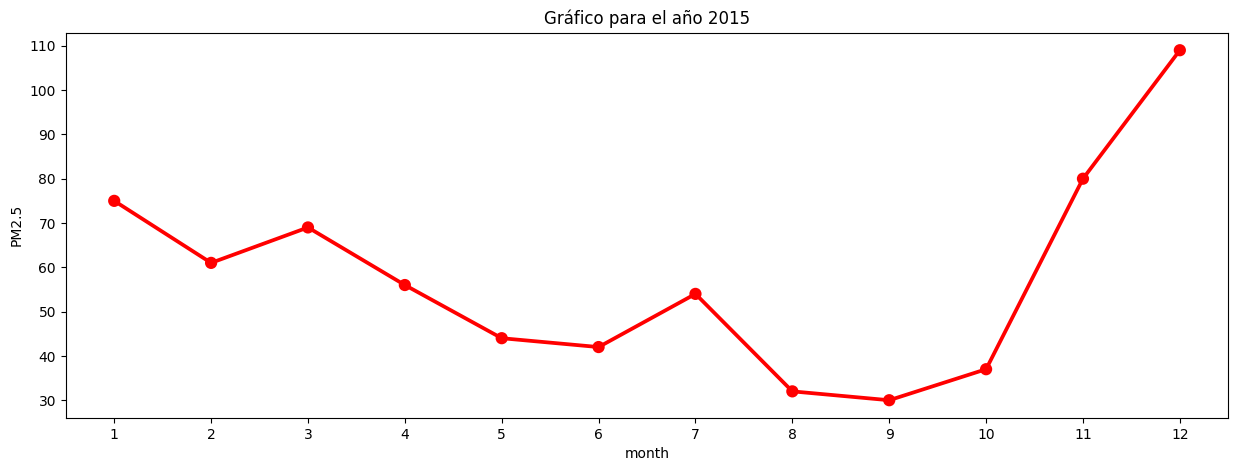

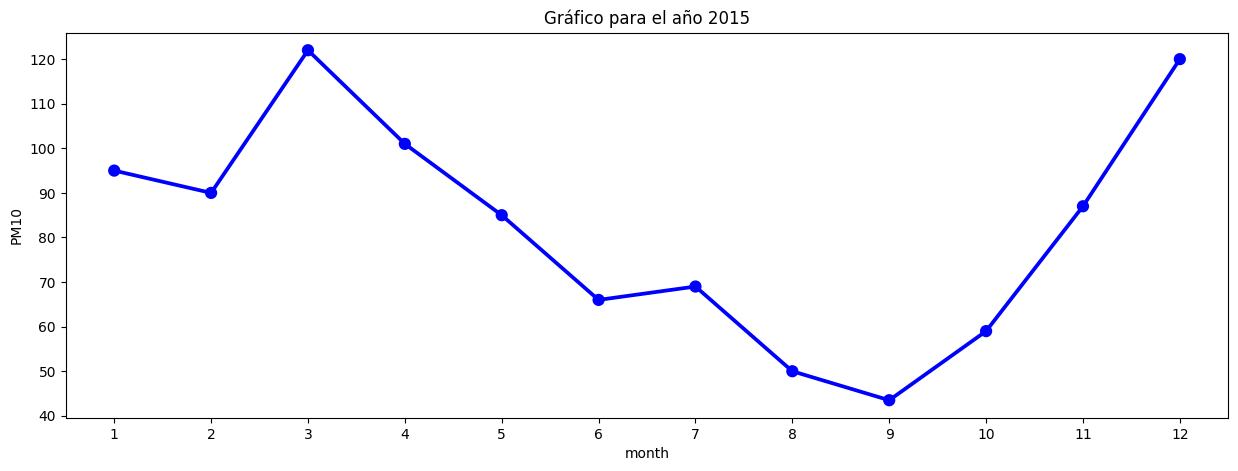

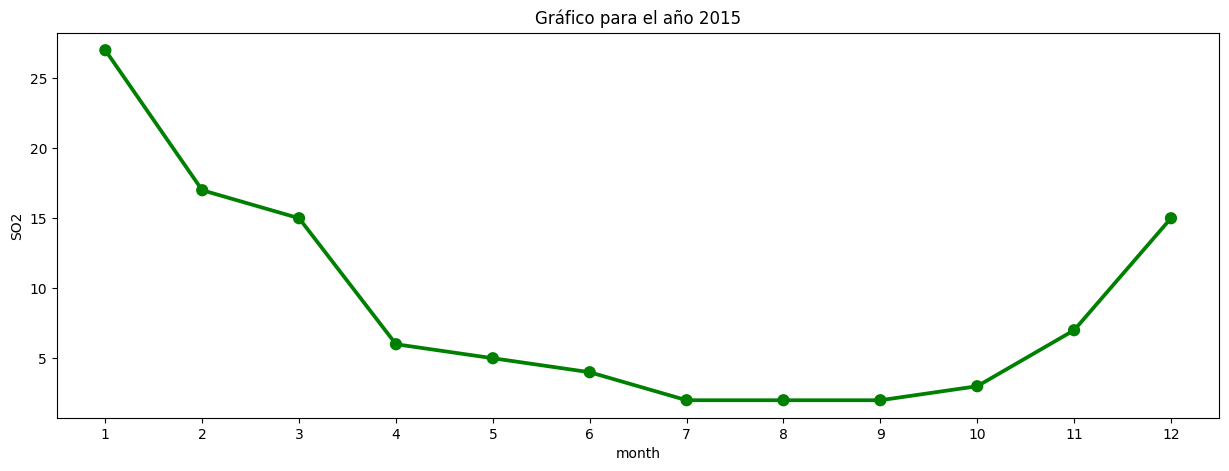

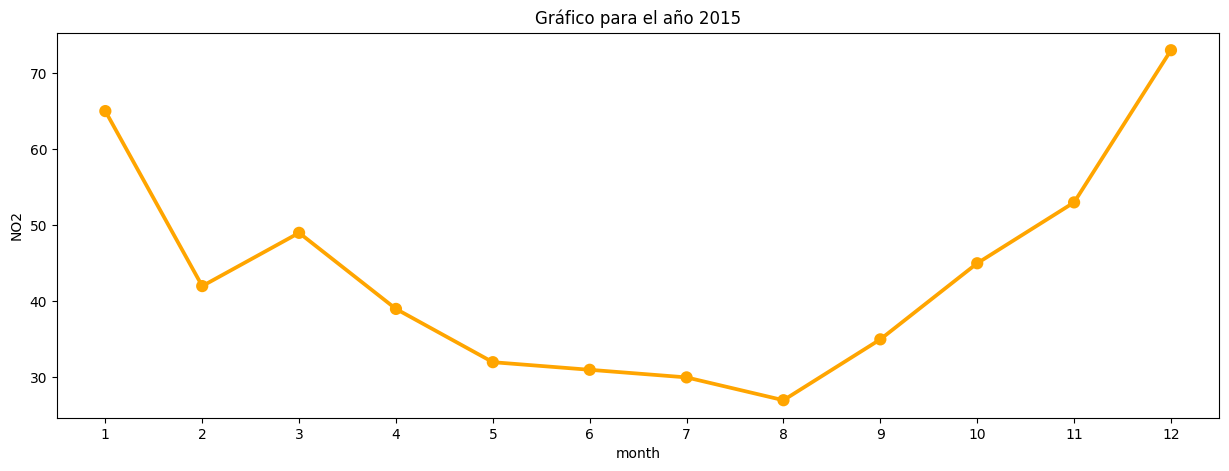

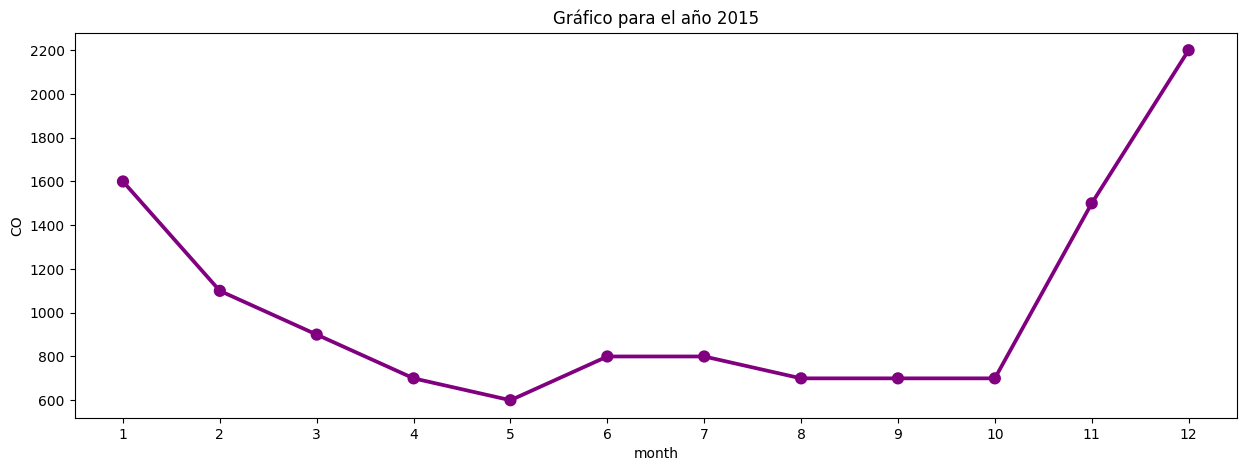

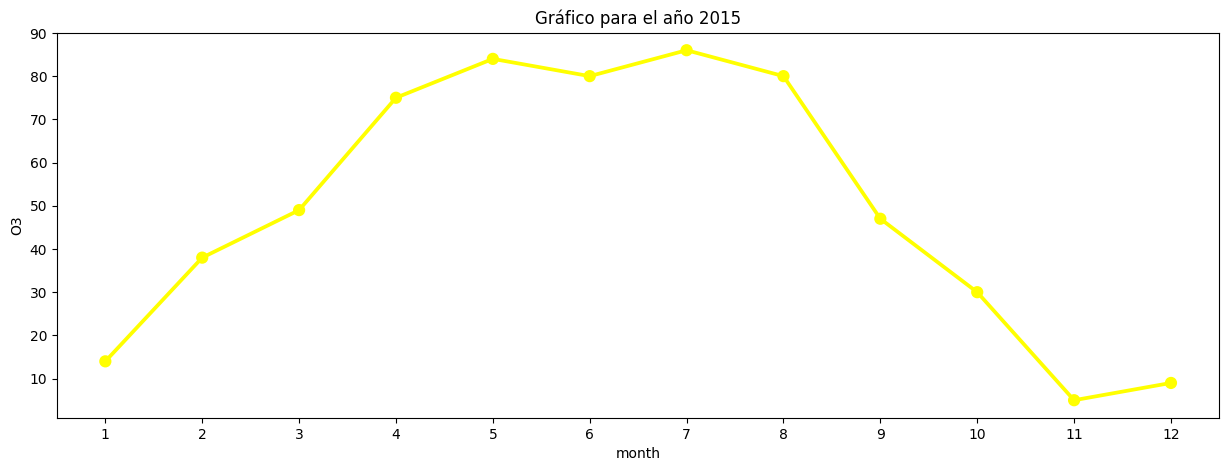

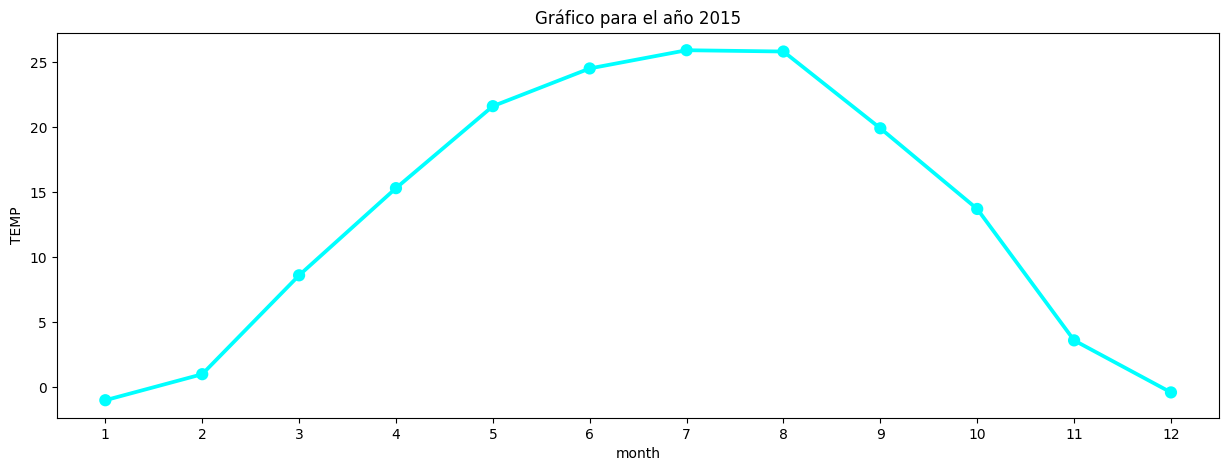

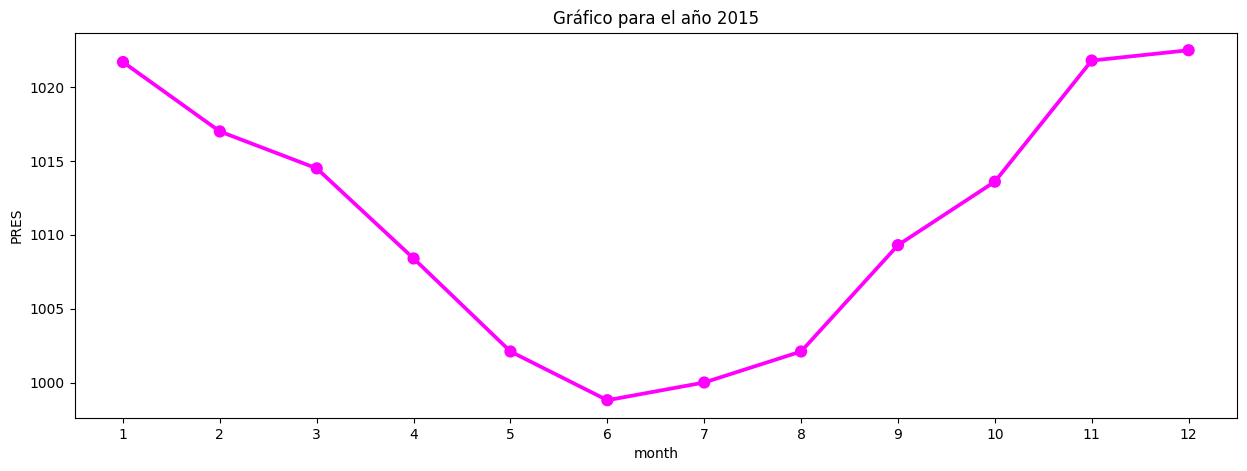

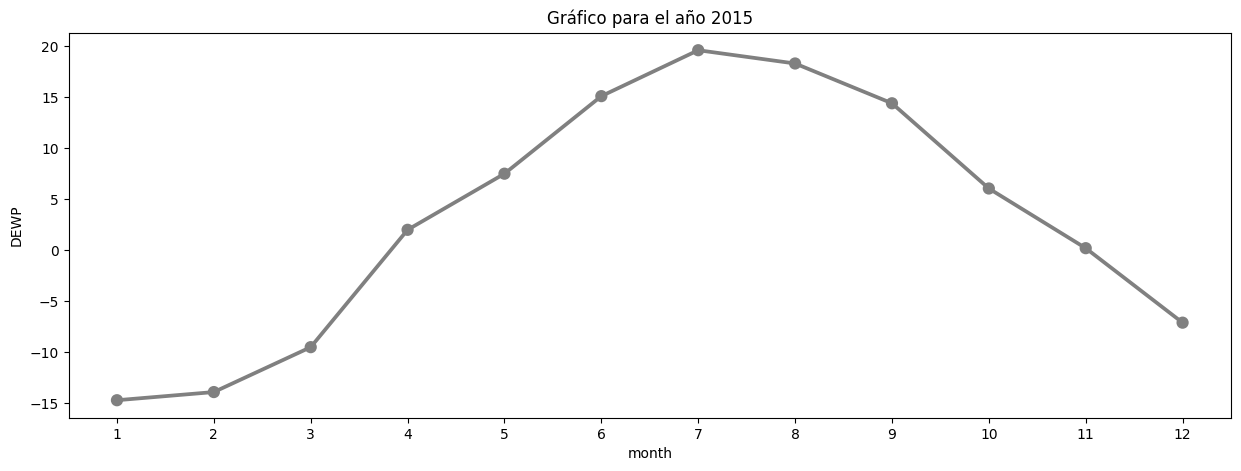

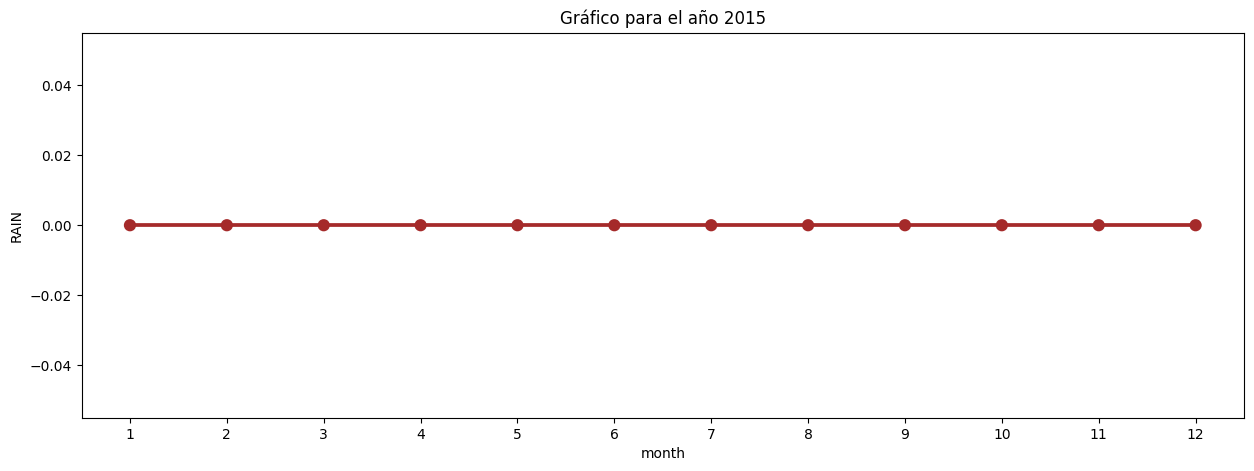

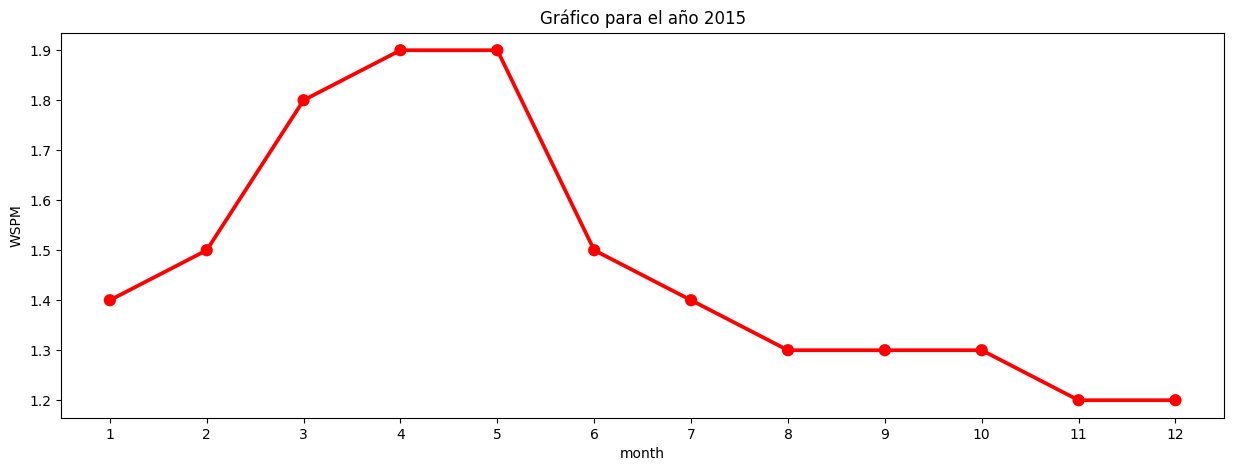

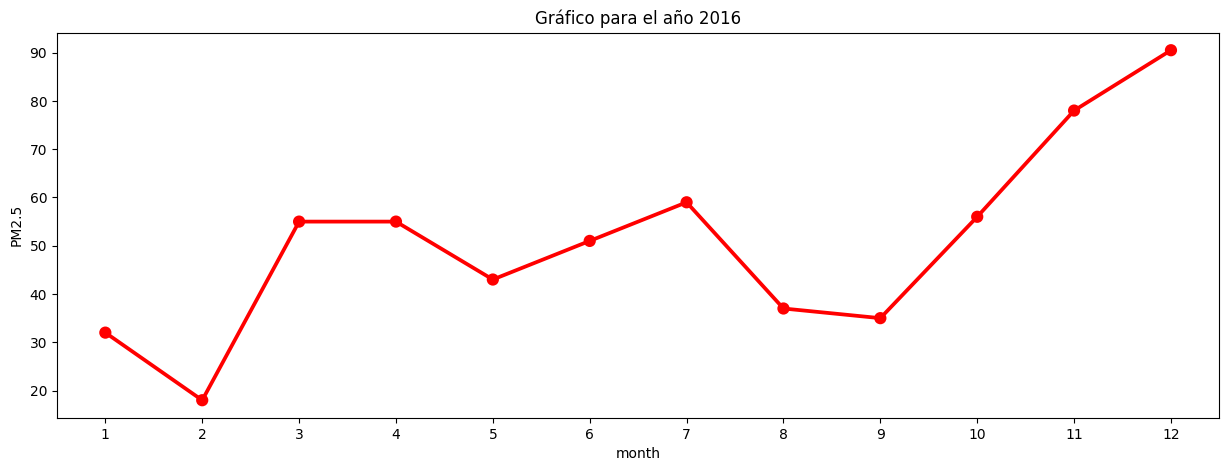

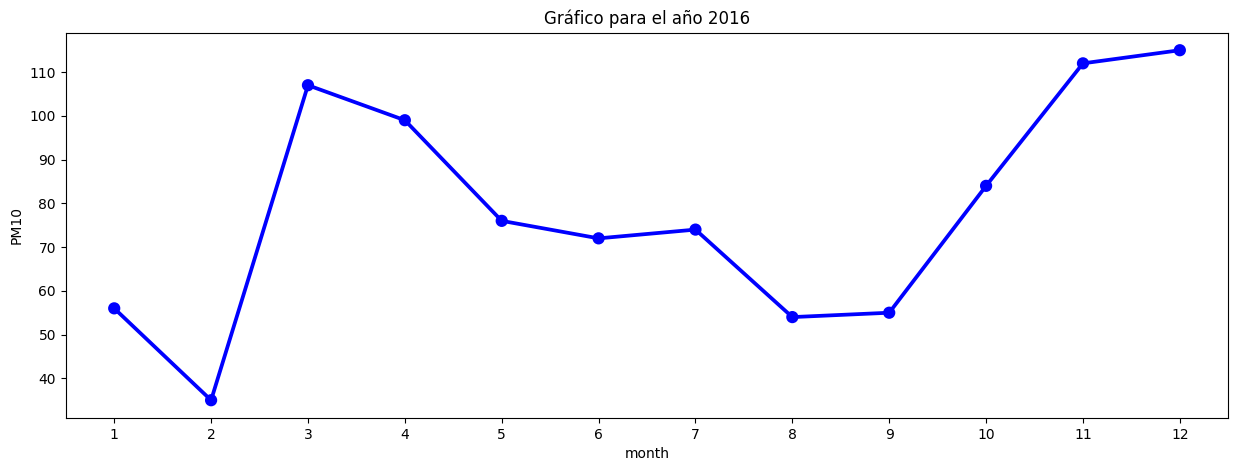

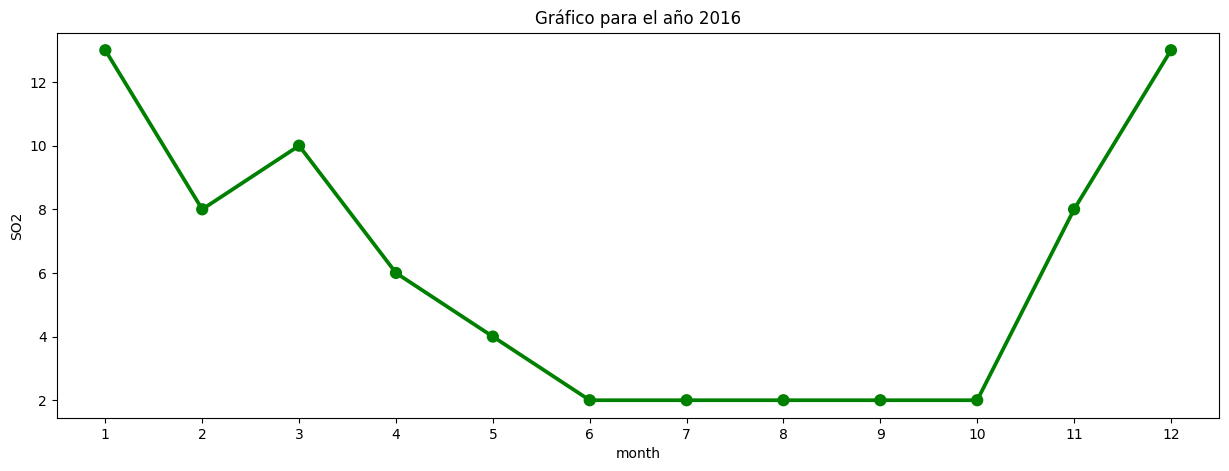

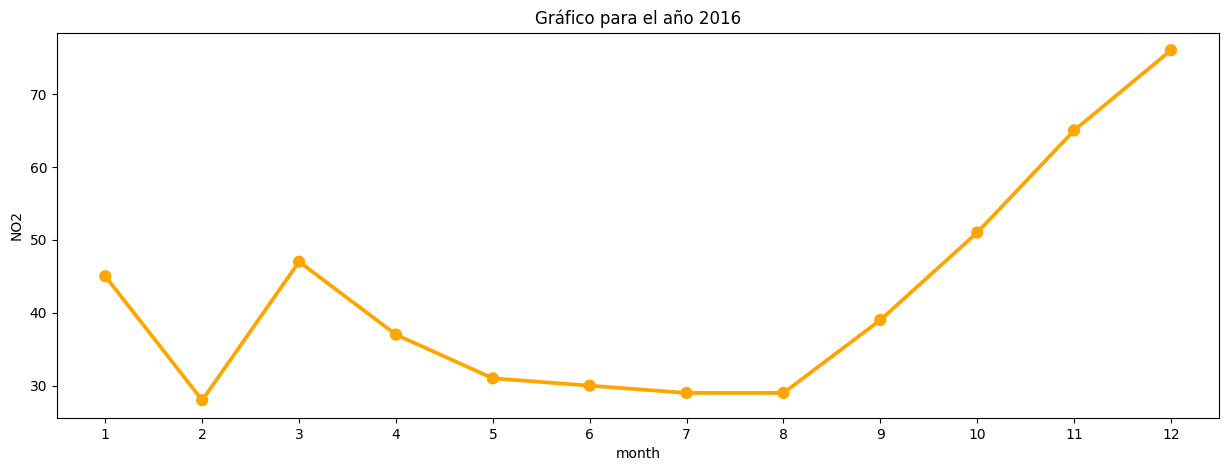

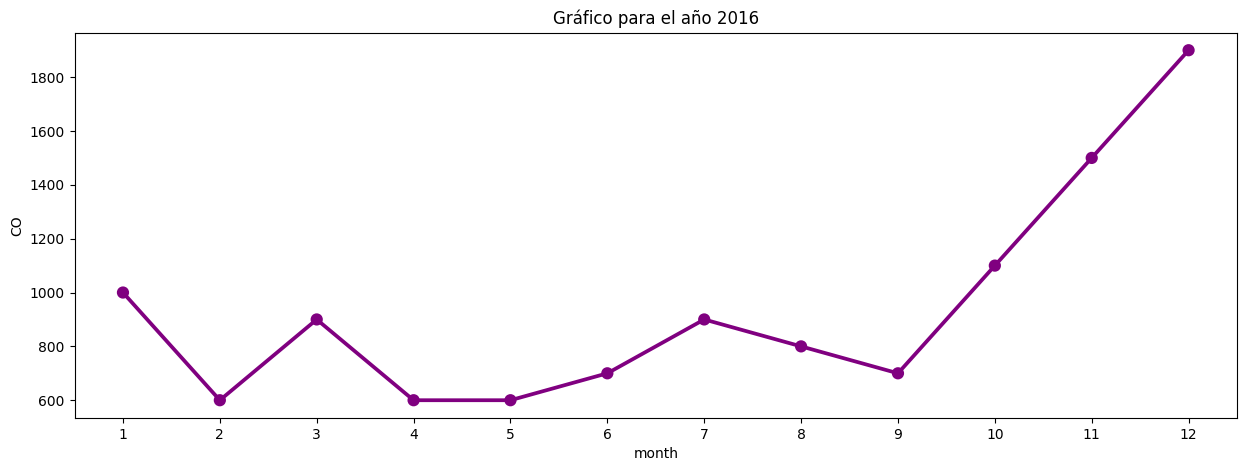

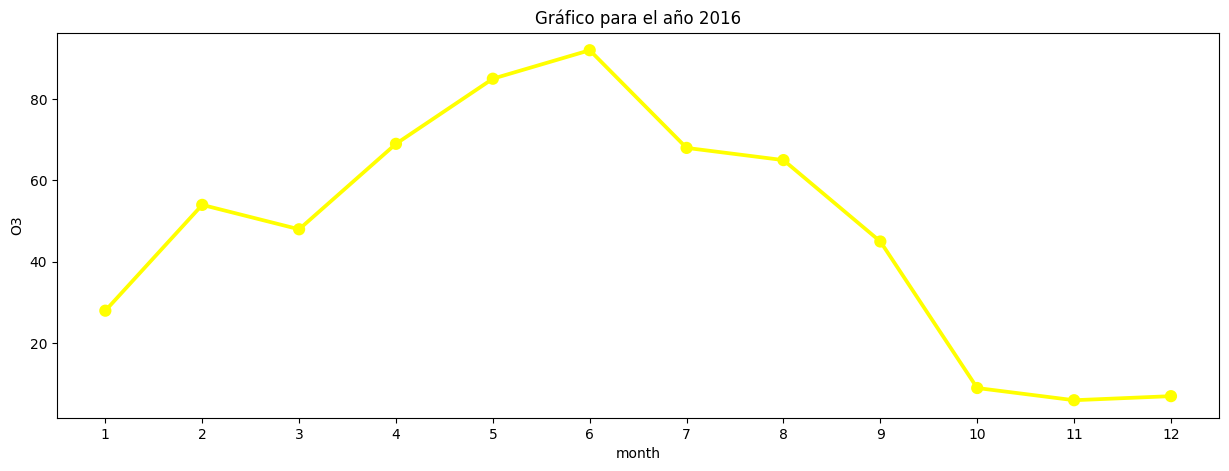

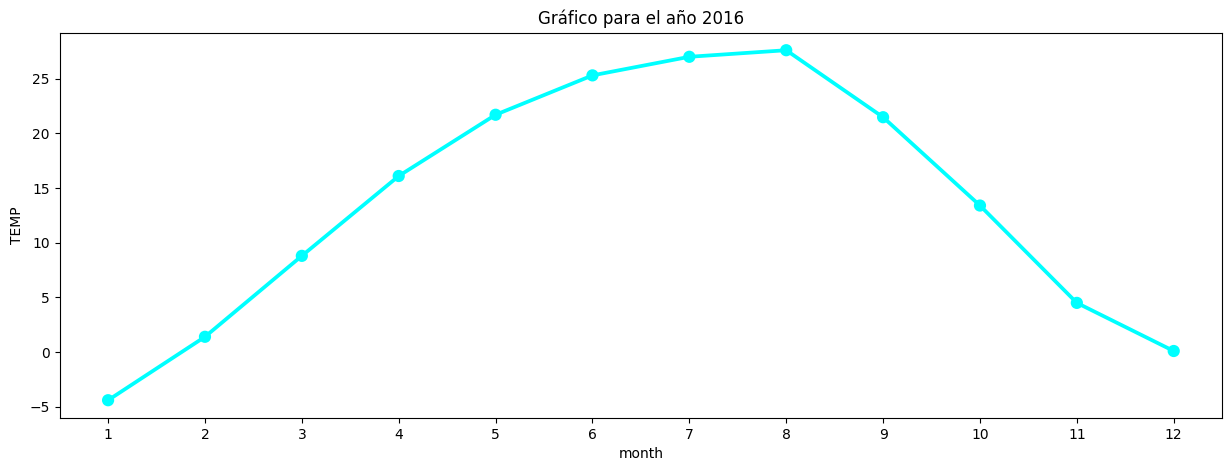

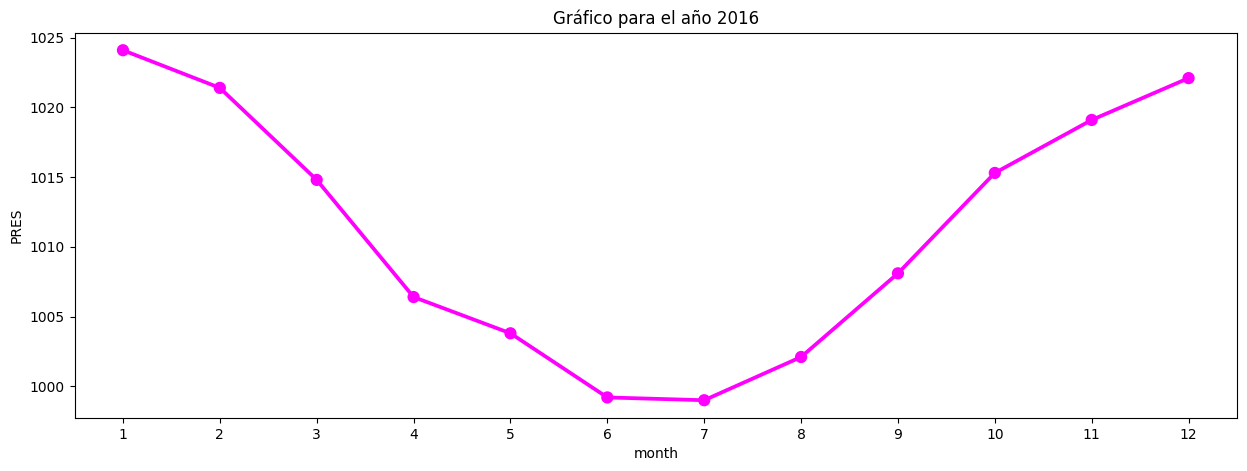

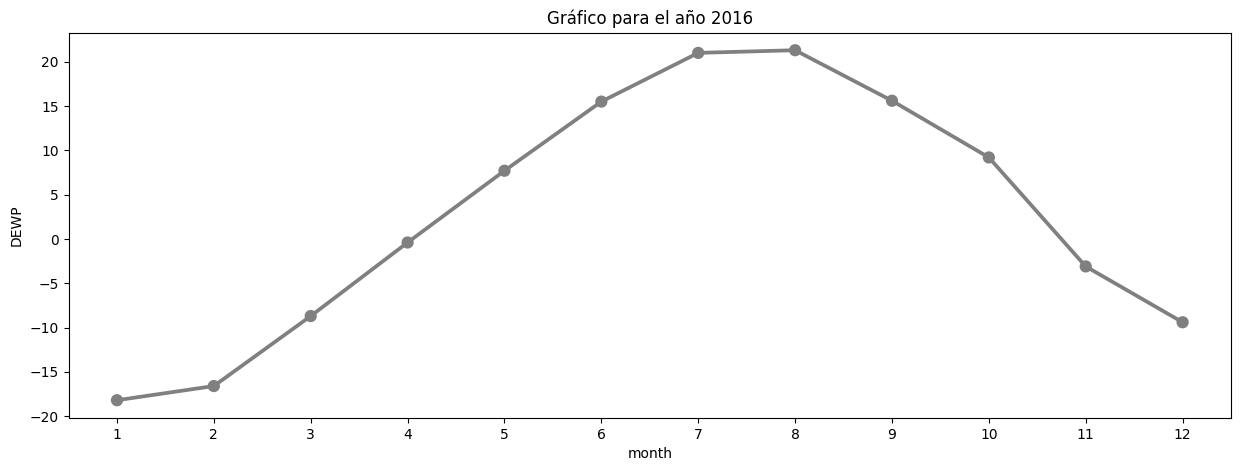

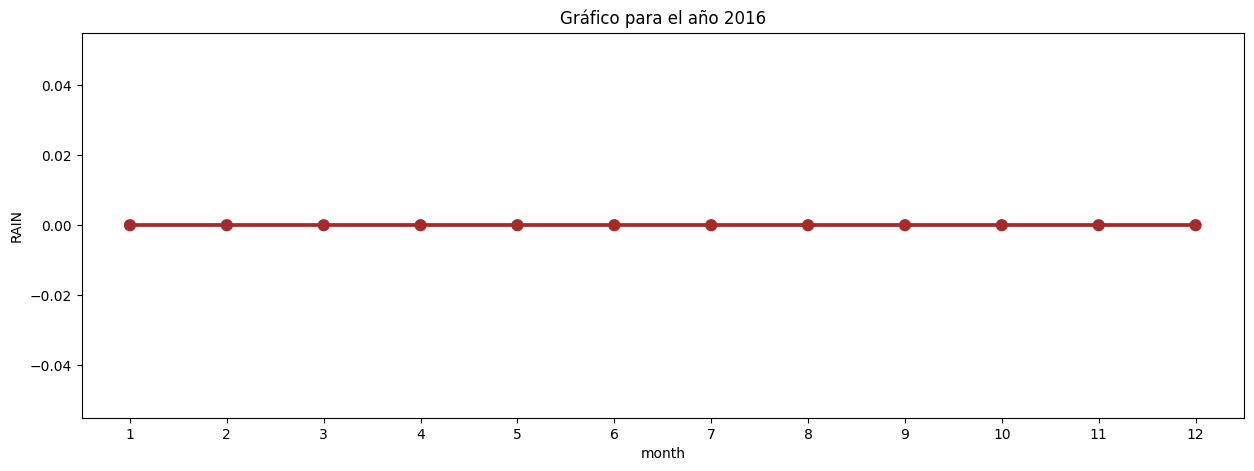

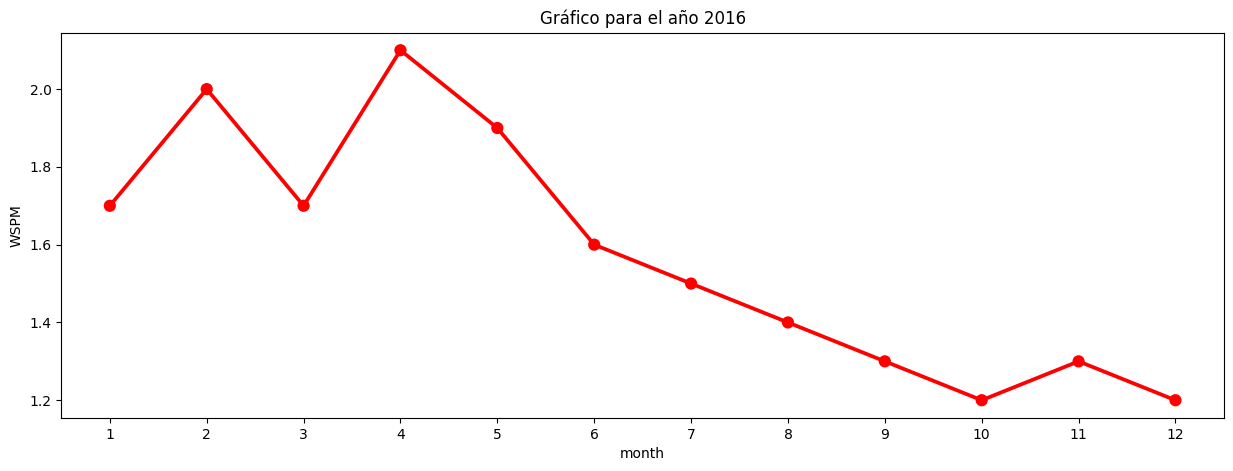

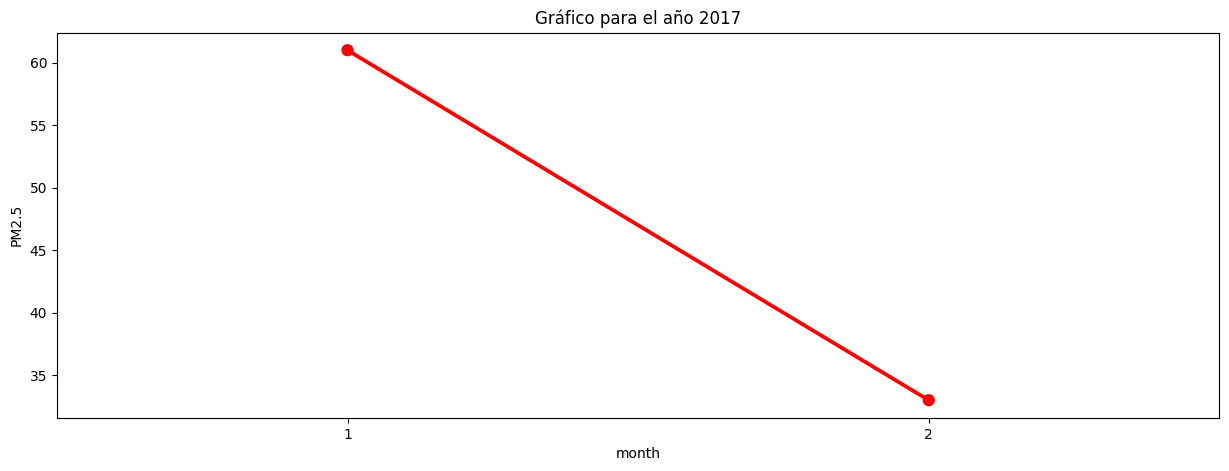

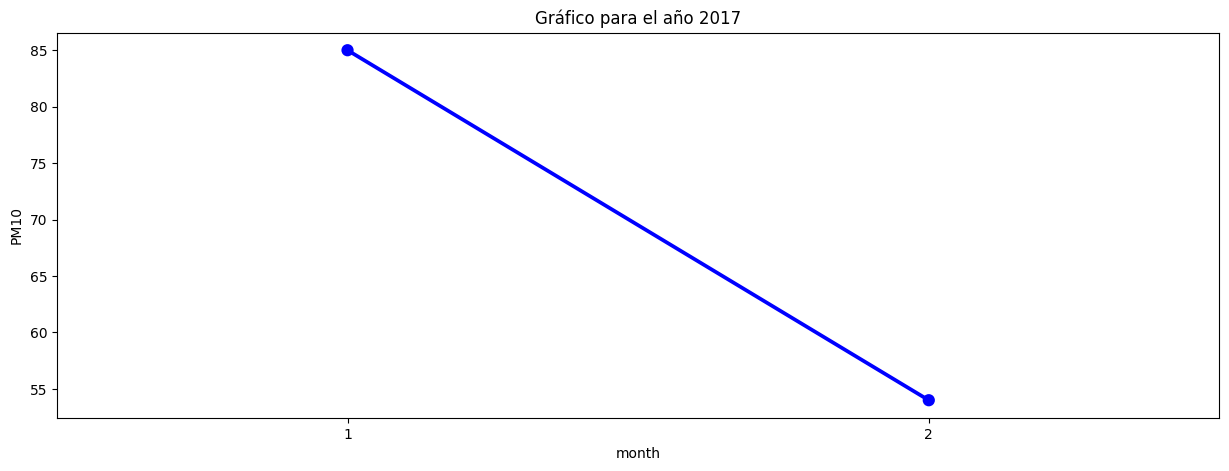

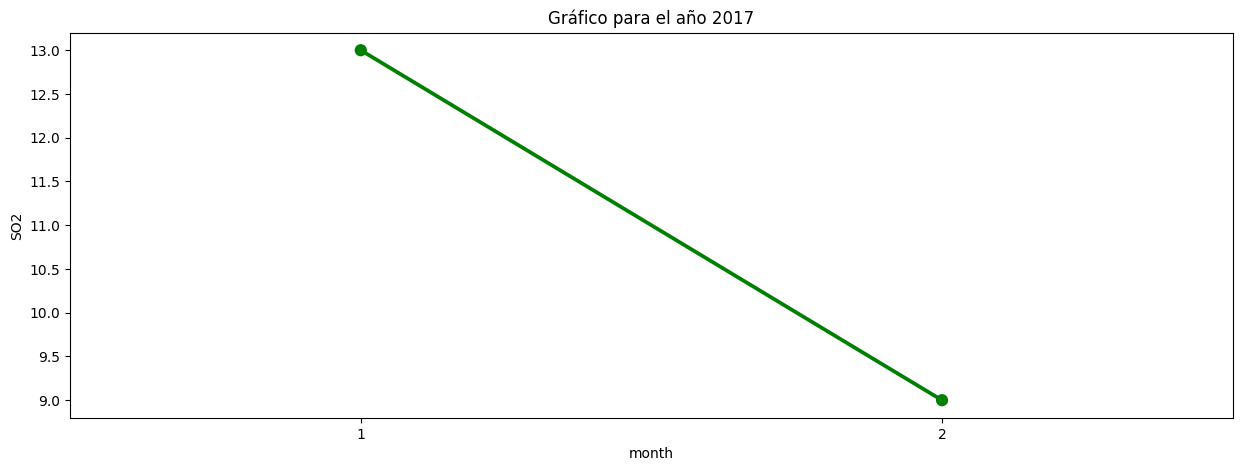

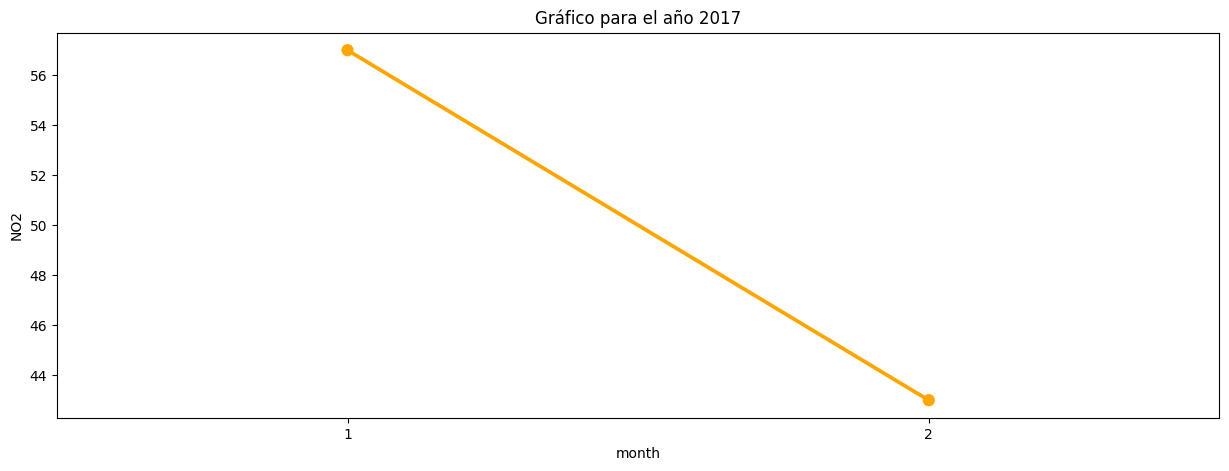

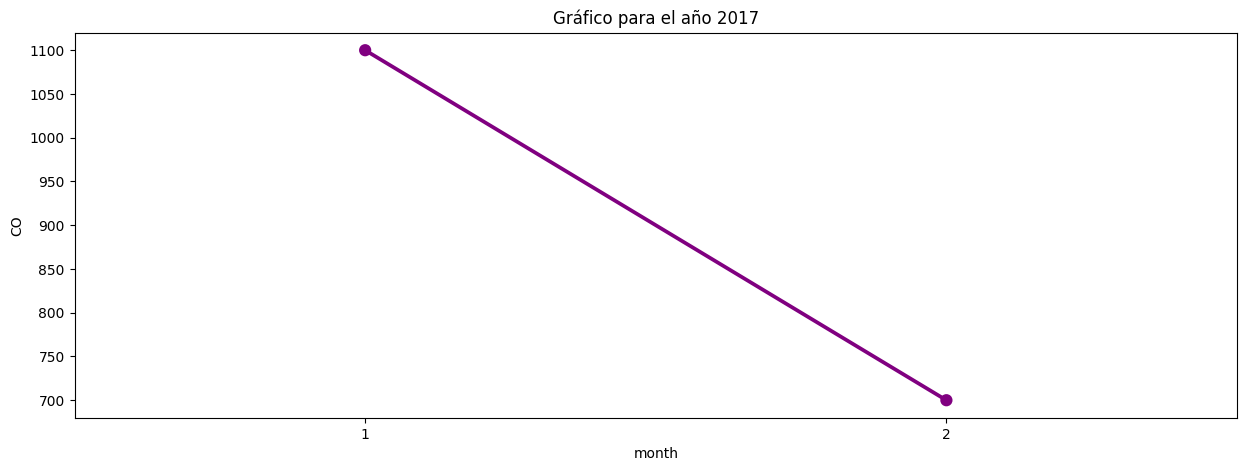

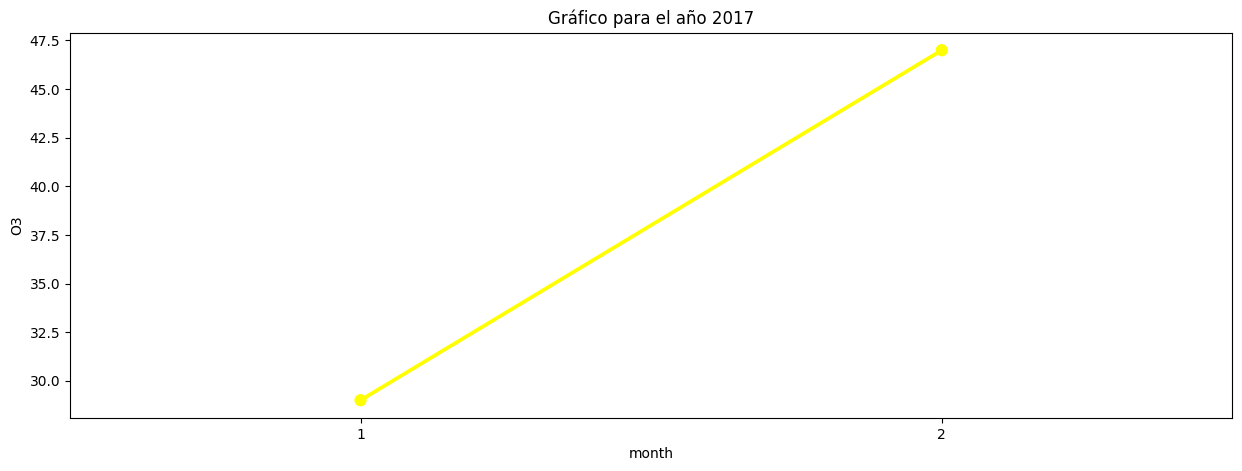

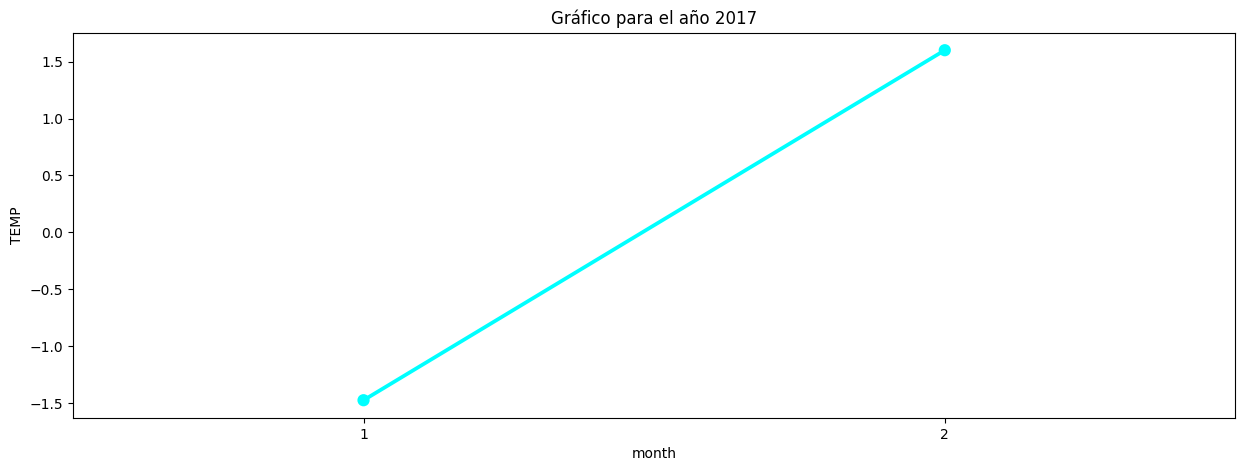

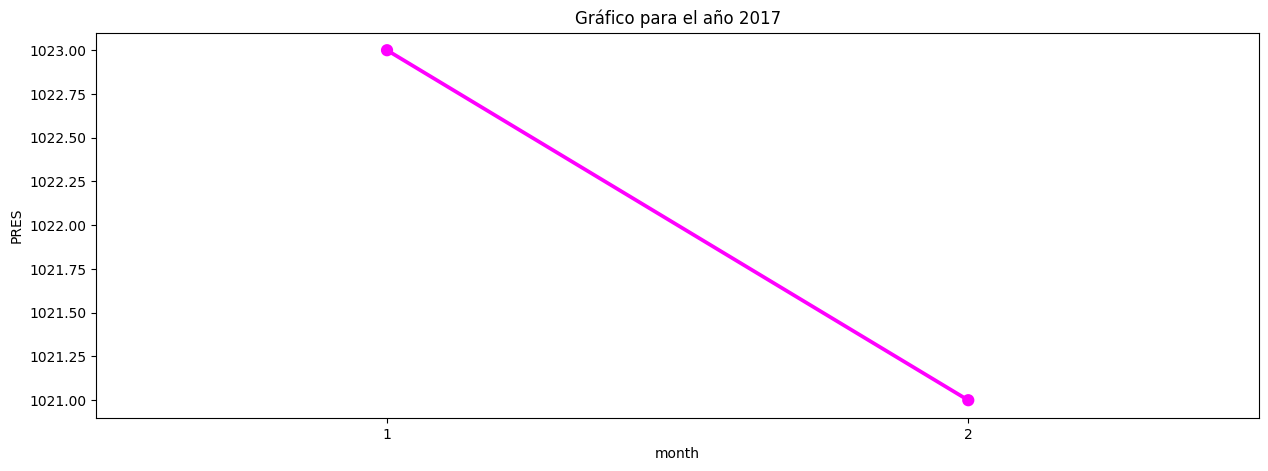

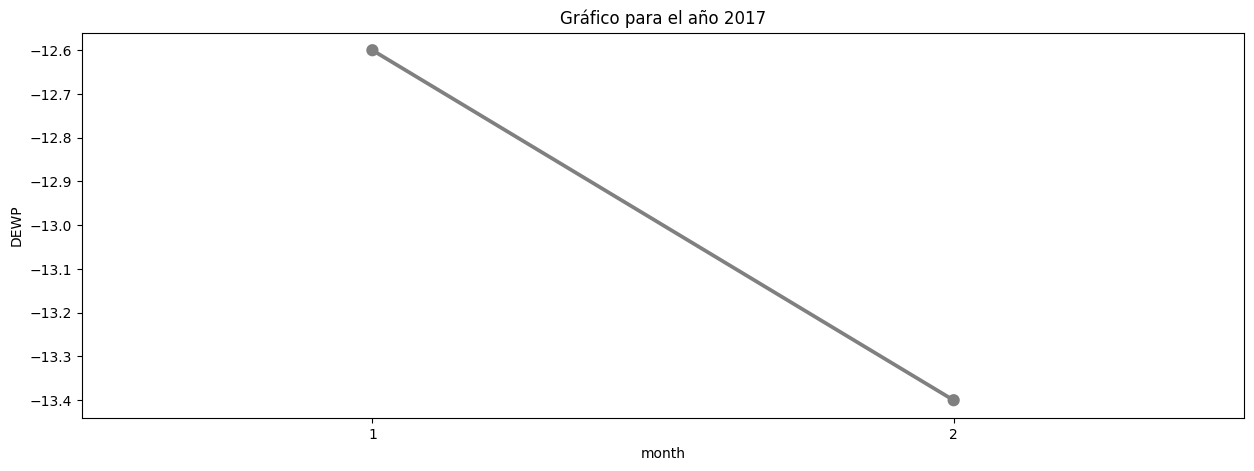

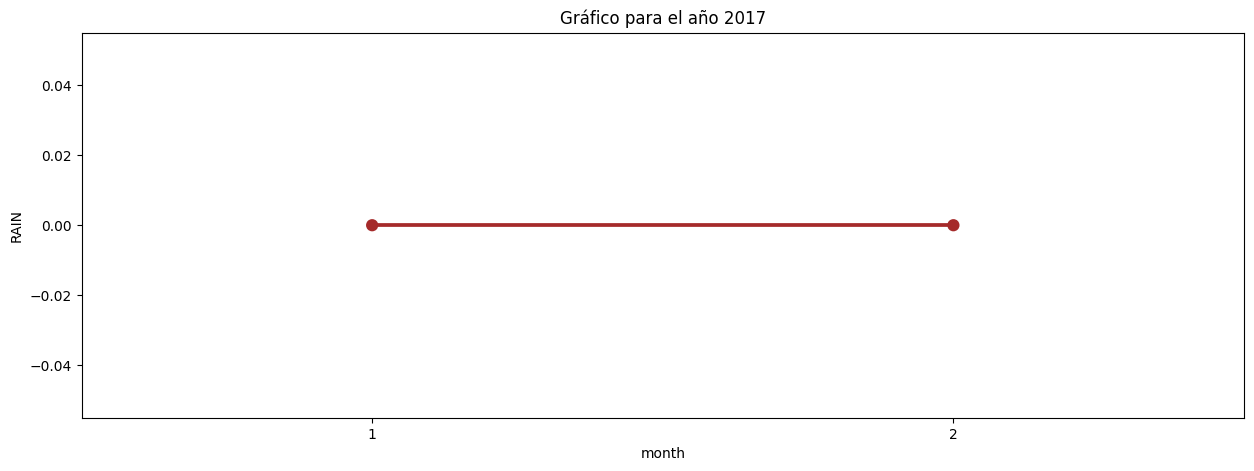

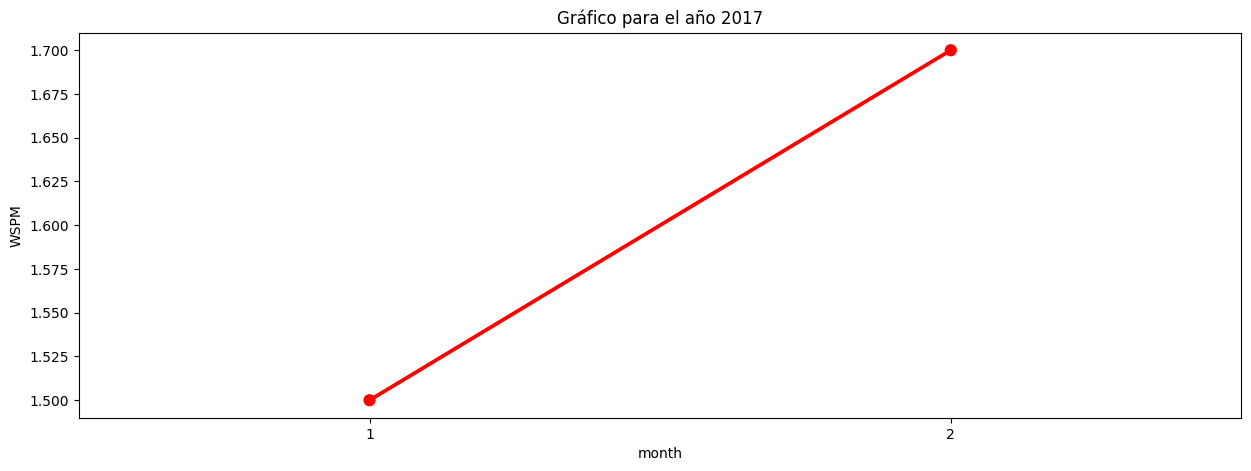

In [43]:
for year in years:
    df_year = df[df['year']==year]
    for i, colum in enumerate(columns_all):
        df_aux = df_year[[colum,'month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
        f,ax=plt.subplots(figsize=(15,5))
        sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])
        plt.title(f'Gráfico para el año {year}')

# Graficas Juntas

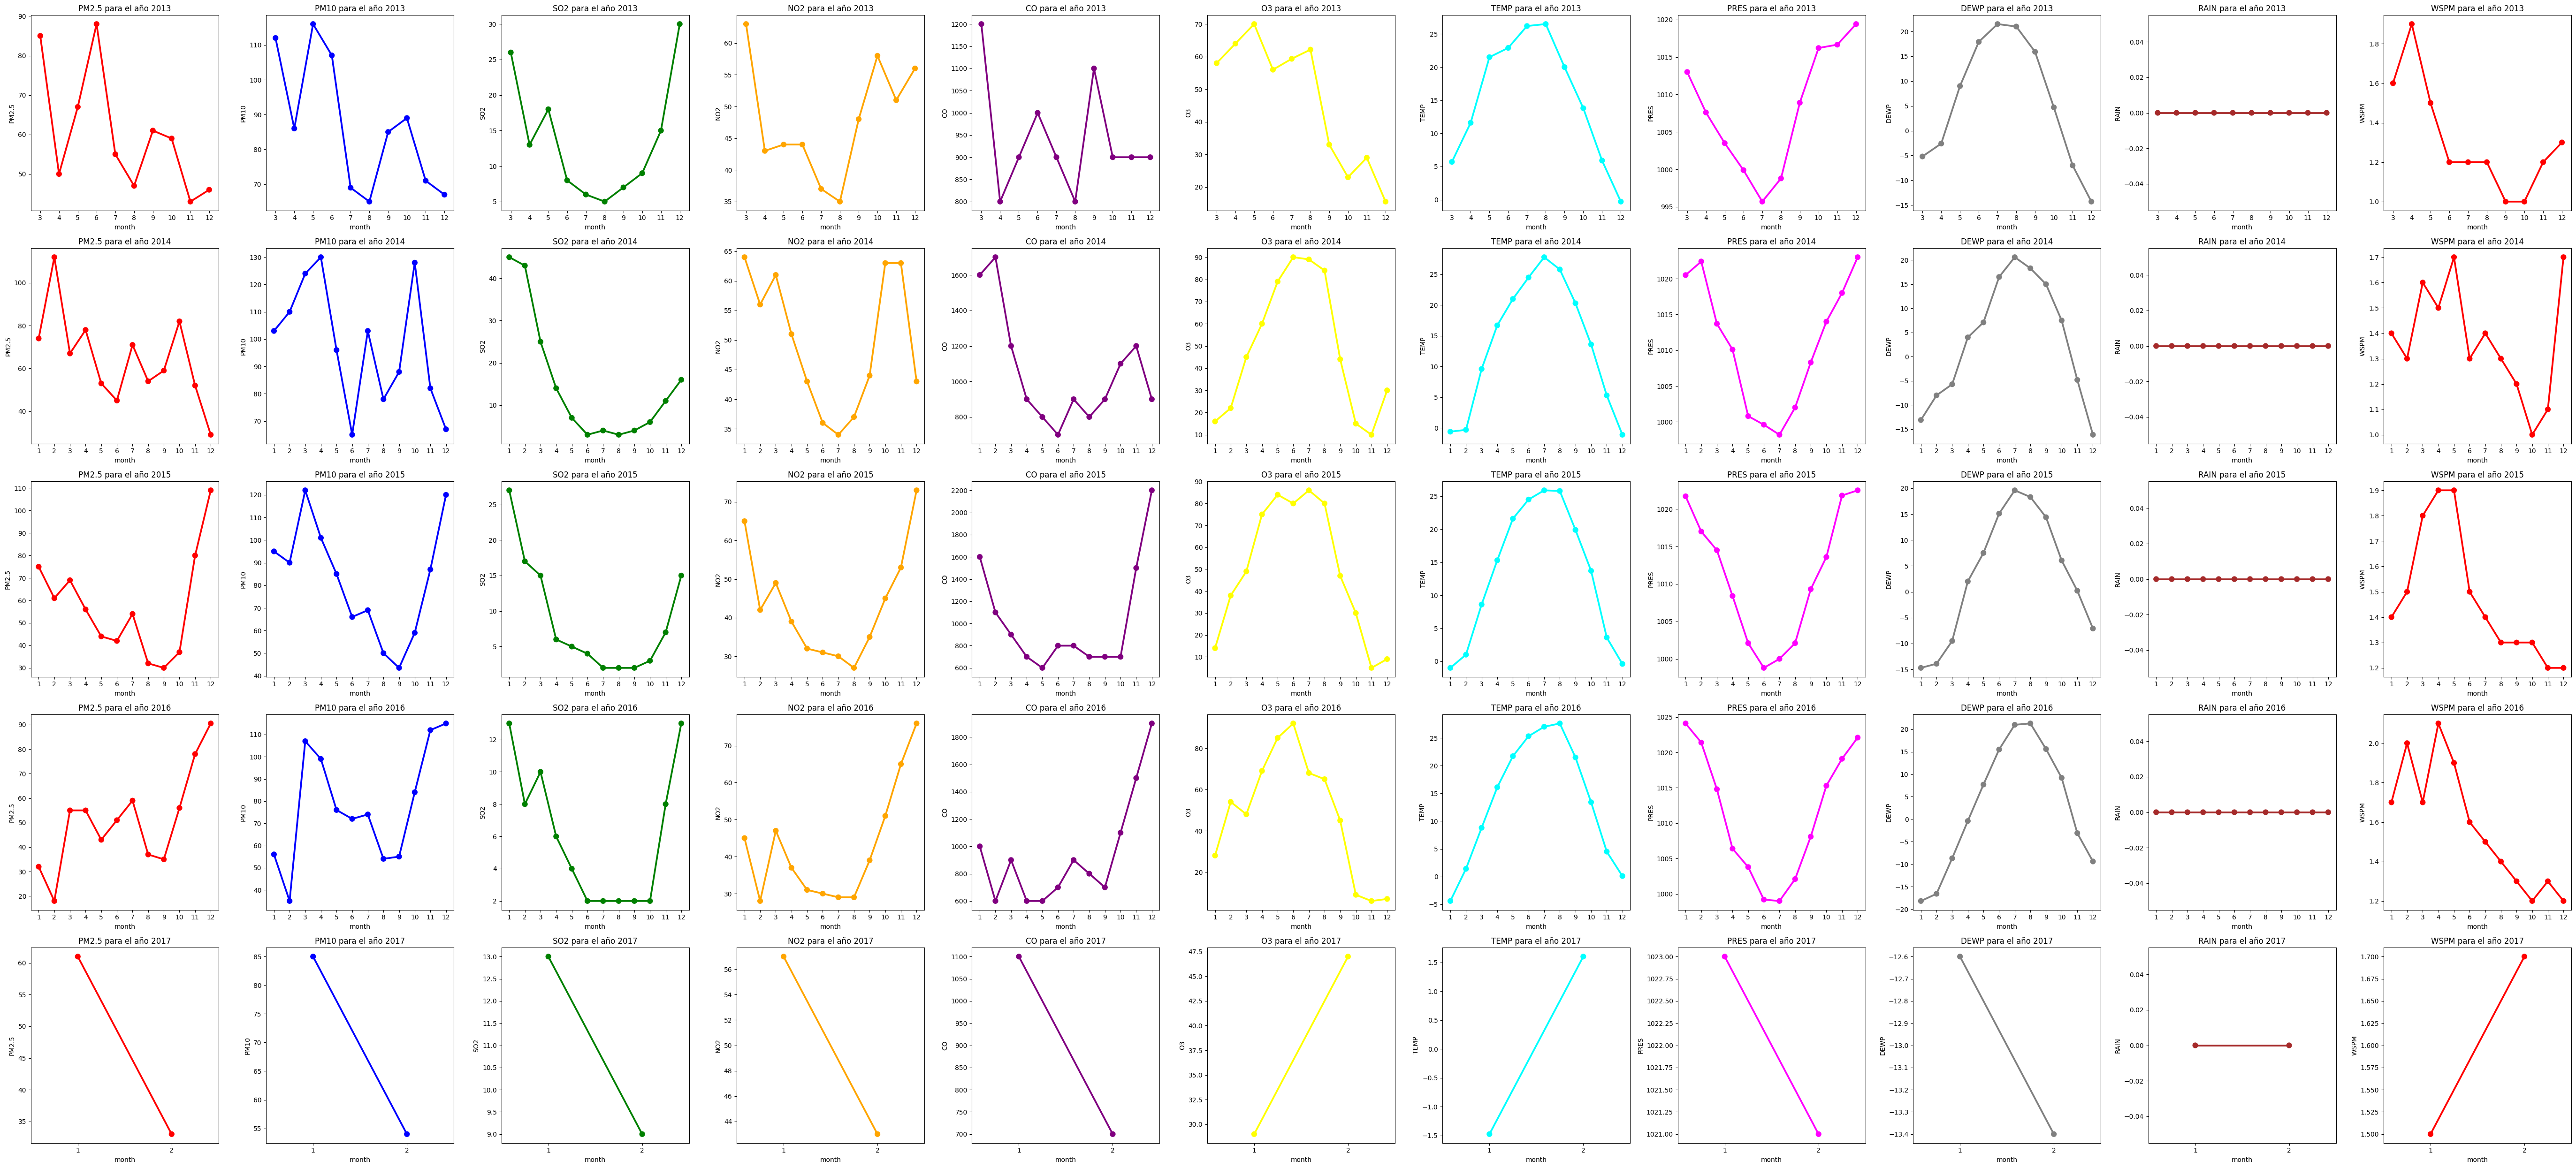

In [44]:
num_plots = len(columns_all)

fig, axes = plt.subplots(len(years), num_plots, figsize=(5*num_plots, 5*len(years)))

for i, year in enumerate(years):
    df_year = df[df['year'] == year]
    for j, colum in enumerate(columns_all):
        df_aux = df_year[[colum, 'month']].groupby(["month"]).median().reset_index().sort_values(by='month', ascending=False)
        ax = axes[i, j]
        sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[j % len(colors)], ax=ax)
        ax.set_title(f'{colum} para el año {year}')

plt.tight_layout()
plt.show()


# Analisis 2017 por Hora

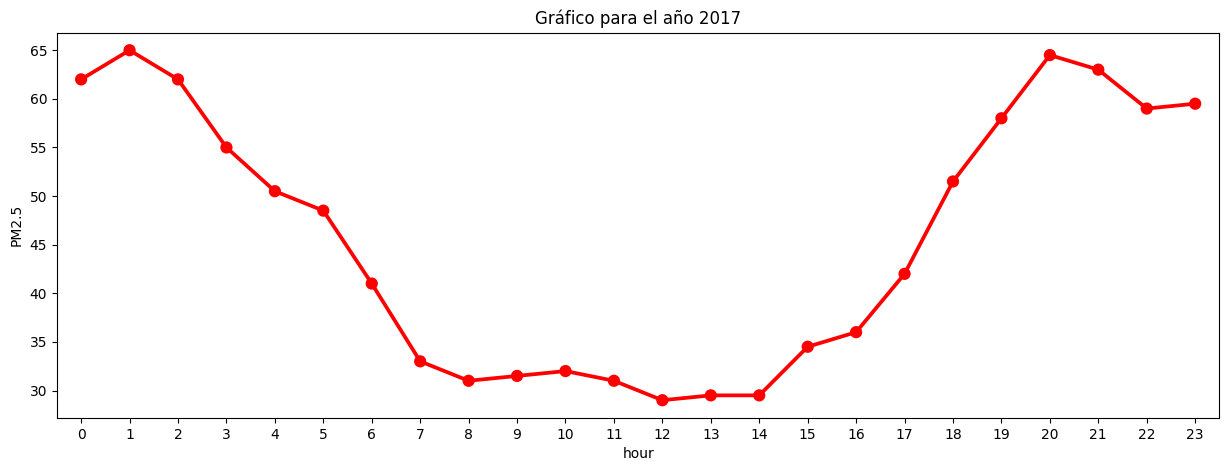

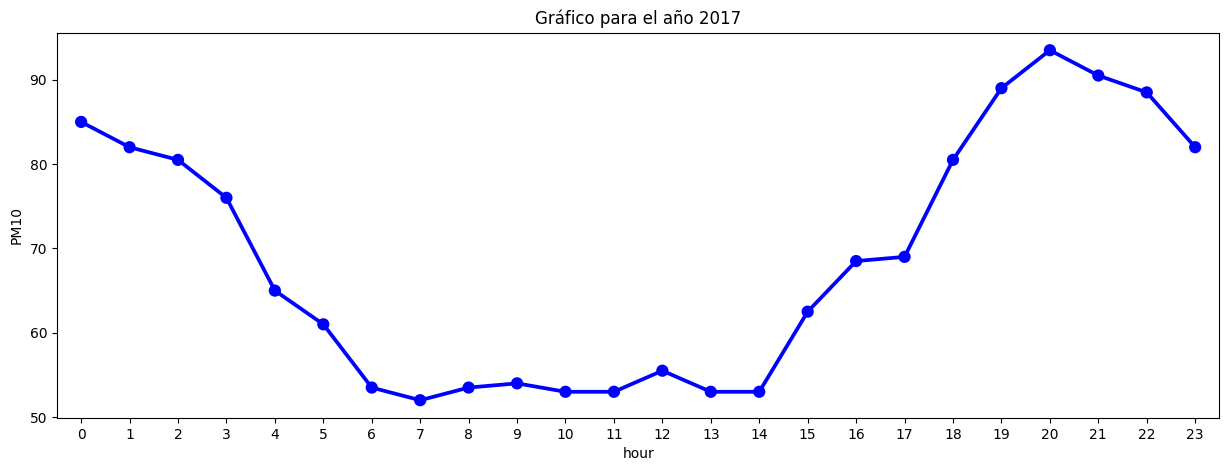

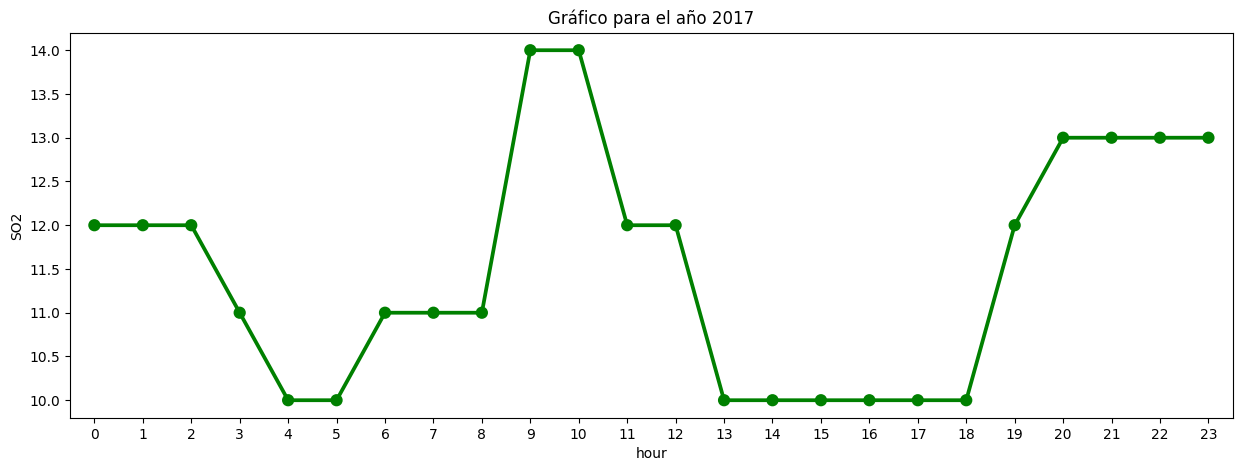

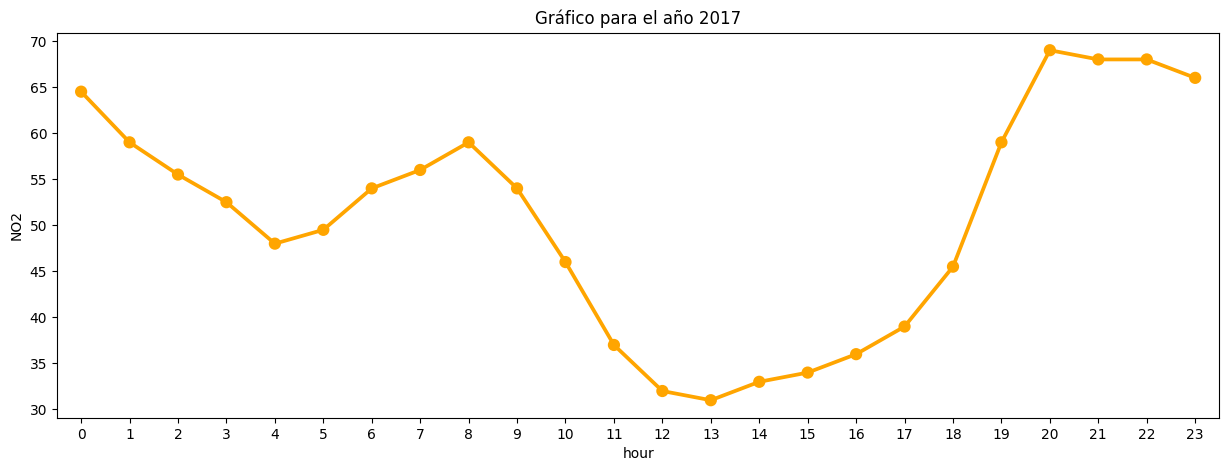

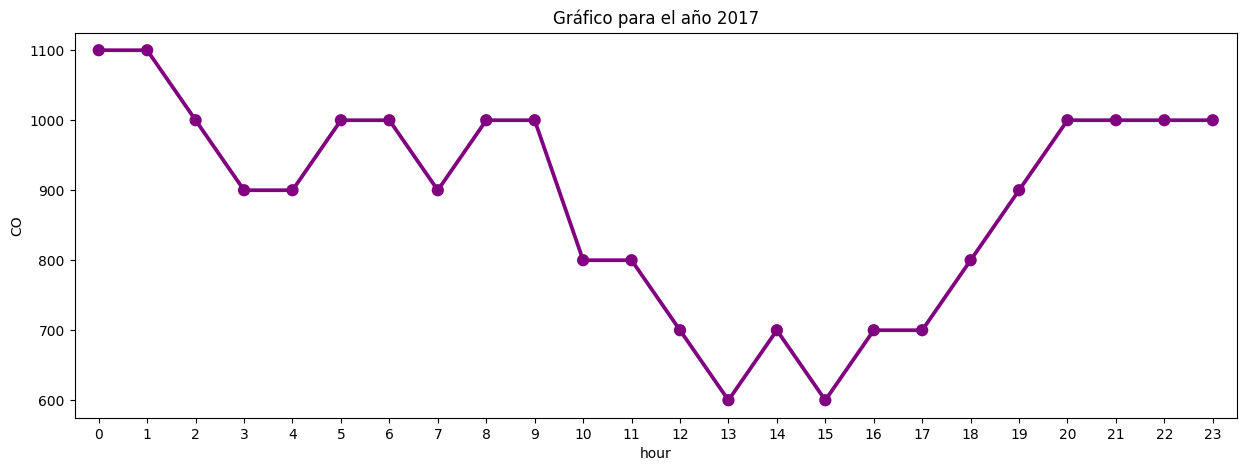

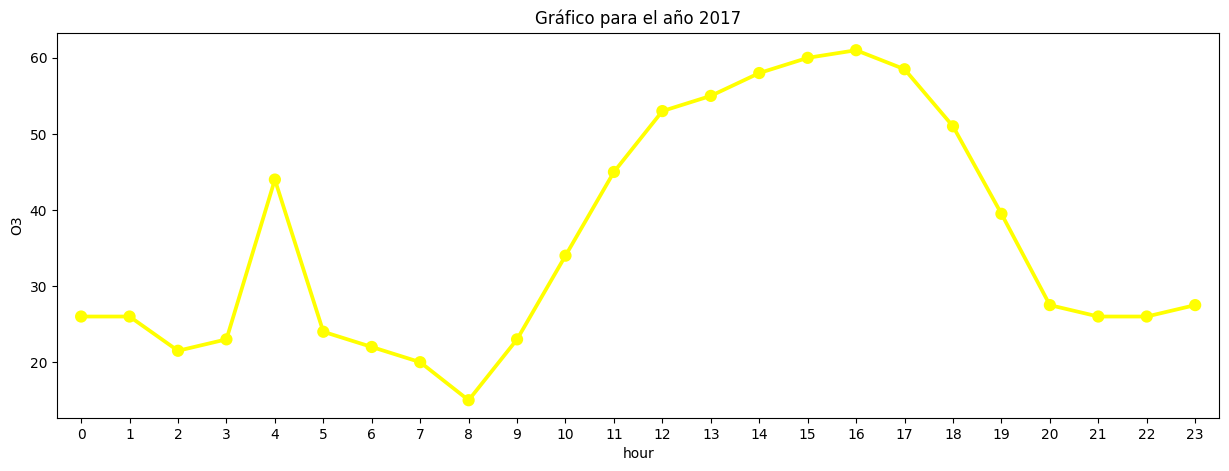

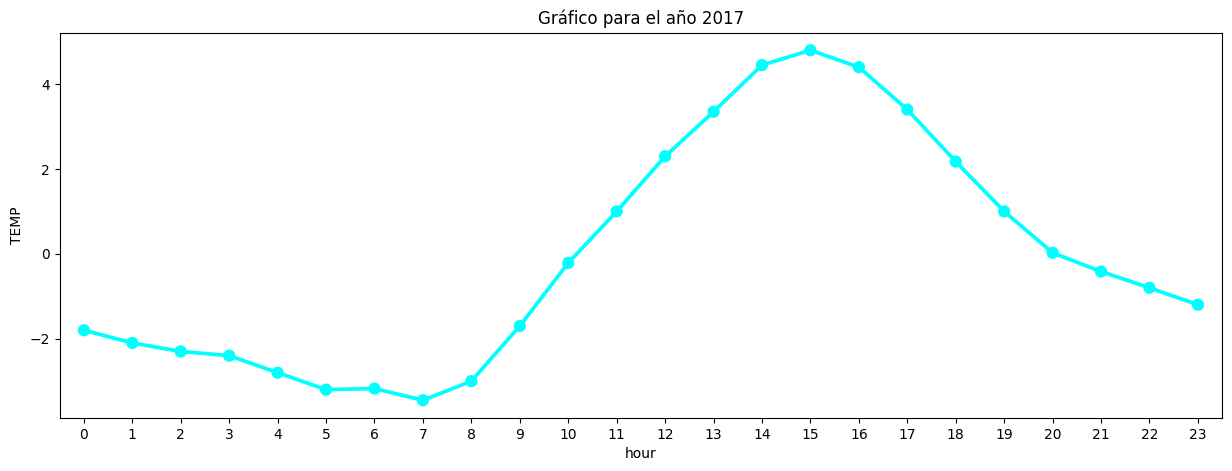

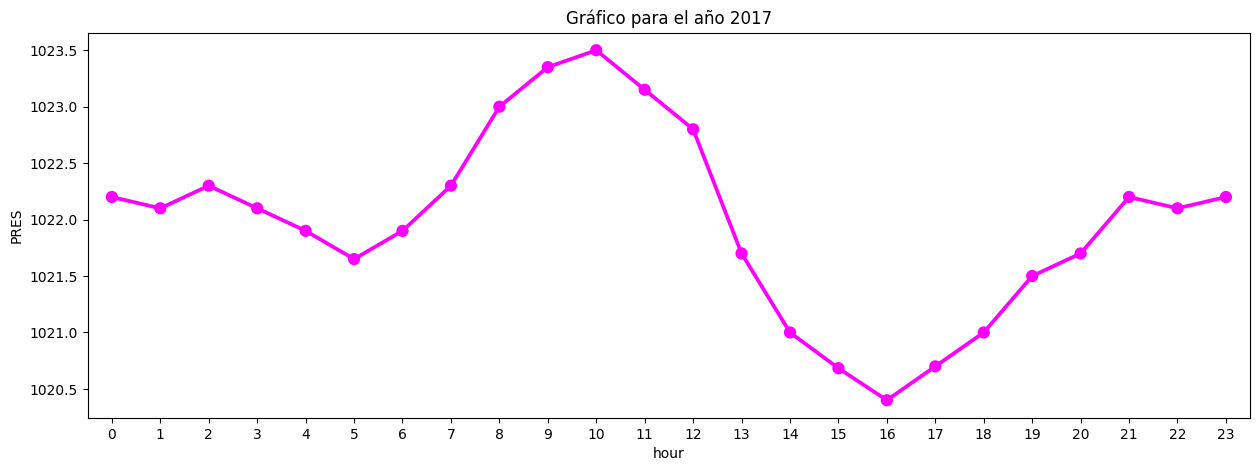

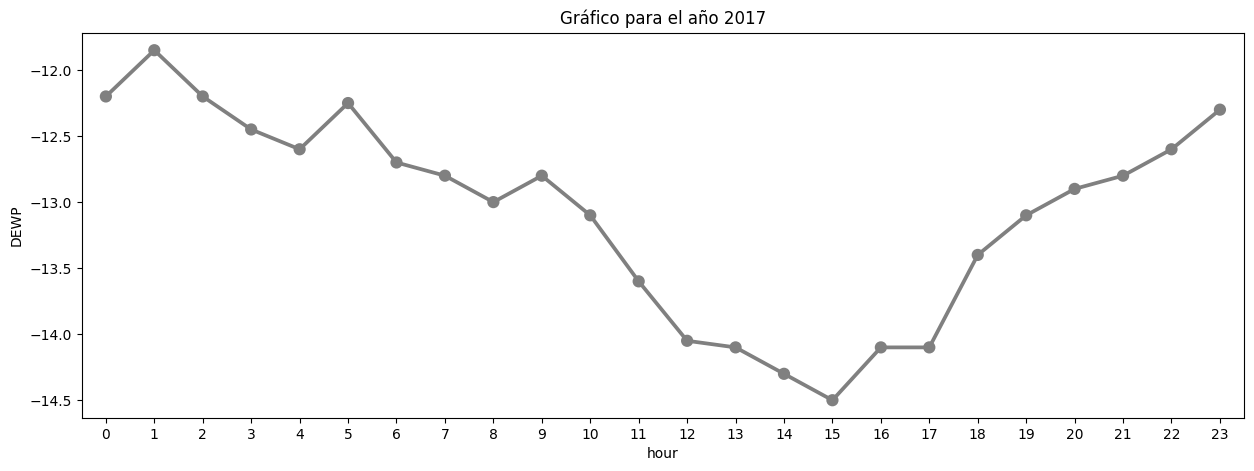

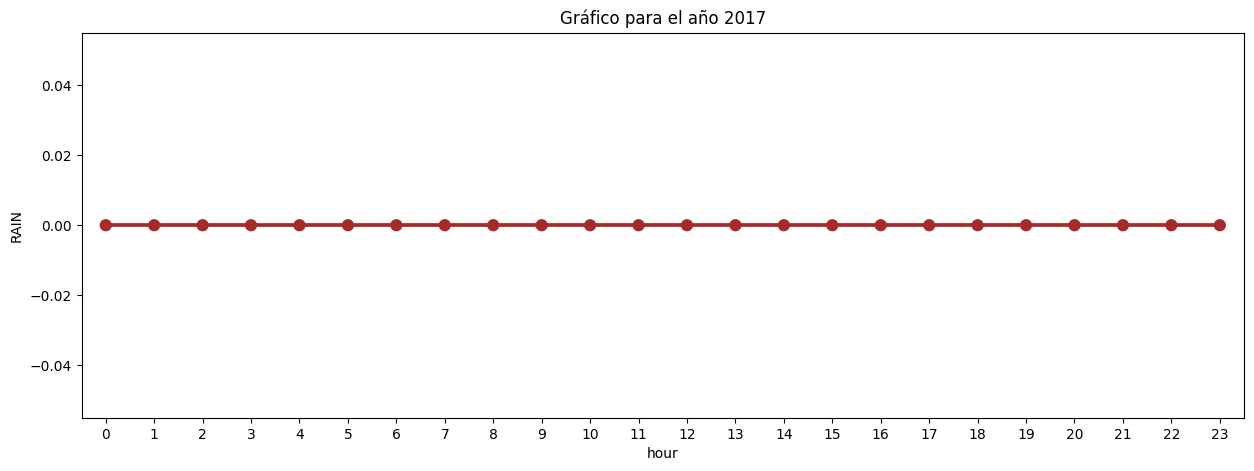

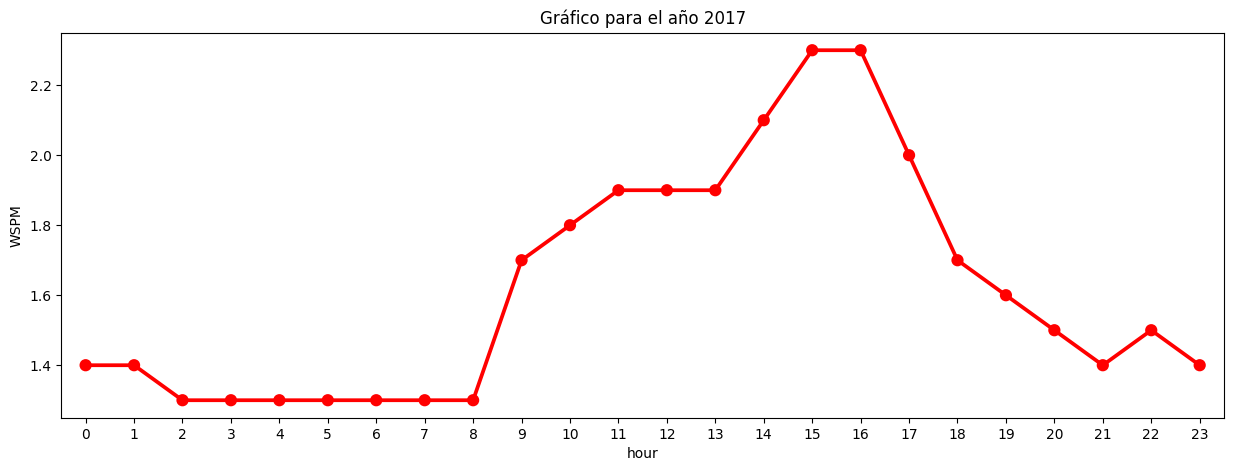

In [45]:
year = 2017

df_year = df[df['year']==year]
for i, colum in enumerate(columns_all):
    df_aux = df_year[[colum,'hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])
    plt.title(f'Gráfico para el año {year}')

# Análisis de Contaminantes en día de la semana

In [46]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])

In [47]:
def day_name(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    420768 non-null  float64       
 6   PM10     420768 non-null  float64       
 7   SO2      420768 non-null  float64       
 8   NO2      420768 non-null  float64       
 9   CO       420768 non-null  float64       
 10  O3       420768 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  420768 

In [49]:
df['day_week'] = df['date'].apply(lambda x: day_name(x))
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  ...  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  ...  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  ...  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  ...  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  ...  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  ...  -2.0   

     PRES  DEWP  RAIN   wd WSPM       station               AQI       date  \
0  1023.0 -18.8   0.0  NNW  4.4  Aotizhongxin  Heavily Polluted 2013-03-01   
1  1023.2 -18.2   0.0    N  4.7  Aotizhongxin  Heavily Polluted 2013-03-01   
2  1023.5 -18.2   0.0  NNW  5.6  Aotizhongxin  Heavily Polluted 2013-03-01   
3  1024.5 -19.4   0.0   NW  3.1  Aotizhongxin  Heavily Polluted 2013-03-01   
4  1025.2 -19.5   0.0    N  2.0  Aotizhongxin  Heavily Polluted 2013-03-01   

  day_week  
0   Friday  
1   Friday  
2   Friday  
3   Friday  
4   Friday  

[5 rows x 21 columns]

In [50]:
days = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

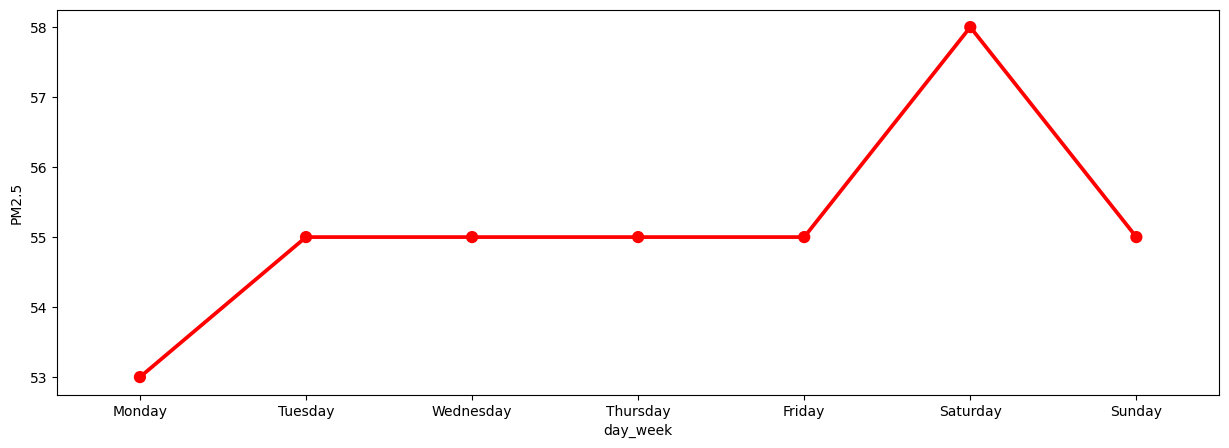

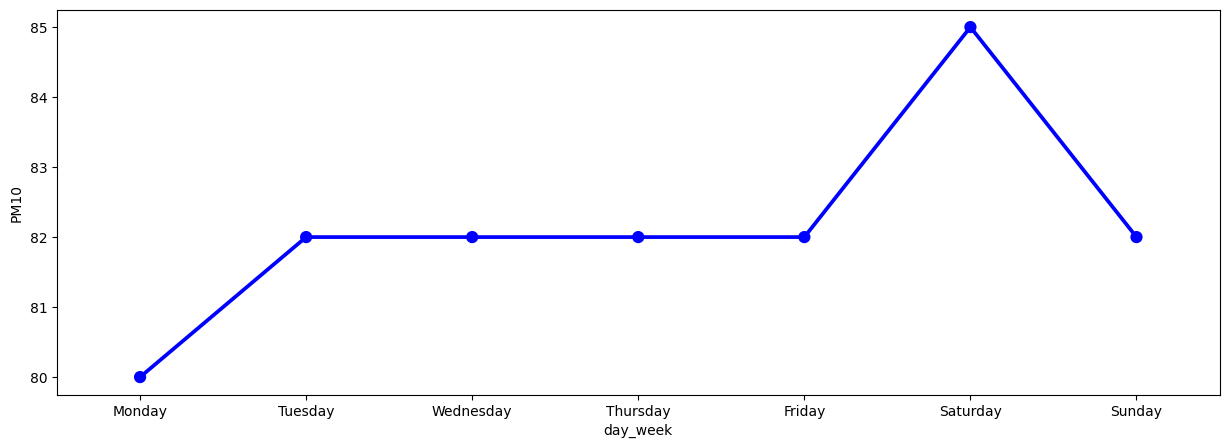

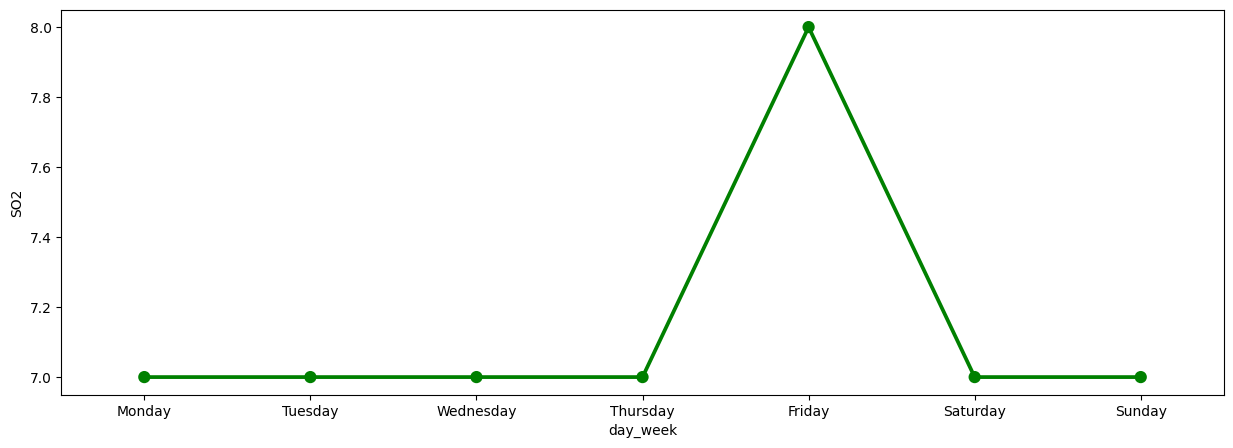

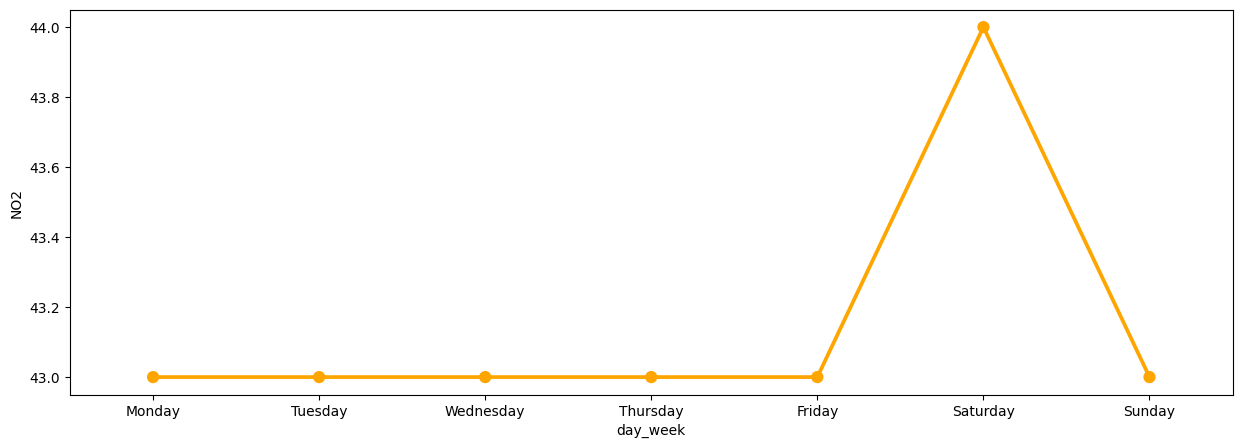

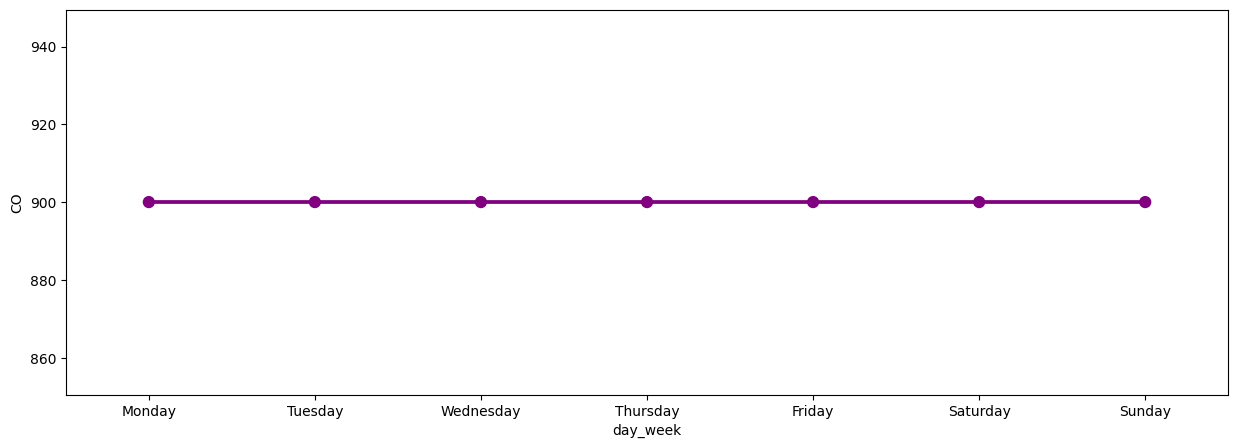

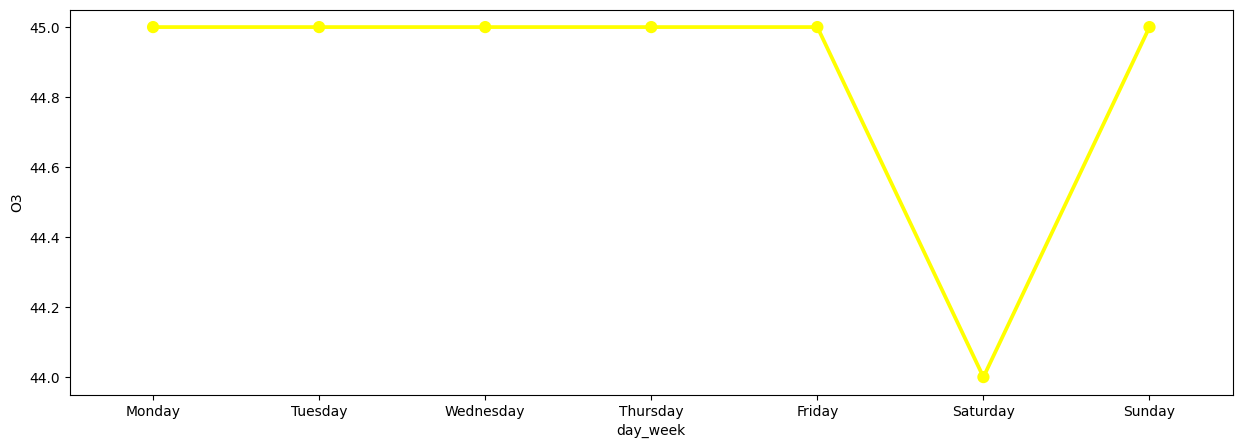

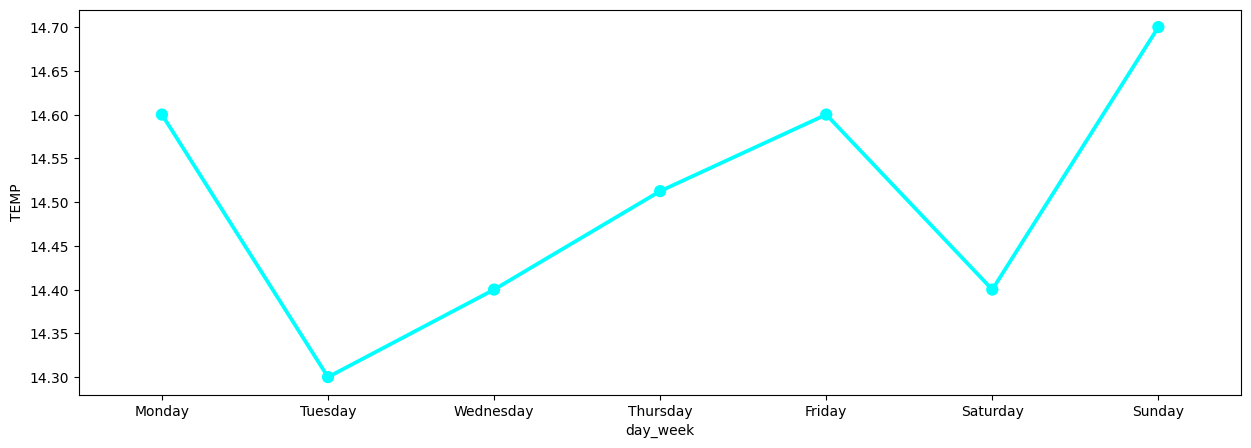

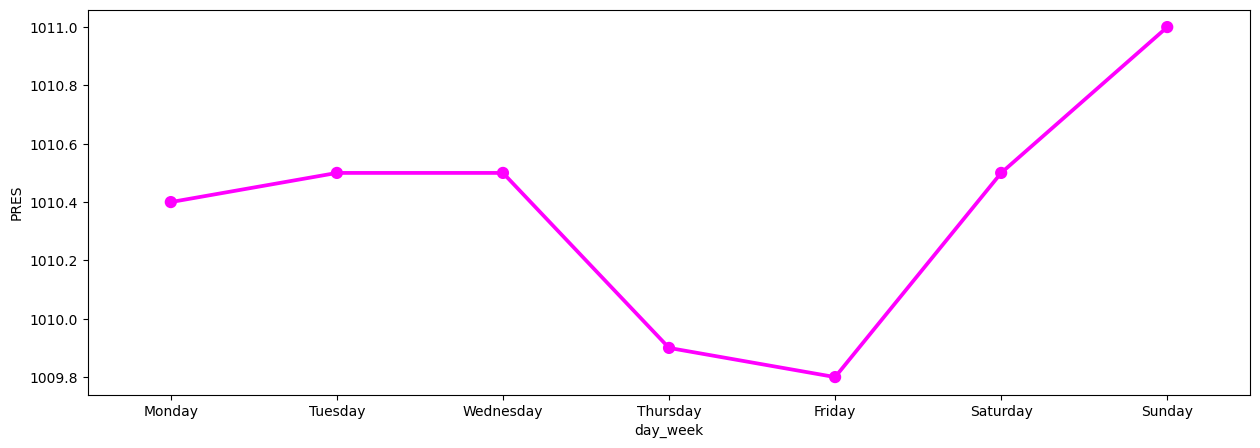

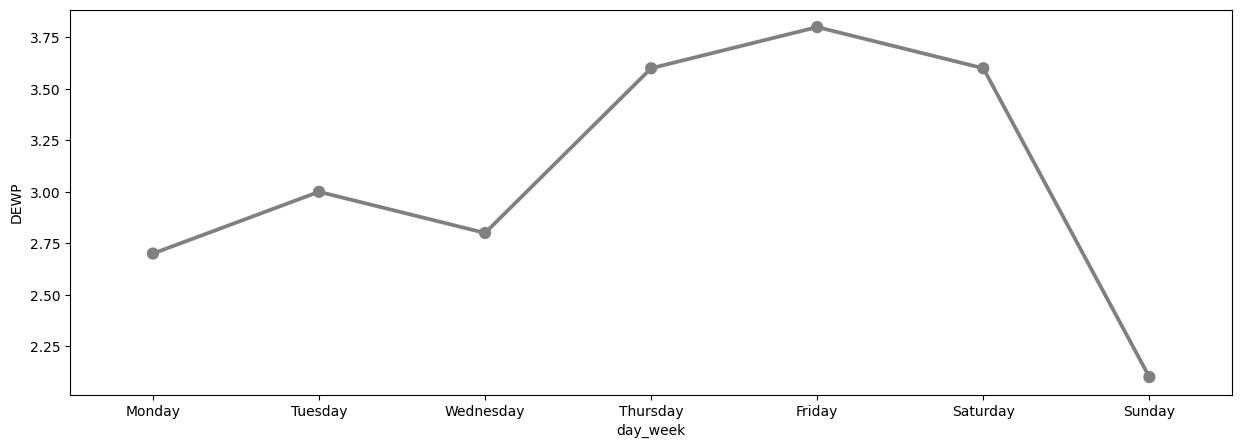

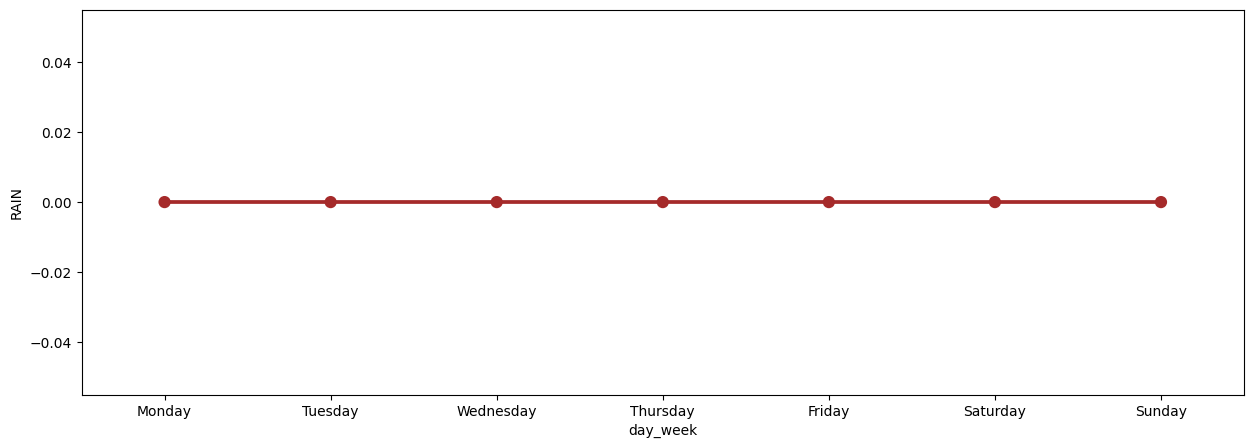

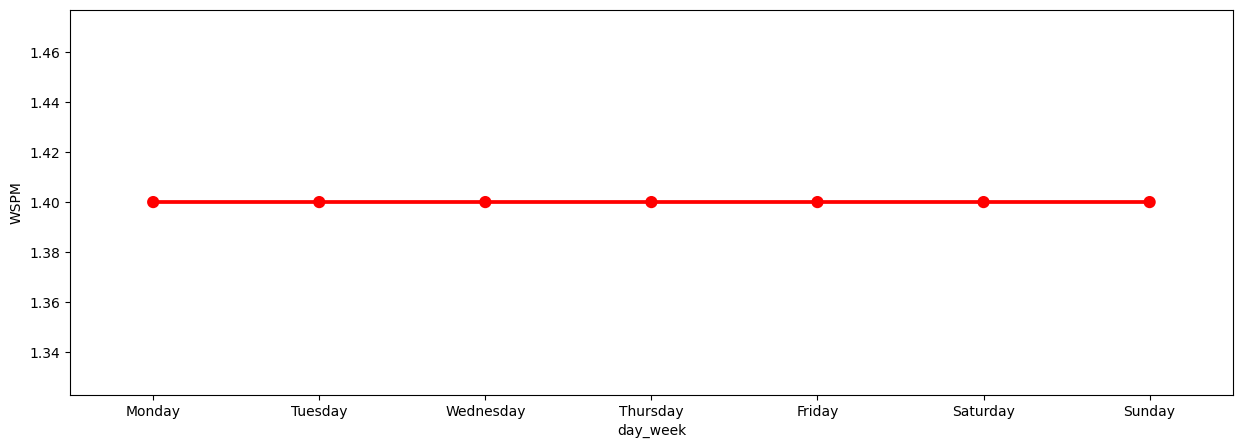

In [51]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'day_week']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
    df_aux = df_aux.iloc[df_aux['day_week'].map(days).argsort()]
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='day_week', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

# Diagramas Caja y Bigote

<Axes: xlabel='station', ylabel='SO2'>

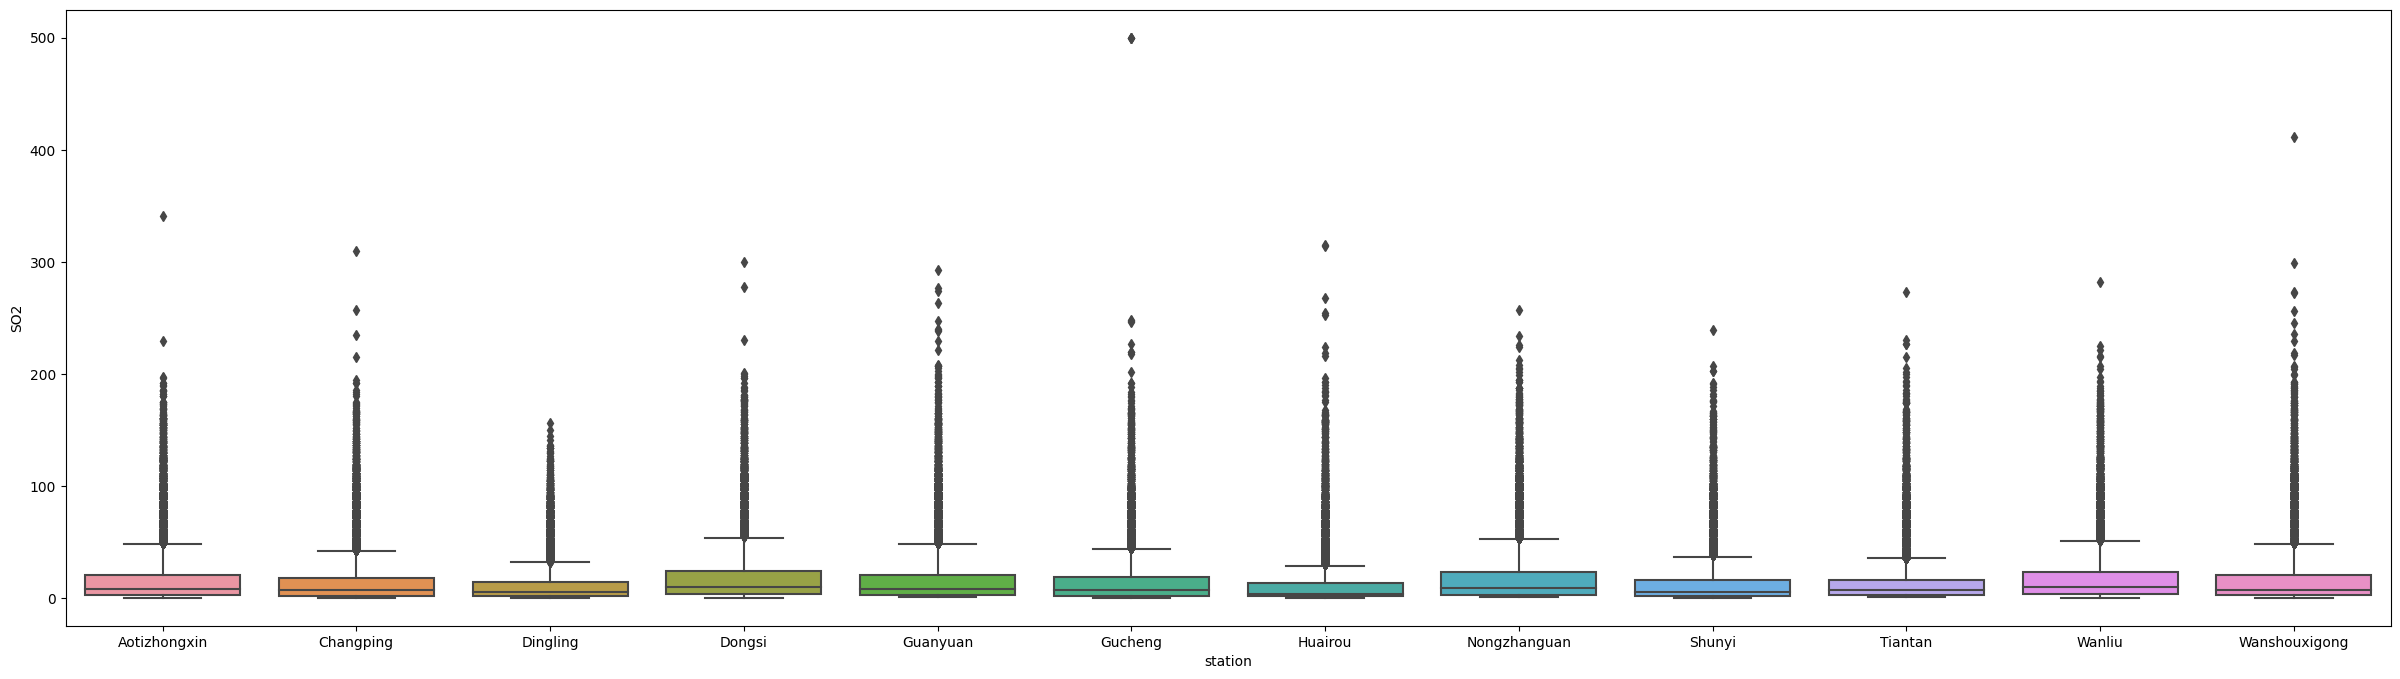

In [52]:
f = plt.figure(figsize=(30,15))
sns.boxplot(x='station', y='SO2', data=df.dropna(axis=0).reset_index())

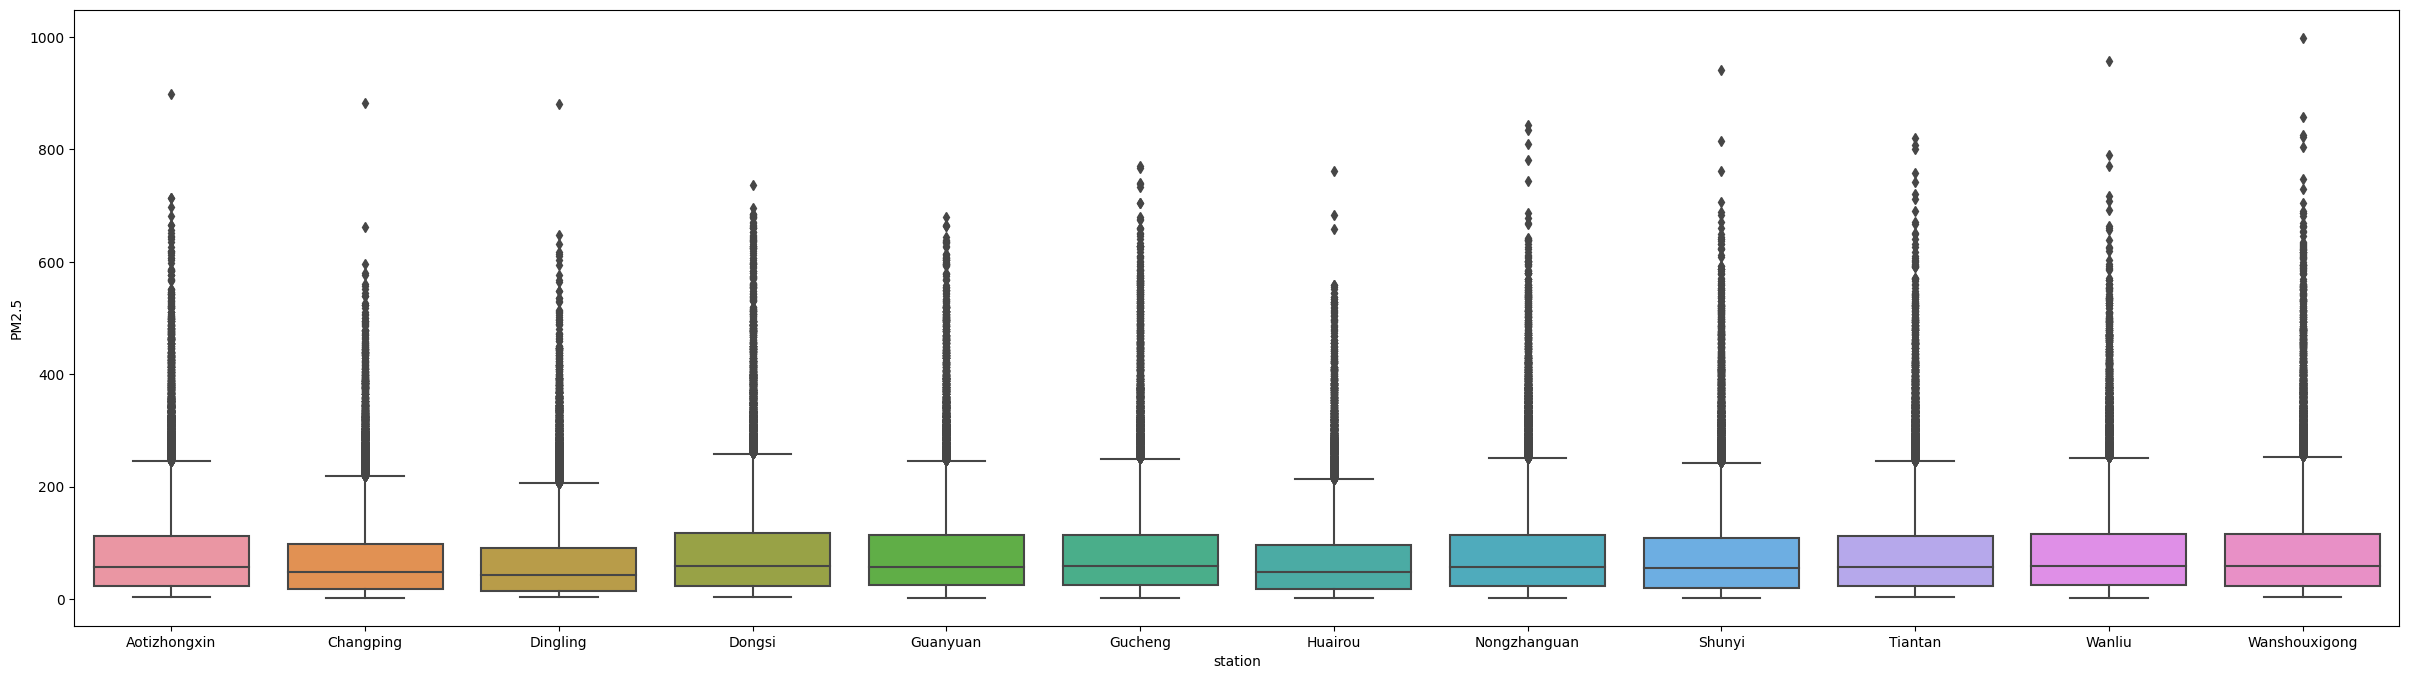

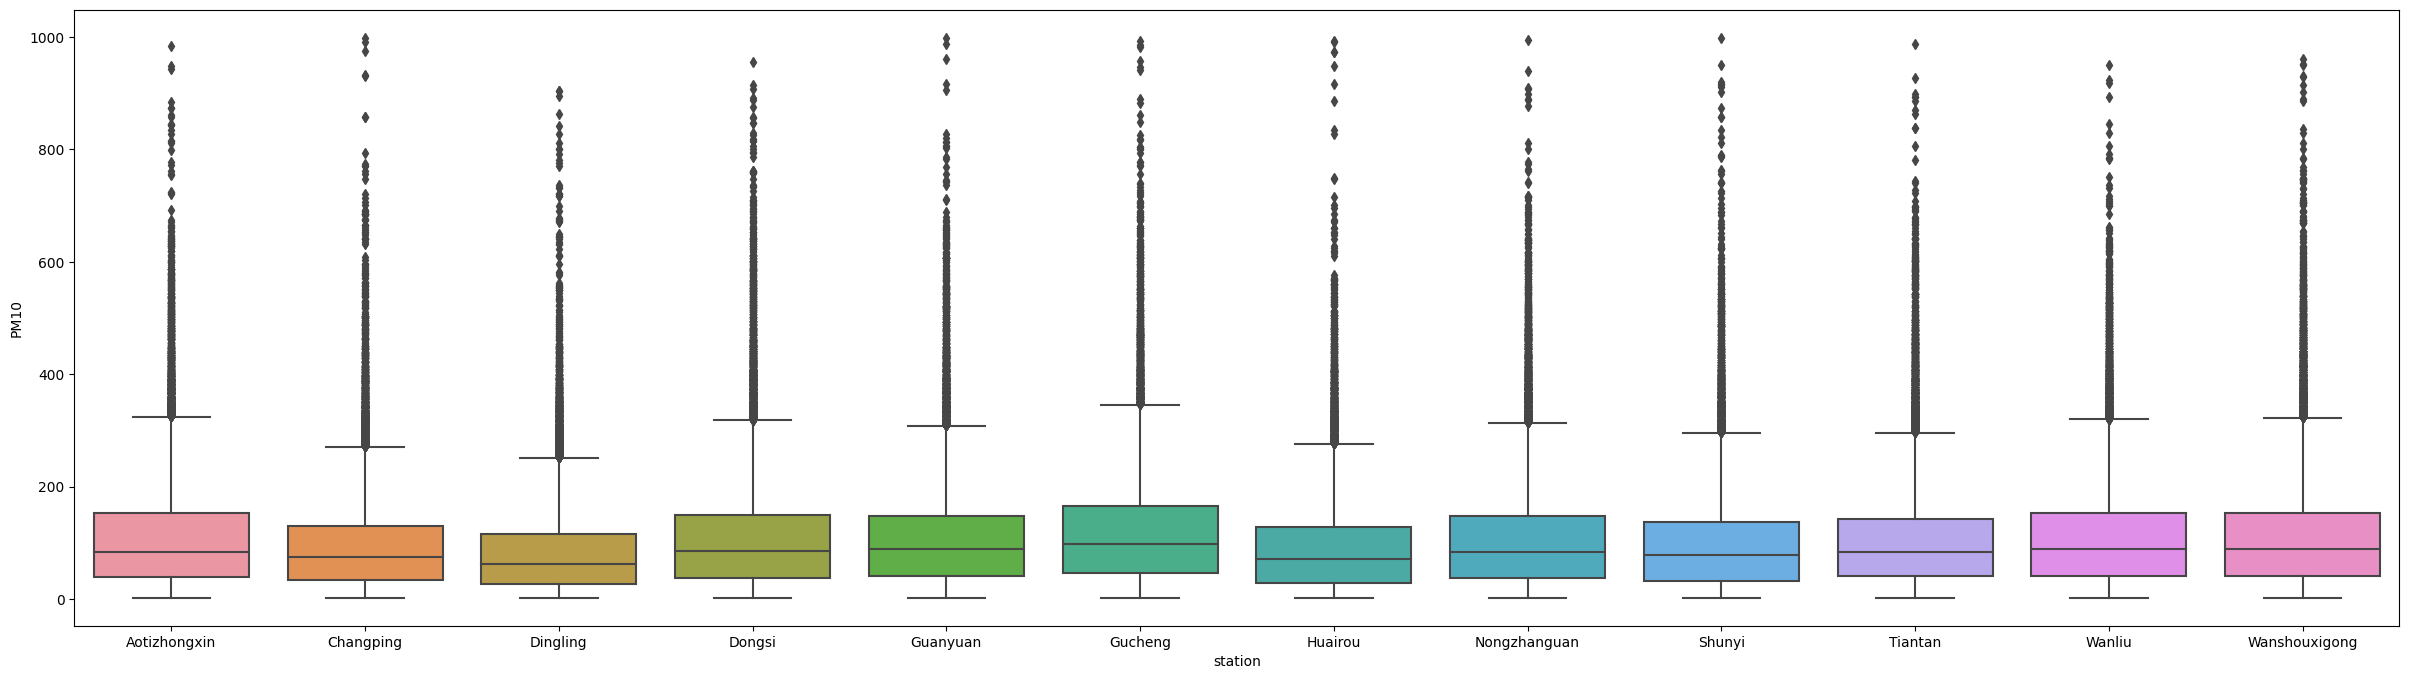

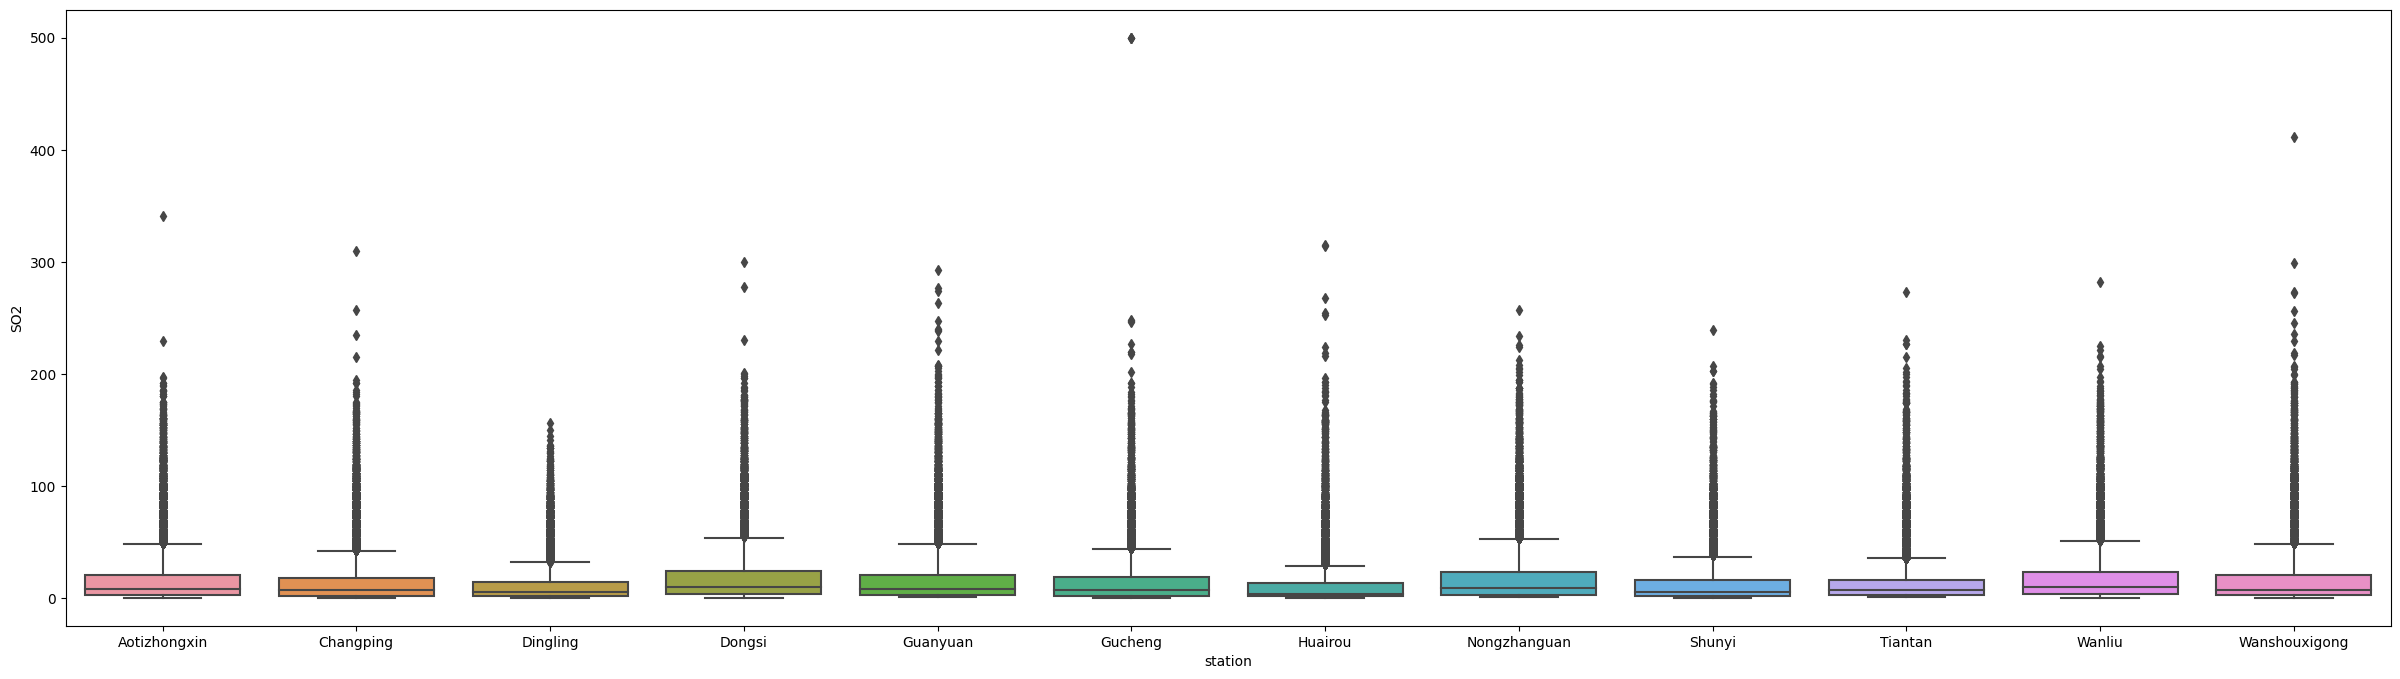

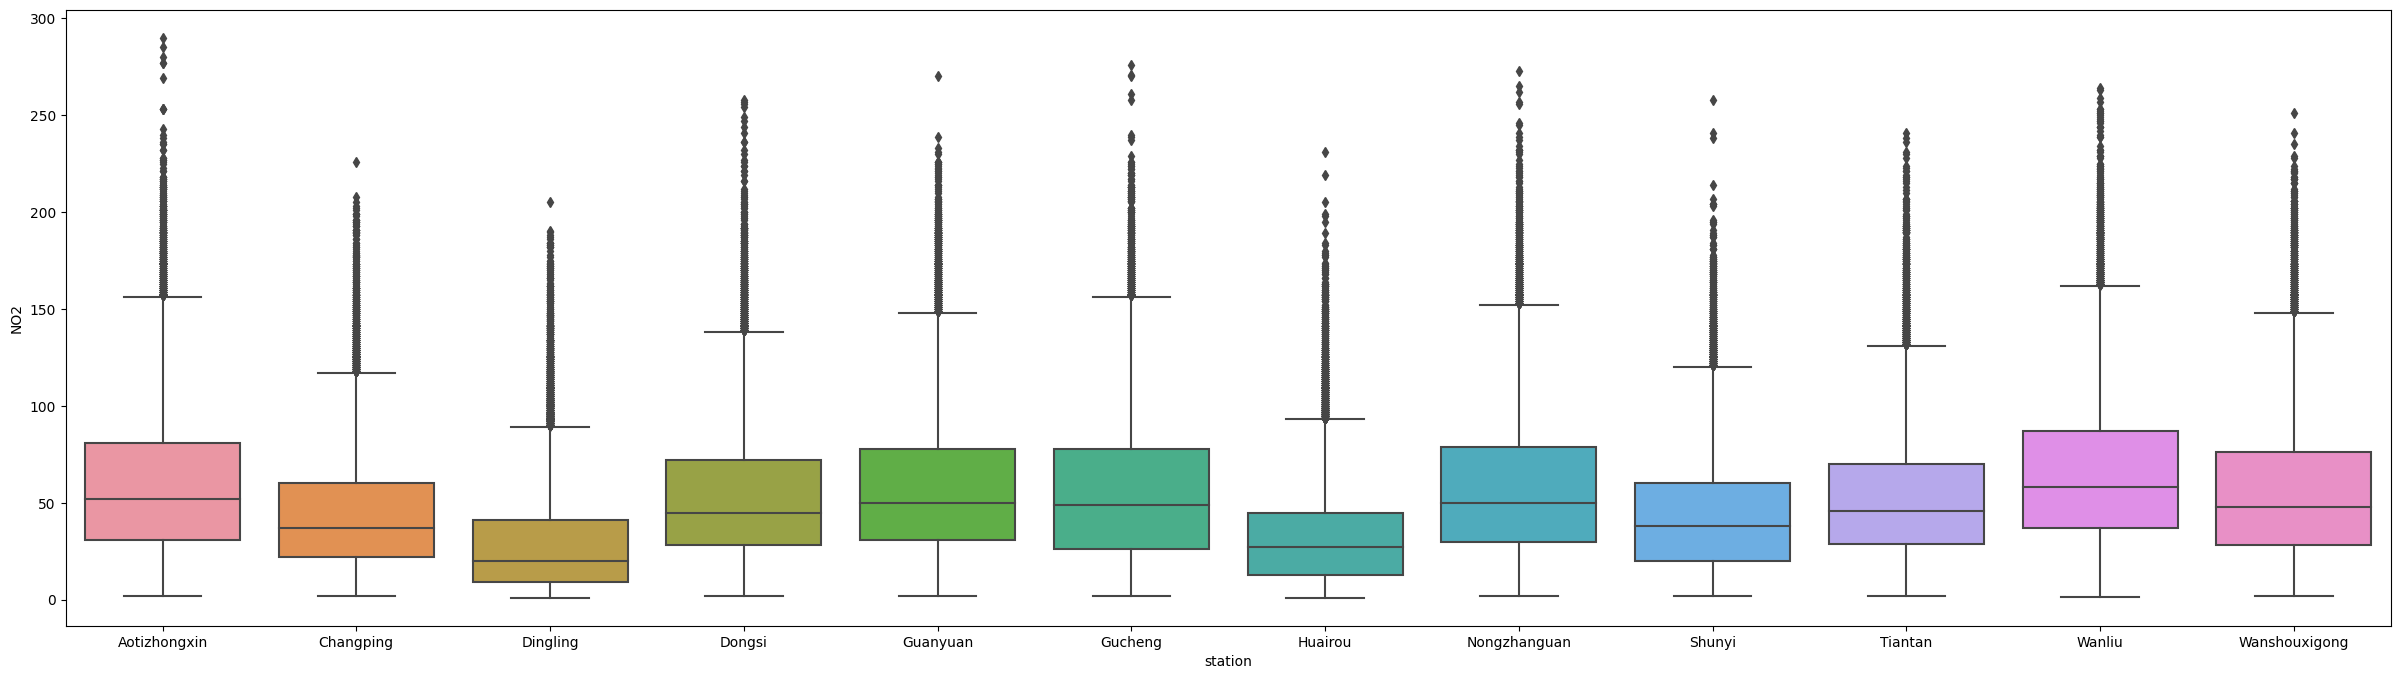

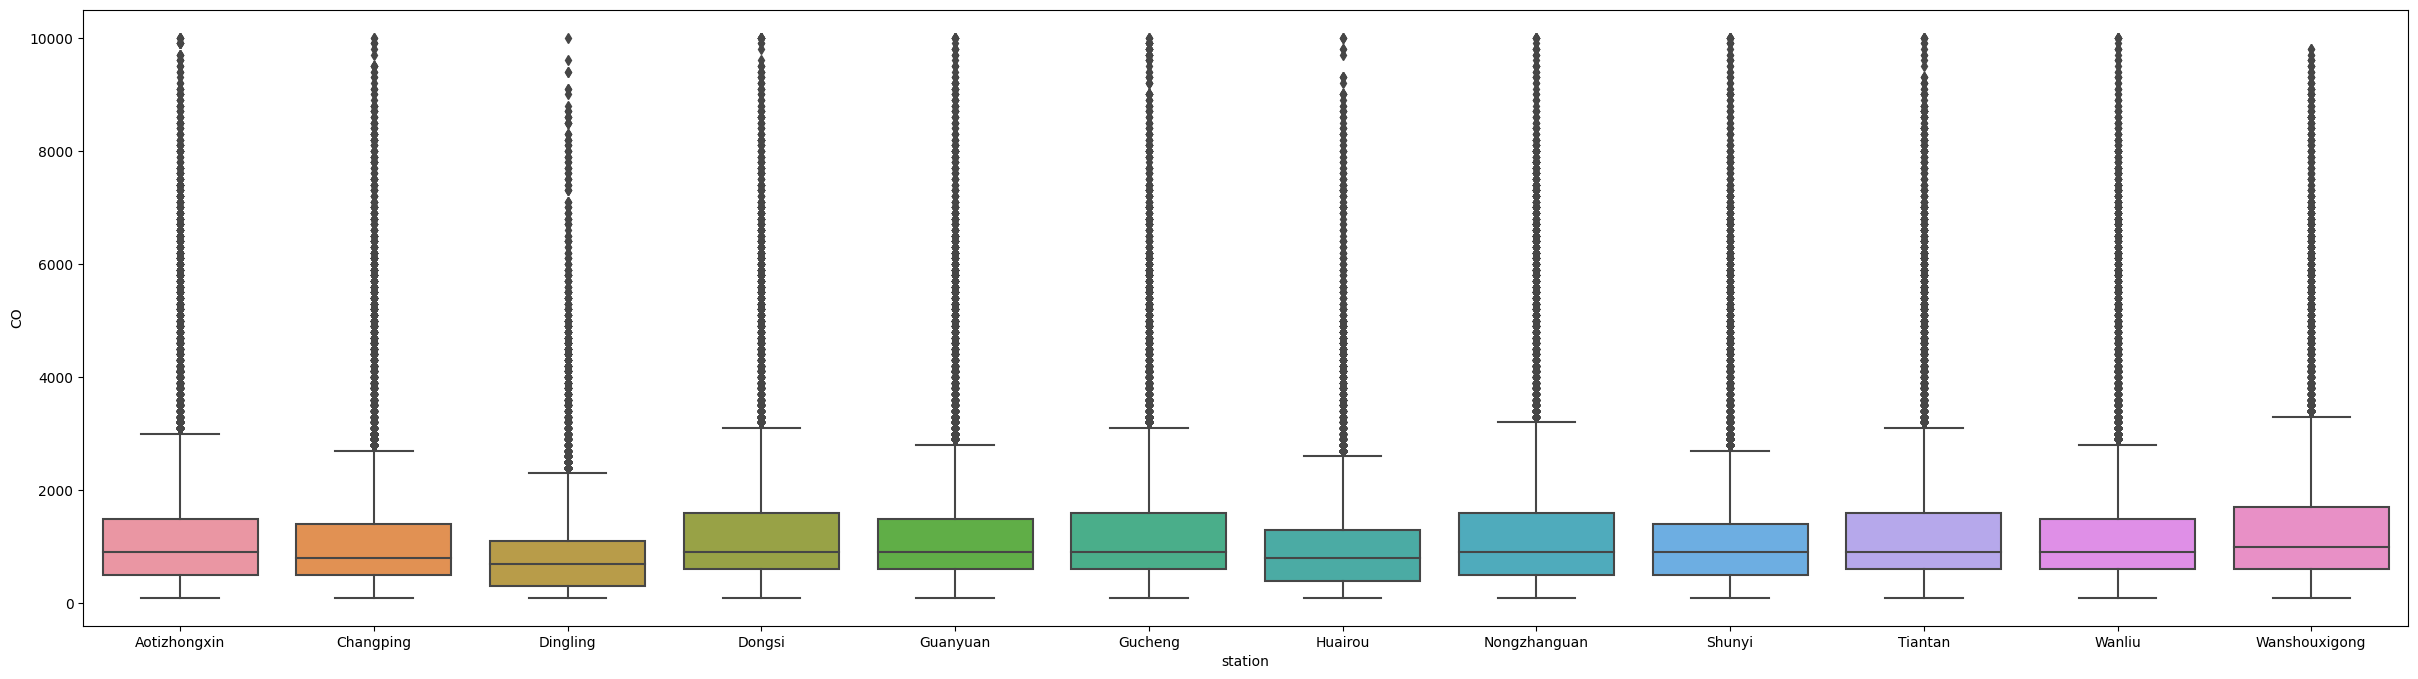

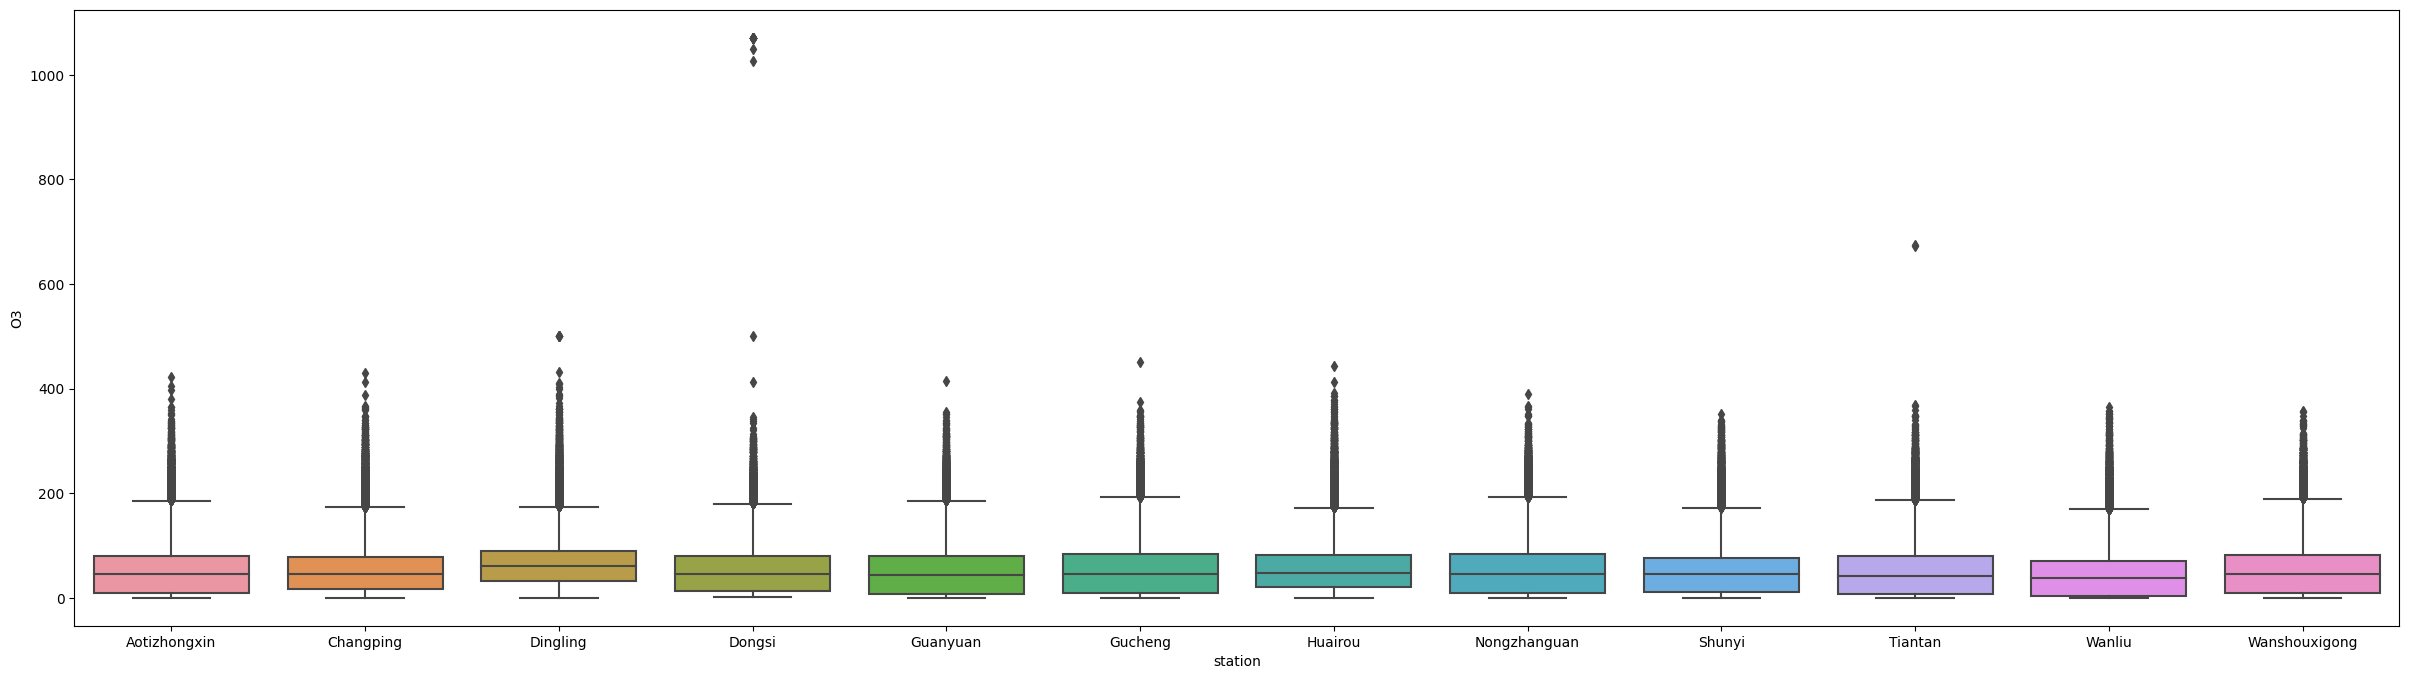

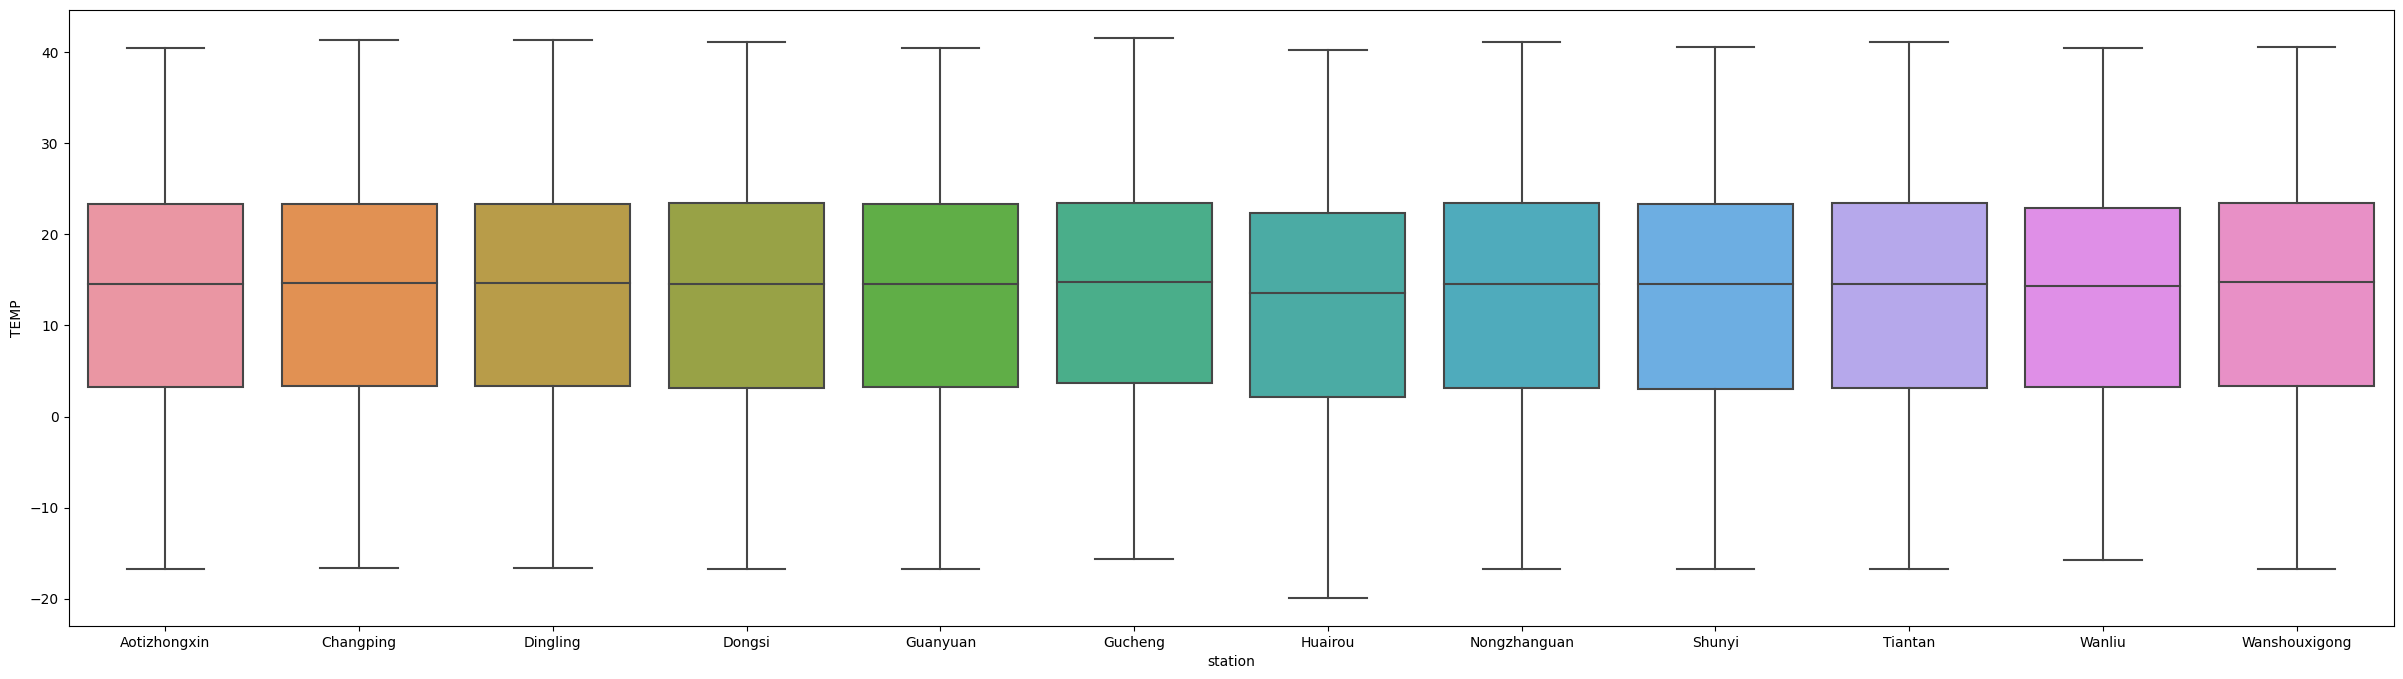

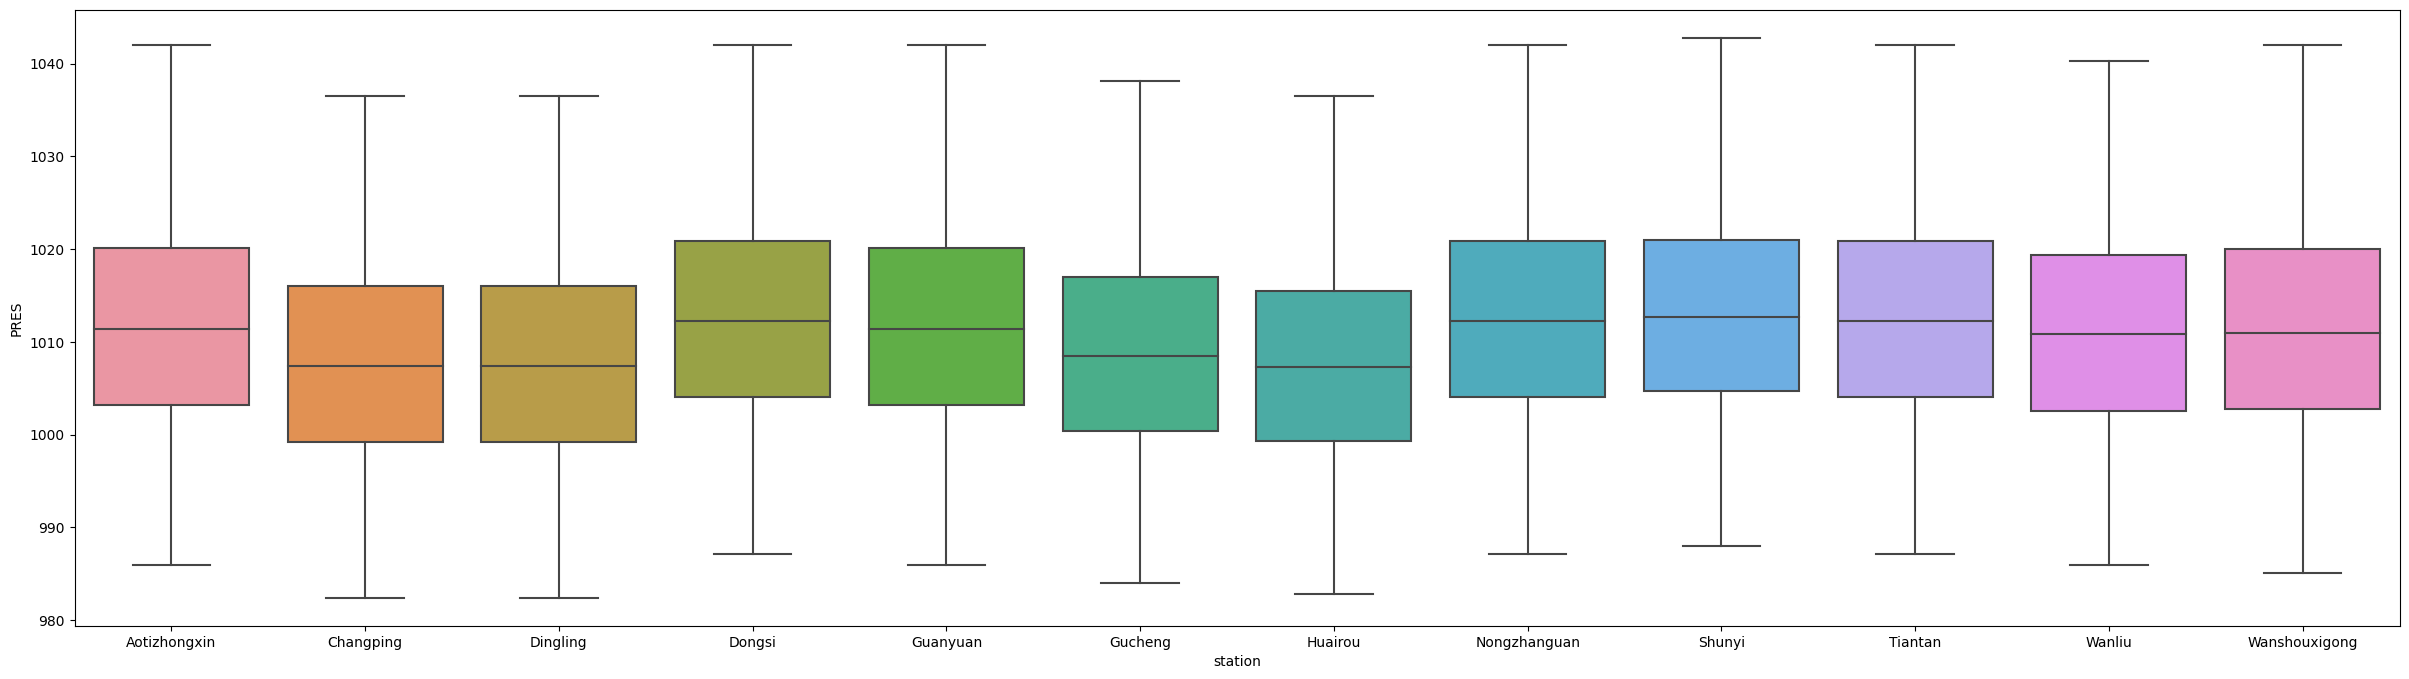

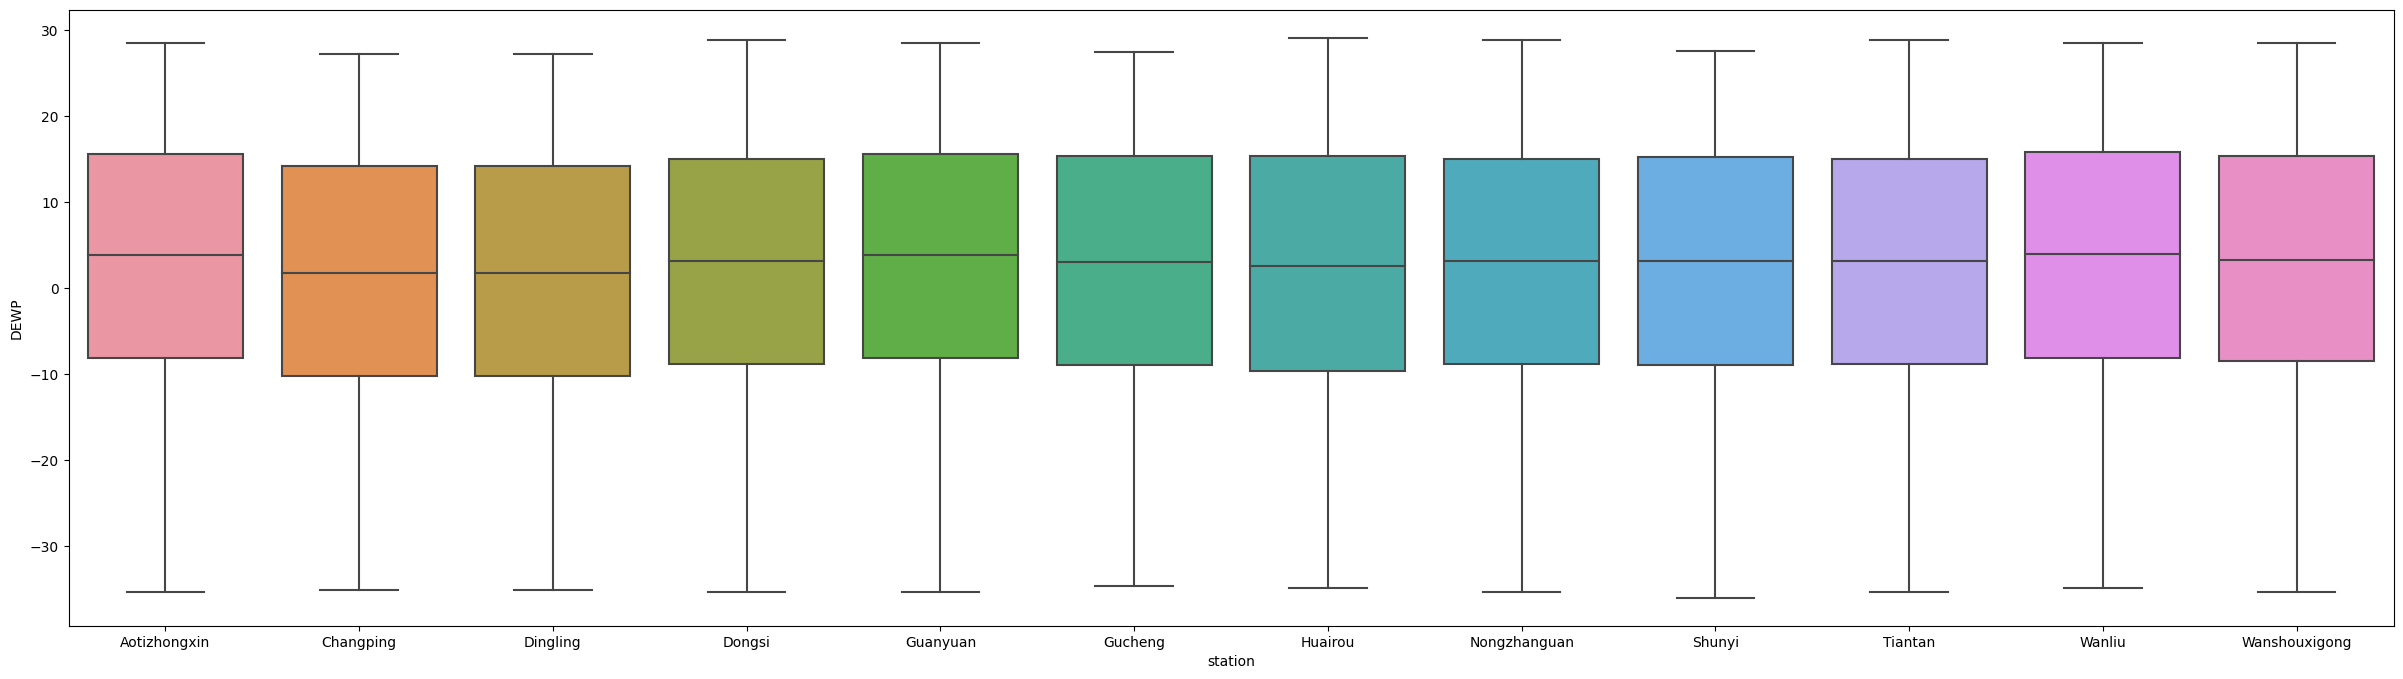

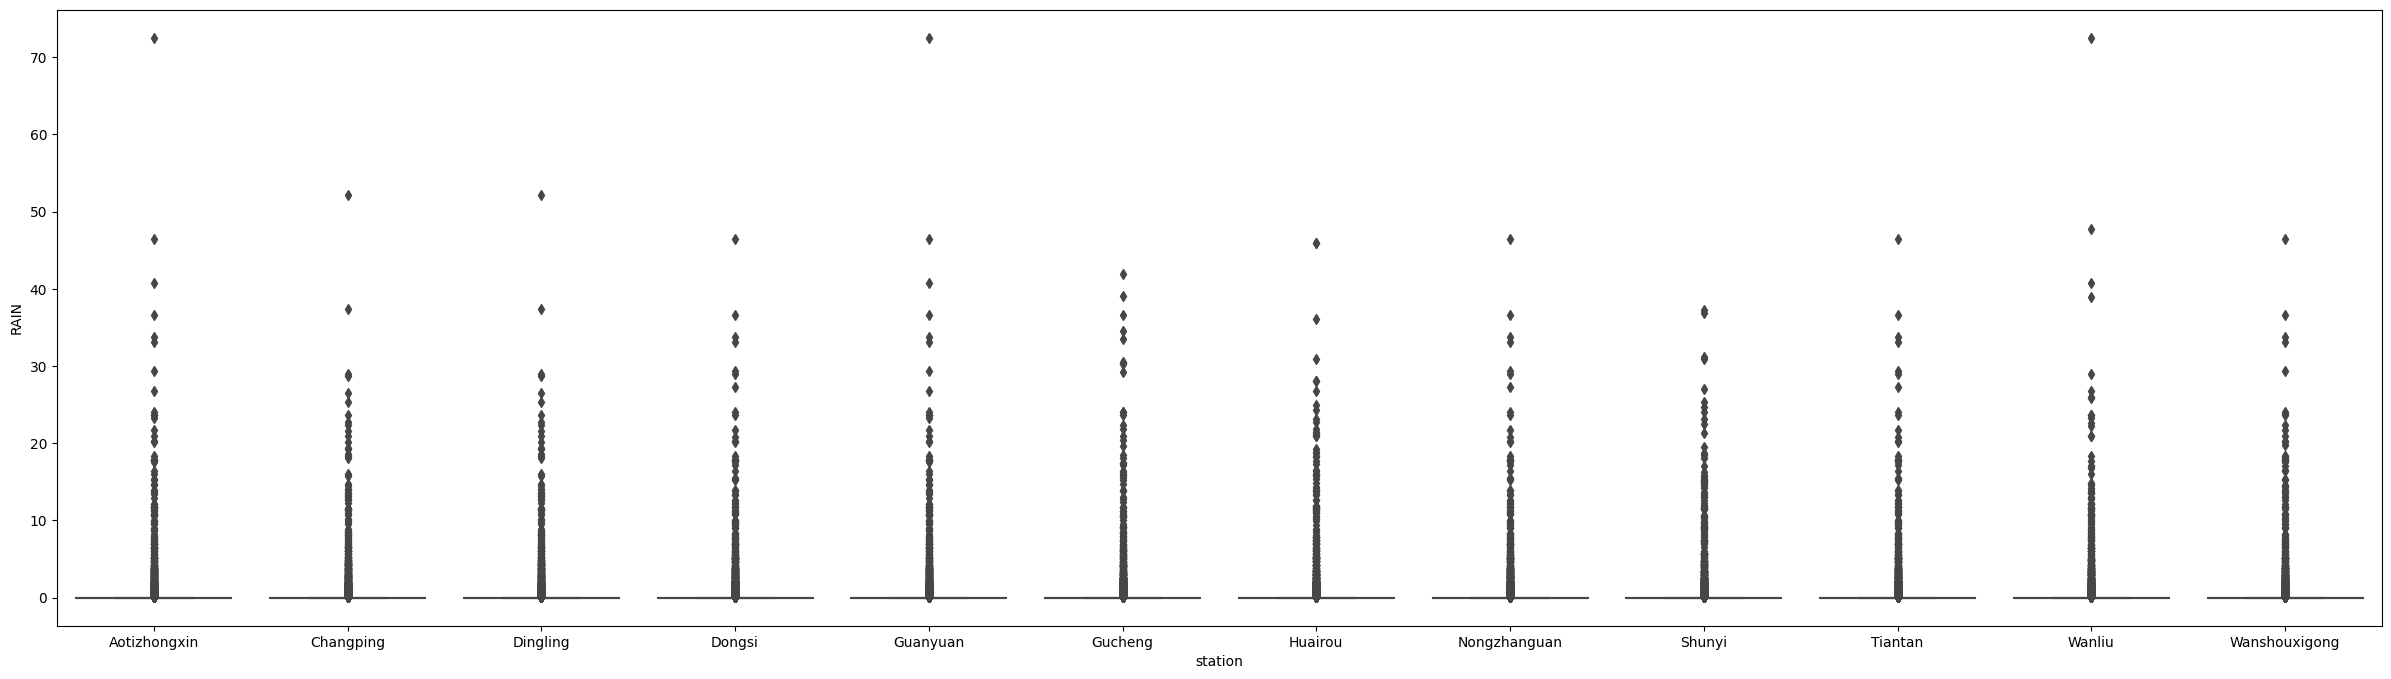

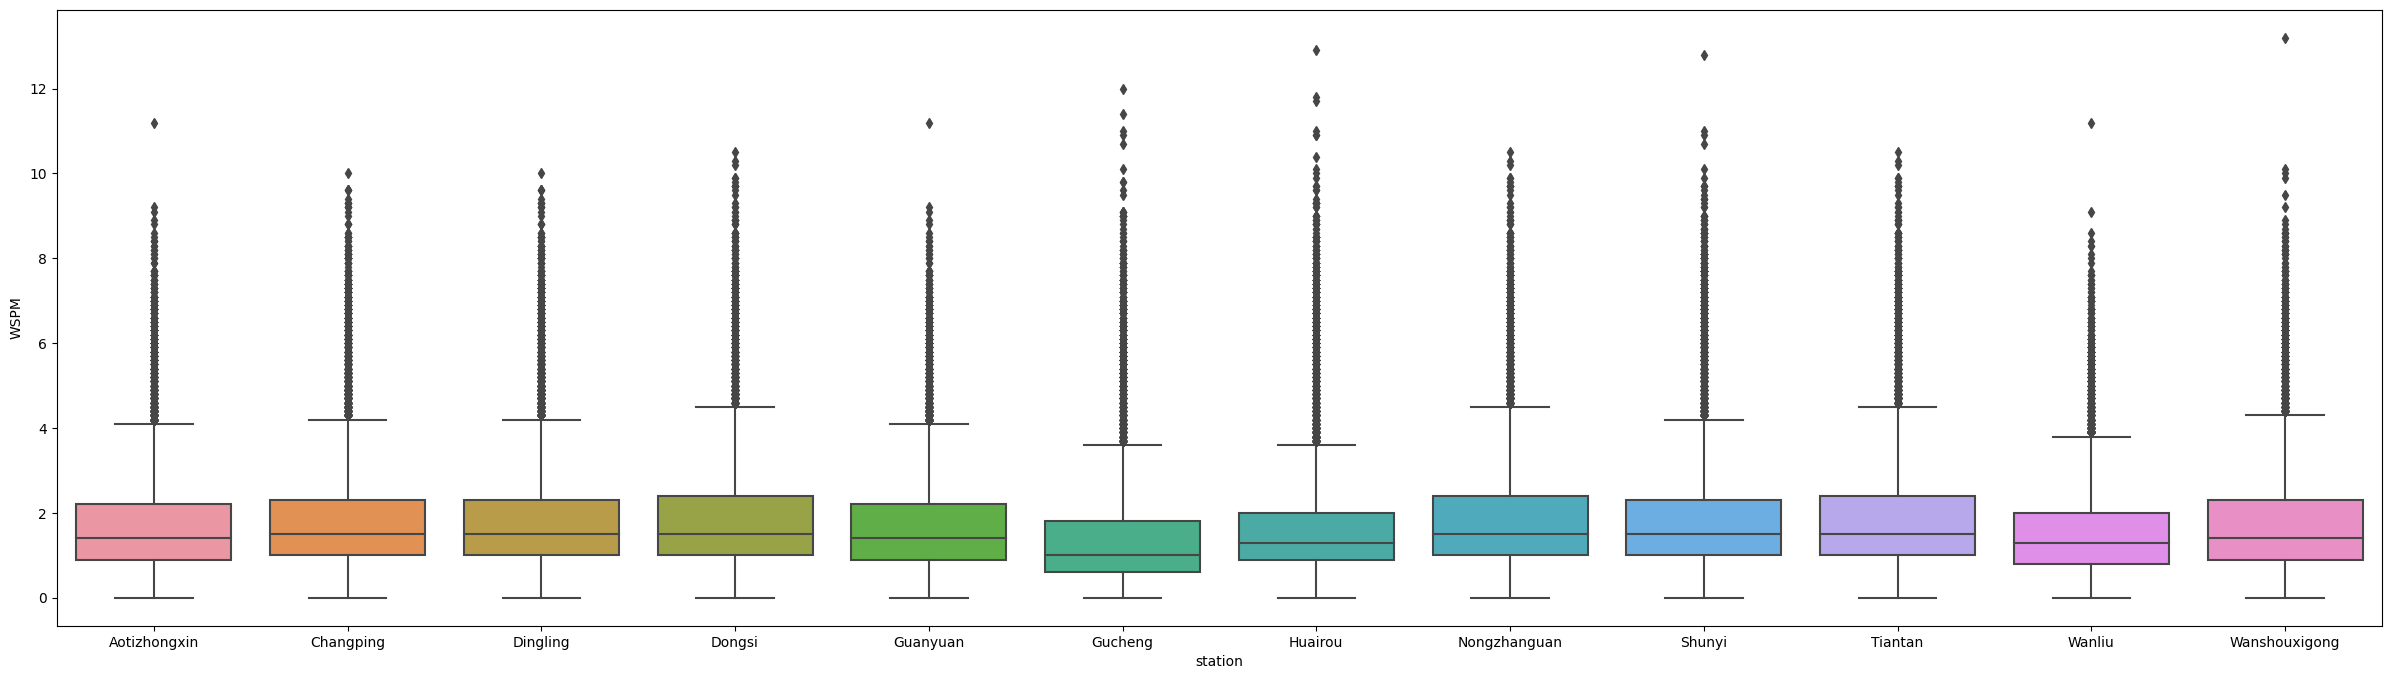

In [53]:
for colum in columns_all:
    f = plt.figure(figsize=(30,15))
    sns.boxplot(x='station', y=str(colum), data=df.dropna(axis=0).reset_index())

In [55]:
tiempo_fin = time.time()
duracion = tiempo_fin - tiempo_inicio

print("Tiempo de inicio:", tiempo_inicio)
print("Tiempo de fin:", tiempo_fin)
print("Duración:", duracion, "segundos")
print("Duración:", duracion//60, "minutos")

Tiempo de inicio: 1688172861.957057
Tiempo de fin: 1688173678.518942
Duración: 816.5618851184845 segundos
Duración: 13.0 minutos
